In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import os
from natsort import natsorted
from pyeer.eer_info import get_eer_stats
from pyeer.report import generate_eer_report, export_error_rates
from pyeer.plot import *

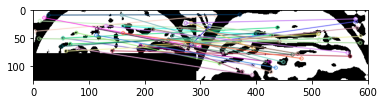

(<matplotlib.image.AxesImage at 0x218f77956d8>, None)

In [20]:

# read images
img1 = cv2.imread('C:/SIFT/forhead/s1/1_P1_S1_1.jpg')  
img2 = cv2.imread('C:/SIFT/forhead/s2/1_P1_S2_2.jpg') 
#img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
#img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
#sift
#feature enhancement
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img1 = cv2.GaussianBlur(img1,(5,5),2)
img1 = cv2.medianBlur(img1,3) 
img1 = cv2.bilateralFilter(img1,7,100,100)
img1 = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 3)
######################################################################################3
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
                #gaussian blur
img2 = cv2.GaussianBlur(img2,(5,5),2)
img2 = cv2.medianBlur(img2,3)
img2 = cv2.bilateralFilter(img2,7,100,100) 
img2 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 3)
################################################################################################
    
    ##########################################################
sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()

In [21]:
file1 = open("sift2.txt", "w")
path1 = 'C:/SIFT/forhead/s1'
path2 = 'C:/SIFT/forhead/s2'
#path 1 for session1 and path 2 for session 2
sift = cv2.xfeatures2d.SIFT_create()
bf = cv2.BFMatcher()
for images in natsorted(os.listdir(path1)):
    str1 = str(images)
    img1 = os.path.join(path1, images)
    img1 = cv2.imread(img1)
    img1 = cv2.normalize(img1, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    ###########################################################
    #feature enhancement
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img1 = cv2.GaussianBlur(img1,(5,5),2)
    img1 = cv2.medianBlur(img1,3) 
    img1 = cv2.bilateralFilter(img1,7,100,100)
    img1 = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 3)
    
    ##########################################################
    
    
    
    kp1, des1 = sift.detectAndCompute(img1,None)
    if len(kp1)>0:
        for image in natsorted(os.listdir(path2)):
            img2 = os.path.join(path2, image)
            str2 = str(image)
            if (img1 != img2): # queryImage
                img2 = cv2.imread(img2) # trainImage
                img2 = cv2.normalize(img2, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
                ######################################################################################3
                img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
                #gaussian blur
                img2 = cv2.GaussianBlur(img2,(5,5),2)
                img2 = cv2.medianBlur(img2,3)
                img2 = cv2.bilateralFilter(img2,7,100,100) 
                img2 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 3)
                ################################################################################################
                kp2, des2 = sift.detectAndCompute(img2,None)
                if len(kp2) == 0:
                    continue
                matches = bf.knnMatch(des1,des2, k=2)
                dis = bf.match(des1,des2)
            #----------------------------------------------
                number_keypoints = 0
                if len(kp1) <= len(kp2):
                    number_keypoints = len(kp1)
                else:
                    number_keypoints = len(kp2)
                good = []
                for v in matches:
                    if len(v) < 2:
                        continue
                    else:
                        m,n = v
                        if m.distance < 0.7*n.distance:
                            good.append([m])
                #print("GOOD Matches:", len(good))
                score = len(good) / number_keypoints
                file1.write( str1 + " " + str2 + " " + str(score)+"\n")
                print(str1 + " " + str2 + " " + str(score)) # replace with 'cos' if using cosine similarity
file1.close()

C:\Users\Ishu\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


1_P1_S1_1.jpg 1_P1_S2_1.jpg 0.07079646017699115
1_P1_S1_1.jpg 1_P1_S2_2.jpg 0.061946902654867256
1_P1_S1_1.jpg 1_P1_S2_3.jpg 0.035398230088495575
1_P1_S1_1.jpg 1_P2_S2_1.jpg 0.035398230088495575
1_P1_S1_1.jpg 1_P2_S2_2.jpg 0.07079646017699115
1_P1_S1_1.jpg 1_P2_S2_3.jpg 0.07079646017699115
1_P1_S1_1.jpg 2_P1_S2_1.jpg 0.061946902654867256
1_P1_S1_1.jpg 2_P1_S2_2.jpg 0.02654867256637168
1_P1_S1_1.jpg 2_P1_S2_3.jpg 0.035398230088495575
1_P1_S1_1.jpg 2_P2_S2_1.jpg 0.017699115044247787
1_P1_S1_1.jpg 2_P2_S2_2.jpg 0.017699115044247787
1_P1_S1_1.jpg 2_P2_S2_3.jpg 0.017699115044247787
1_P1_S1_1.jpg 3_P1_S2_1.jpg 0.035398230088495575
1_P1_S1_1.jpg 3_P1_S2_2.jpg 0.07964601769911504
1_P1_S1_1.jpg 3_P1_S2_3.jpg 0.06422018348623854
1_P1_S1_1.jpg 3_P2_S2_1.jpg 0.05309734513274336
1_P1_S1_1.jpg 3_P2_S2_2.jpg 0.02654867256637168
1_P1_S1_1.jpg 3_P2_S2_3.jpg 0.05309734513274336
1_P1_S1_1.jpg 4_P1_S2_1.jpg 0.035398230088495575
1_P1_S1_1.jpg 4_P1_S2_2.jpg 0.02654867256637168
1_P1_S1_1.jpg 4_P1_S2_3.jpg 0.

1_P1_S1_2.jpg 1_P1_S2_3.jpg 0.05
1_P1_S1_2.jpg 1_P2_S2_1.jpg 0.03
1_P1_S1_2.jpg 1_P2_S2_2.jpg 0.02
1_P1_S1_2.jpg 1_P2_S2_3.jpg 0.02
1_P1_S1_2.jpg 2_P1_S2_1.jpg 0.01
1_P1_S1_2.jpg 2_P1_S2_2.jpg 0.03
1_P1_S1_2.jpg 2_P1_S2_3.jpg 0.01
1_P1_S1_2.jpg 2_P2_S2_1.jpg 0.04
1_P1_S1_2.jpg 2_P2_S2_2.jpg 0.01
1_P1_S1_2.jpg 2_P2_S2_3.jpg 0.04
1_P1_S1_2.jpg 3_P1_S2_1.jpg 0.01
1_P1_S1_2.jpg 3_P1_S2_2.jpg 0.04
1_P1_S1_2.jpg 3_P1_S2_3.jpg 0.05
1_P1_S1_2.jpg 3_P2_S2_1.jpg 0.04
1_P1_S1_2.jpg 3_P2_S2_2.jpg 0.01
1_P1_S1_2.jpg 3_P2_S2_3.jpg 0.01
1_P1_S1_2.jpg 4_P1_S2_1.jpg 0.06
1_P1_S1_2.jpg 4_P1_S2_2.jpg 0.05
1_P1_S1_2.jpg 4_P1_S2_3.jpg 0.02
1_P1_S1_2.jpg 4_P2_S2_1.jpg 0.02
1_P1_S1_2.jpg 4_P2_S2_2.jpg 0.04
1_P1_S1_2.jpg 4_P2_S2_3.jpg 0.02
1_P1_S1_2.jpg 5_P1_S2_1.jpg 0.05
1_P1_S1_2.jpg 5_P1_S2_2.jpg 0.03
1_P1_S1_2.jpg 5_P1_S2_3.jpg 0.01
1_P1_S1_2.jpg 5_P2_S2_1.jpg 0.03
1_P1_S1_2.jpg 5_P2_S2_2.jpg 0.02
1_P1_S1_2.jpg 5_P2_S2_3.jpg 0.03
1_P1_S1_2.jpg 6_P1_S2_1.jpg 0.03
1_P1_S1_2.jpg 6_P1_S2_2.jpg 0.03
1_P1_S1_2.

1_P1_S1_3.jpg 9_P2_S2_1.jpg 0.01818181818181818
1_P1_S1_3.jpg 9_P2_S2_2.jpg 0.045454545454545456
1_P1_S1_3.jpg 9_P2_S2_3.jpg 0.03636363636363636
1_P1_S1_3.jpg 10_P1_S2_1.jpg 0.02727272727272727
1_P1_S1_3.jpg 10_P1_S2_2.jpg 0.02727272727272727
1_P1_S1_3.jpg 10_P1_S2_3.jpg 0.08181818181818182
1_P1_S1_3.jpg 10_P2_S2_1.jpg 0.01818181818181818
1_P1_S1_3.jpg 10_P2_S2_2.jpg 0.02727272727272727
1_P1_S1_3.jpg 10_P2_S2_3.jpg 0.06363636363636363
1_P1_S1_3.jpg 11_P1_S2_1.jpg 0.05102040816326531
1_P1_S1_3.jpg 11_P1_S2_2.jpg 0.01818181818181818
1_P1_S1_3.jpg 11_P1_S2_3.jpg 0.04054054054054054
1_P1_S1_3.jpg 11_P2_S2_1.jpg 0.045454545454545456
1_P1_S1_3.jpg 11_P2_S2_2.jpg 0.045454545454545456
1_P1_S1_3.jpg 11_P2_S2_3.jpg 0.01818181818181818
1_P1_S1_3.jpg 12_P1_S2_1.jpg 0.045454545454545456
1_P1_S1_3.jpg 12_P1_S2_2.jpg 0.00909090909090909
1_P1_S1_3.jpg 12_P1_S2_3.jpg 0.03636363636363636
1_P1_S1_3.jpg 12_P2_S2_1.jpg 0.00909090909090909
1_P1_S1_3.jpg 12_P2_S2_2.jpg 0.05454545454545454
1_P1_S1_3.jpg 12_P2

1_P2_S1_1.jpg 10_P2_S2_1.jpg 0.04961832061068702
1_P2_S1_1.jpg 10_P2_S2_2.jpg 0.02108433734939759
1_P2_S1_1.jpg 10_P2_S2_3.jpg 0.02710843373493976
1_P2_S1_1.jpg 11_P1_S2_1.jpg 0.14285714285714285
1_P2_S1_1.jpg 11_P1_S2_2.jpg 0.15702479338842976
1_P2_S1_1.jpg 11_P1_S2_3.jpg 0.2702702702702703
1_P2_S1_1.jpg 11_P2_S2_1.jpg 0.03313253012048193
1_P2_S1_1.jpg 11_P2_S2_2.jpg 0.05421686746987952
1_P2_S1_1.jpg 11_P2_S2_3.jpg 0.0353356890459364
1_P2_S1_1.jpg 12_P1_S2_1.jpg 0.049723756906077346
1_P2_S1_1.jpg 12_P1_S2_2.jpg 0.04918032786885246
1_P2_S1_1.jpg 12_P1_S2_3.jpg 0.047619047619047616
1_P2_S1_1.jpg 12_P2_S2_1.jpg 0.0539568345323741
1_P2_S1_1.jpg 12_P2_S2_2.jpg 0.05069124423963134
1_P2_S1_1.jpg 12_P2_S2_3.jpg 0.07738095238095238
1_P2_S1_1.jpg 13_P1_S2_1.jpg 0.12077294685990338
1_P2_S1_1.jpg 13_P1_S2_2.jpg 0.026490066225165563
1_P2_S1_1.jpg 13_P1_S2_3.jpg 0.03237410071942446
1_P2_S1_1.jpg 13_P2_S2_1.jpg 0.03313253012048193
1_P2_S1_1.jpg 13_P2_S2_2.jpg 0.02108433734939759
1_P2_S1_1.jpg 13_P2_

1_P2_S1_2.jpg 11_P2_S2_3.jpg 0.006097560975609756
1_P2_S1_2.jpg 12_P1_S2_1.jpg 0.042682926829268296
1_P2_S1_2.jpg 12_P1_S2_2.jpg 0.018292682926829267
1_P2_S1_2.jpg 12_P1_S2_3.jpg 0.018292682926829267
1_P2_S1_2.jpg 12_P2_S2_1.jpg 0.03048780487804878
1_P2_S1_2.jpg 12_P2_S2_2.jpg 0.042682926829268296
1_P2_S1_2.jpg 12_P2_S2_3.jpg 0.03048780487804878
1_P2_S1_2.jpg 13_P1_S2_1.jpg 0.10365853658536585
1_P2_S1_2.jpg 13_P1_S2_2.jpg 0.042682926829268296
1_P2_S1_2.jpg 13_P1_S2_3.jpg 0.042682926829268296
1_P2_S1_2.jpg 13_P2_S2_1.jpg 0.006097560975609756
1_P2_S1_2.jpg 13_P2_S2_2.jpg 0.018292682926829267
1_P2_S1_2.jpg 13_P2_S2_3.jpg 0.036585365853658534
1_P2_S1_2.jpg 14_P1_S2_1.jpg 0.1111111111111111
1_P2_S1_2.jpg 14_P1_S2_2.jpg 0.054878048780487805
1_P2_S1_2.jpg 14_P1_S2_3.jpg 0.036585365853658534
1_P2_S1_2.jpg 14_P2_S2_1.jpg 0.018292682926829267
1_P2_S1_2.jpg 14_P2_S2_2.jpg 0.042682926829268296
1_P2_S1_2.jpg 14_P2_S2_3.jpg 0.006097560975609756
1_P2_S1_2.jpg 15_P1_S2_1.jpg 0.13043478260869565
1_P2_S

1_P2_S1_3.jpg 12_P1_S2_3.jpg 0.025974025974025976
1_P2_S1_3.jpg 12_P2_S2_1.jpg 0.031746031746031744
1_P2_S1_3.jpg 12_P2_S2_2.jpg 0.04608294930875576
1_P2_S1_3.jpg 12_P2_S2_3.jpg 0.07142857142857142
1_P2_S1_3.jpg 13_P1_S2_1.jpg 0.07246376811594203
1_P2_S1_3.jpg 13_P1_S2_2.jpg 0.015873015873015872
1_P2_S1_3.jpg 13_P1_S2_3.jpg 0.031746031746031744
1_P2_S1_3.jpg 13_P2_S2_1.jpg 0.03571428571428571
1_P2_S1_3.jpg 13_P2_S2_2.jpg 0.011904761904761904
1_P2_S1_3.jpg 13_P2_S2_3.jpg 0.05555555555555555
1_P2_S1_3.jpg 14_P1_S2_1.jpg 0.08547008547008547
1_P2_S1_3.jpg 14_P1_S2_2.jpg 0.04132231404958678
1_P2_S1_3.jpg 14_P1_S2_3.jpg 0.0446927374301676
1_P2_S1_3.jpg 14_P2_S2_1.jpg 0.01984126984126984
1_P2_S1_3.jpg 14_P2_S2_2.jpg 0.03968253968253968
1_P2_S1_3.jpg 14_P2_S2_3.jpg 0.023809523809523808
1_P2_S1_3.jpg 15_P1_S2_1.jpg 0.17391304347826086
1_P2_S1_3.jpg 15_P1_S2_2.jpg 0.19736842105263158
1_P2_S1_3.jpg 15_P1_S2_3.jpg 0.078125
1_P2_S1_3.jpg 15_P2_S2_1.jpg 0.125
1_P2_S1_3.jpg 15_P2_S2_2.jpg 0.076335877

2_P1_S1_1.jpg 12_P2_S2_3.jpg 0.02976190476190476
2_P1_S1_1.jpg 13_P1_S2_1.jpg 0.06280193236714976
2_P1_S1_1.jpg 13_P1_S2_2.jpg 0.04304635761589404
2_P1_S1_1.jpg 13_P1_S2_3.jpg 0.03237410071942446
2_P1_S1_1.jpg 13_P2_S2_1.jpg 0.030303030303030304
2_P1_S1_1.jpg 13_P2_S2_2.jpg 0.04242424242424243
2_P1_S1_1.jpg 13_P2_S2_3.jpg 0.02727272727272727
2_P1_S1_1.jpg 14_P1_S2_1.jpg 0.09401709401709402
2_P1_S1_1.jpg 14_P1_S2_2.jpg 0.01652892561983471
2_P1_S1_1.jpg 14_P1_S2_3.jpg 0.11173184357541899
2_P1_S1_1.jpg 14_P2_S2_1.jpg 0.026143790849673203
2_P1_S1_1.jpg 14_P2_S2_2.jpg 0.03636363636363636
2_P1_S1_1.jpg 14_P2_S2_3.jpg 0.045283018867924525
2_P1_S1_1.jpg 15_P1_S2_1.jpg 0.391304347826087
2_P1_S1_1.jpg 15_P1_S2_2.jpg 0.19736842105263158
2_P1_S1_1.jpg 15_P1_S2_3.jpg 0.171875
2_P1_S1_1.jpg 15_P2_S2_1.jpg 0.14772727272727273
2_P1_S1_1.jpg 15_P2_S2_2.jpg 0.11450381679389313
2_P1_S1_1.jpg 15_P2_S2_3.jpg 0.09259259259259259
2_P1_S1_1.jpg 16_P1_S2_1.jpg 0.03636363636363636
2_P1_S1_1.jpg 16_P1_S2_2.jpg 0

2_P1_S1_2.jpg 13_P2_S2_3.jpg 0.03829787234042553
2_P1_S1_2.jpg 14_P1_S2_1.jpg 0.07692307692307693
2_P1_S1_2.jpg 14_P1_S2_2.jpg 0.04680851063829787
2_P1_S1_2.jpg 14_P1_S2_3.jpg 0.05027932960893855
2_P1_S1_2.jpg 14_P2_S2_1.jpg 0.02553191489361702
2_P1_S1_2.jpg 14_P2_S2_2.jpg 0.059574468085106386
2_P1_S1_2.jpg 14_P2_S2_3.jpg 0.03404255319148936
2_P1_S1_2.jpg 15_P1_S2_1.jpg 0.1956521739130435
2_P1_S1_2.jpg 15_P1_S2_2.jpg 0.15789473684210525
2_P1_S1_2.jpg 15_P1_S2_3.jpg 0.140625
2_P1_S1_2.jpg 15_P2_S2_1.jpg 0.11363636363636363
2_P1_S1_2.jpg 15_P2_S2_2.jpg 0.08396946564885496
2_P1_S1_2.jpg 15_P2_S2_3.jpg 0.08024691358024691
2_P1_S1_2.jpg 16_P1_S2_1.jpg 0.02127659574468085
2_P1_S1_2.jpg 16_P1_S2_2.jpg 0.0425531914893617
2_P1_S1_2.jpg 16_P1_S2_3.jpg 0.03404255319148936
2_P1_S1_2.jpg 16_P2_S2_1.jpg 0.03404255319148936
2_P1_S1_2.jpg 16_P2_S2_2.jpg 0.03829787234042553
2_P1_S1_2.jpg 16_P2_S2_3.jpg 0.03829787234042553
2_P1_S1_2.jpg 17_P1_S2_1.jpg 0.06837606837606838
2_P1_S1_2.jpg 17_P1_S2_2.jpg 0.0

2_P1_S1_3.jpg 14_P2_S2_1.jpg 0.027972027972027972
2_P1_S1_3.jpg 14_P2_S2_2.jpg 0.04895104895104895
2_P1_S1_3.jpg 14_P2_S2_3.jpg 0.04195804195804196
2_P1_S1_3.jpg 15_P1_S2_1.jpg 0.0
2_P1_S1_3.jpg 15_P1_S2_2.jpg 0.05263157894736842
2_P1_S1_3.jpg 15_P1_S2_3.jpg 0.09375
2_P1_S1_3.jpg 15_P2_S2_1.jpg 0.06818181818181818
2_P1_S1_3.jpg 15_P2_S2_2.jpg 0.05343511450381679
2_P1_S1_3.jpg 15_P2_S2_3.jpg 0.013986013986013986
2_P1_S1_3.jpg 16_P1_S2_1.jpg 0.04195804195804196
2_P1_S1_3.jpg 16_P1_S2_2.jpg 0.006993006993006993
2_P1_S1_3.jpg 16_P1_S2_3.jpg 0.04895104895104895
2_P1_S1_3.jpg 16_P2_S2_1.jpg 0.013986013986013986
2_P1_S1_3.jpg 16_P2_S2_2.jpg 0.03496503496503497
2_P1_S1_3.jpg 16_P2_S2_3.jpg 0.04895104895104895
2_P1_S1_3.jpg 17_P1_S2_1.jpg 0.02564102564102564
2_P1_S1_3.jpg 17_P1_S2_2.jpg 0.05343511450381679
2_P1_S1_3.jpg 17_P1_S2_3.jpg 0.03546099290780142
2_P1_S1_3.jpg 17_P2_S2_1.jpg 0.006993006993006993
2_P1_S1_3.jpg 17_P2_S2_2.jpg 0.04195804195804196
2_P1_S1_3.jpg 17_P2_S2_3.jpg 0.0
2_P1_S1_3.

2_P2_S1_1.jpg 15_P1_S2_1.jpg 0.6739130434782609
2_P2_S1_1.jpg 15_P1_S2_2.jpg 0.39473684210526316
2_P2_S1_1.jpg 15_P1_S2_3.jpg 0.359375
2_P2_S1_1.jpg 15_P2_S2_1.jpg 0.25
2_P2_S1_1.jpg 15_P2_S2_2.jpg 0.17557251908396945
2_P2_S1_1.jpg 15_P2_S2_3.jpg 0.12345679012345678
2_P2_S1_1.jpg 16_P1_S2_1.jpg 0.038202247191011236
2_P2_S1_1.jpg 16_P1_S2_2.jpg 0.054474708171206226
2_P2_S1_1.jpg 16_P1_S2_3.jpg 0.037037037037037035
2_P2_S1_1.jpg 16_P2_S2_1.jpg 0.0299625468164794
2_P2_S1_1.jpg 16_P2_S2_2.jpg 0.031835205992509365
2_P2_S1_1.jpg 16_P2_S2_3.jpg 0.052434456928838954
2_P2_S1_1.jpg 17_P1_S2_1.jpg 0.23076923076923078
2_P2_S1_1.jpg 17_P1_S2_2.jpg 0.13740458015267176
2_P2_S1_1.jpg 17_P1_S2_3.jpg 0.0851063829787234
2_P2_S1_1.jpg 17_P2_S2_1.jpg 0.024439918533604887
2_P2_S1_1.jpg 17_P2_S2_2.jpg 0.057692307692307696
2_P2_S1_1.jpg 17_P2_S2_3.jpg 0.03621730382293763
2_P2_S1_1.jpg 18_P1_S2_1.jpg 0.062146892655367235
2_P2_S1_1.jpg 18_P1_S2_2.jpg 0.06842105263157895
2_P2_S1_1.jpg 18_P1_S2_3.jpg 0.053125
2_P

2_P2_S1_2.jpg 16_P1_S2_3.jpg 0.042328042328042326
2_P2_S1_2.jpg 16_P2_S2_1.jpg 0.02040816326530612
2_P2_S1_2.jpg 16_P2_S2_2.jpg 0.027696793002915453
2_P2_S1_2.jpg 16_P2_S2_3.jpg 0.023323615160349854
2_P2_S1_2.jpg 17_P1_S2_1.jpg 0.26495726495726496
2_P2_S1_2.jpg 17_P1_S2_2.jpg 0.09923664122137404
2_P2_S1_2.jpg 17_P1_S2_3.jpg 0.14184397163120568
2_P2_S1_2.jpg 17_P2_S2_1.jpg 0.02240325865580448
2_P2_S1_2.jpg 17_P2_S2_2.jpg 0.08173076923076923
2_P2_S1_2.jpg 17_P2_S2_3.jpg 0.026156941649899398
2_P2_S1_2.jpg 18_P1_S2_1.jpg 0.0903954802259887
2_P2_S1_2.jpg 18_P1_S2_2.jpg 0.05789473684210526
2_P2_S1_2.jpg 18_P1_S2_3.jpg 0.078125
2_P2_S1_2.jpg 18_P2_S2_1.jpg 0.06
2_P2_S1_2.jpg 18_P2_S2_2.jpg 0.12849162011173185
2_P2_S1_2.jpg 18_P2_S2_3.jpg 0.14213197969543148
2_P2_S1_2.jpg 19_P1_S2_1.jpg 0.14624505928853754
2_P2_S1_2.jpg 19_P1_S2_2.jpg 0.04008016032064128
2_P2_S1_2.jpg 19_P1_S2_3.jpg 0.052083333333333336
2_P2_S1_2.jpg 19_P2_S2_1.jpg 0.026859504132231406
2_P2_S1_2.jpg 19_P2_S2_2.jpg 0.0205338809

2_P2_S1_3.jpg 17_P2_S2_1.jpg 0.018329938900203666
2_P2_S1_3.jpg 17_P2_S2_2.jpg 0.055288461538461536
2_P2_S1_3.jpg 17_P2_S2_3.jpg 0.04024144869215292
2_P2_S1_3.jpg 18_P1_S2_1.jpg 0.09322033898305085
2_P2_S1_3.jpg 18_P1_S2_2.jpg 0.02631578947368421
2_P2_S1_3.jpg 18_P1_S2_3.jpg 0.04375
2_P2_S1_3.jpg 18_P2_S2_1.jpg 0.056
2_P2_S1_3.jpg 18_P2_S2_2.jpg 0.07262569832402235
2_P2_S1_3.jpg 18_P2_S2_3.jpg 0.1116751269035533
2_P2_S1_3.jpg 19_P1_S2_1.jpg 0.07905138339920949
2_P2_S1_3.jpg 19_P1_S2_2.jpg 0.026052104208416832
2_P2_S1_3.jpg 19_P1_S2_3.jpg 0.044270833333333336
2_P2_S1_3.jpg 19_P2_S2_1.jpg 0.03305785123966942
2_P2_S1_3.jpg 19_P2_S2_2.jpg 0.024640657084188913
2_P2_S1_3.jpg 19_P2_S2_3.jpg 0.0397489539748954
2_P2_S1_3.jpg 20_P1_S2_1.jpg 0.3283582089552239
2_P2_S1_3.jpg 20_P1_S2_2.jpg 0.034482758620689655
2_P2_S1_3.jpg 20_P1_S2_3.jpg 0.5384615384615384
2_P2_S1_3.jpg 20_P2_S2_1.jpg 0.0703125
2_P2_S1_3.jpg 20_P2_S2_2.jpg 0.33962264150943394
2_P2_S1_3.jpg 20_P2_S2_3.jpg 0.09027777777777778
2_P2_

3_P1_S1_1.jpg 18_P2_S2_2.jpg 0.0670391061452514
3_P1_S1_1.jpg 18_P2_S2_3.jpg 0.02030456852791878
3_P1_S1_1.jpg 19_P1_S2_1.jpg 0.034782608695652174
3_P1_S1_1.jpg 19_P1_S2_2.jpg 0.034782608695652174
3_P1_S1_1.jpg 19_P1_S2_3.jpg 0.05652173913043478
3_P1_S1_1.jpg 19_P2_S2_1.jpg 0.0391304347826087
3_P1_S1_1.jpg 19_P2_S2_2.jpg 0.021739130434782608
3_P1_S1_1.jpg 19_P2_S2_3.jpg 0.0391304347826087
3_P1_S1_1.jpg 20_P1_S2_1.jpg 0.1791044776119403
3_P1_S1_1.jpg 20_P1_S2_2.jpg 0.12643678160919541
3_P1_S1_1.jpg 20_P1_S2_3.jpg 0.20512820512820512
3_P1_S1_1.jpg 20_P2_S2_1.jpg 0.078125
3_P1_S1_1.jpg 20_P2_S2_2.jpg 0.1320754716981132
3_P1_S1_1.jpg 20_P2_S2_3.jpg 0.05555555555555555
3_P1_S1_1.jpg 21_P1_S2_1.jpg 0.3829787234042553
3_P1_S1_1.jpg 21_P1_S2_2.jpg 0.12280701754385964
3_P1_S1_1.jpg 21_P1_S2_3.jpg 0.2631578947368421
3_P1_S1_1.jpg 21_P2_S2_1.jpg 0.04678362573099415
3_P1_S1_1.jpg 21_P2_S2_2.jpg 0.04782608695652174
3_P1_S1_1.jpg 21_P2_S2_3.jpg 0.03636363636363636
3_P1_S1_1.jpg 22_P1_S2_1.jpg 0.2432

3_P1_S1_2.jpg 19_P2_S2_1.jpg 0.03954802259887006
3_P1_S1_2.jpg 19_P2_S2_2.jpg 0.022598870056497175
3_P1_S1_2.jpg 19_P2_S2_3.jpg 0.025423728813559324
3_P1_S1_2.jpg 20_P1_S2_1.jpg 0.2537313432835821
3_P1_S1_2.jpg 20_P1_S2_2.jpg 0.10344827586206896
3_P1_S1_2.jpg 20_P1_S2_3.jpg 0.28205128205128205
3_P1_S1_2.jpg 20_P2_S2_1.jpg 0.078125
3_P1_S1_2.jpg 20_P2_S2_2.jpg 0.1509433962264151
3_P1_S1_2.jpg 20_P2_S2_3.jpg 0.1111111111111111
3_P1_S1_2.jpg 21_P1_S2_1.jpg 0.19148936170212766
3_P1_S1_2.jpg 21_P1_S2_2.jpg 0.22807017543859648
3_P1_S1_2.jpg 21_P1_S2_3.jpg 0.23684210526315788
3_P1_S1_2.jpg 21_P2_S2_1.jpg 0.06432748538011696
3_P1_S1_2.jpg 21_P2_S2_2.jpg 0.022988505747126436
3_P1_S1_2.jpg 21_P2_S2_3.jpg 0.06818181818181818
3_P1_S1_2.jpg 22_P1_S2_1.jpg 0.5405405405405406
3_P1_S1_2.jpg 22_P1_S2_2.jpg 0.08108108108108109
3_P1_S1_2.jpg 22_P1_S2_3.jpg 0.15853658536585366
3_P1_S1_2.jpg 22_P2_S2_1.jpg 0.05365853658536585
3_P1_S1_2.jpg 22_P2_S2_2.jpg 0.051094890510948905
3_P1_S1_2.jpg 22_P2_S2_3.jpg 0.

3_P1_S1_3.jpg 19_P2_S2_3.jpg 0.04659498207885305
3_P1_S1_3.jpg 20_P1_S2_1.jpg 0.1791044776119403
3_P1_S1_3.jpg 20_P1_S2_2.jpg 0.16091954022988506
3_P1_S1_3.jpg 20_P1_S2_3.jpg 0.20512820512820512
3_P1_S1_3.jpg 20_P2_S2_1.jpg 0.0859375
3_P1_S1_3.jpg 20_P2_S2_2.jpg 0.10377358490566038
3_P1_S1_3.jpg 20_P2_S2_3.jpg 0.11805555555555555
3_P1_S1_3.jpg 21_P1_S2_1.jpg 0.19148936170212766
3_P1_S1_3.jpg 21_P1_S2_2.jpg 0.19298245614035087
3_P1_S1_3.jpg 21_P1_S2_3.jpg 0.6052631578947368
3_P1_S1_3.jpg 21_P2_S2_1.jpg 0.07602339181286549
3_P1_S1_3.jpg 21_P2_S2_2.jpg 0.0421455938697318
3_P1_S1_3.jpg 21_P2_S2_3.jpg 0.03636363636363636
3_P1_S1_3.jpg 22_P1_S2_1.jpg 0.32432432432432434
3_P1_S1_3.jpg 22_P1_S2_2.jpg 0.12162162162162163
3_P1_S1_3.jpg 22_P1_S2_3.jpg 0.23170731707317074
3_P1_S1_3.jpg 22_P2_S2_1.jpg 0.07317073170731707
3_P1_S1_3.jpg 22_P2_S2_2.jpg 0.043795620437956206
3_P1_S1_3.jpg 22_P2_S2_3.jpg 0.034653465346534656
3_P1_S1_3.jpg 23_P1_S2_1.jpg 0.5
3_P1_S1_3.jpg 23_P1_S2_2.jpg 0.1864406779661017

3_P2_S1_1.jpg 20_P2_S2_3.jpg 0.1111111111111111
3_P2_S1_1.jpg 21_P1_S2_1.jpg 0.19148936170212766
3_P2_S1_1.jpg 21_P1_S2_2.jpg 0.3508771929824561
3_P2_S1_1.jpg 21_P1_S2_3.jpg 0.23684210526315788
3_P2_S1_1.jpg 21_P2_S2_1.jpg 0.05847953216374269
3_P2_S1_1.jpg 21_P2_S2_2.jpg 0.05747126436781609
3_P2_S1_1.jpg 21_P2_S2_3.jpg 0.07272727272727272
3_P2_S1_1.jpg 22_P1_S2_1.jpg 0.2702702702702703
3_P2_S1_1.jpg 22_P1_S2_2.jpg 0.24324324324324326
3_P2_S1_1.jpg 22_P1_S2_3.jpg 0.23170731707317074
3_P2_S1_1.jpg 22_P2_S2_1.jpg 0.05853658536585366
3_P2_S1_1.jpg 22_P2_S2_2.jpg 0.0364963503649635
3_P2_S1_1.jpg 22_P2_S2_3.jpg 0.1188118811881188
3_P2_S1_1.jpg 23_P1_S2_1.jpg 0.3888888888888889
3_P2_S1_1.jpg 23_P1_S2_2.jpg 0.22033898305084745
3_P2_S1_1.jpg 23_P1_S2_3.jpg 0.22727272727272727
3_P2_S1_1.jpg 23_P2_S2_1.jpg 0.08415841584158416
3_P2_S1_1.jpg 23_P2_S2_2.jpg 0.0782122905027933
3_P2_S1_1.jpg 23_P2_S2_3.jpg 0.05223880597014925
3_P2_S1_1.jpg 24_P1_S2_1.jpg 0.8571428571428571
3_P2_S1_1.jpg 24_P1_S2_2.jpg

3_P2_S1_2.jpg 21_P2_S2_3.jpg 0.05
3_P2_S1_2.jpg 22_P1_S2_1.jpg 0.5675675675675675
3_P2_S1_2.jpg 22_P1_S2_2.jpg 0.14864864864864866
3_P2_S1_2.jpg 22_P1_S2_3.jpg 0.24390243902439024
3_P2_S1_2.jpg 22_P2_S2_1.jpg 0.07804878048780488
3_P2_S1_2.jpg 22_P2_S2_2.jpg 0.08759124087591241
3_P2_S1_2.jpg 22_P2_S2_3.jpg 0.11386138613861387
3_P2_S1_2.jpg 23_P1_S2_1.jpg 0.6666666666666666
3_P2_S1_2.jpg 23_P1_S2_2.jpg 0.3559322033898305
3_P2_S1_2.jpg 23_P1_S2_3.jpg 0.4393939393939394
3_P2_S1_2.jpg 23_P2_S2_1.jpg 0.12871287128712872
3_P2_S1_2.jpg 23_P2_S2_2.jpg 0.0893854748603352
3_P2_S1_2.jpg 23_P2_S2_3.jpg 0.033582089552238806
3_P2_S1_2.jpg 24_P1_S2_1.jpg 0.7857142857142857
3_P2_S1_2.jpg 24_P1_S2_2.jpg 0.37142857142857144
3_P2_S1_2.jpg 24_P1_S2_3.jpg 0.43478260869565216
3_P2_S1_2.jpg 24_P2_S2_1.jpg 0.1111111111111111
3_P2_S1_2.jpg 24_P2_S2_2.jpg 0.053125
3_P2_S1_2.jpg 24_P2_S2_3.jpg 0.04482758620689655
3_P2_S1_2.jpg 25_P1_S2_1.jpg 0.12280701754385964
3_P2_S1_2.jpg 25_P1_S2_2.jpg 0.1793103448275862
3_P2

3_P2_S1_3.jpg 22_P2_S2_3.jpg 0.0594059405940594
3_P2_S1_3.jpg 23_P1_S2_1.jpg 0.5555555555555556
3_P2_S1_3.jpg 23_P1_S2_2.jpg 0.1864406779661017
3_P2_S1_3.jpg 23_P1_S2_3.jpg 0.13636363636363635
3_P2_S1_3.jpg 23_P2_S2_1.jpg 0.07920792079207921
3_P2_S1_3.jpg 23_P2_S2_2.jpg 0.0670391061452514
3_P2_S1_3.jpg 23_P2_S2_3.jpg 0.018656716417910446
3_P2_S1_3.jpg 24_P1_S2_1.jpg 0.39285714285714285
3_P2_S1_3.jpg 24_P1_S2_2.jpg 0.2
3_P2_S1_3.jpg 24_P1_S2_3.jpg 0.21739130434782608
3_P2_S1_3.jpg 24_P2_S2_1.jpg 0.09027777777777778
3_P2_S1_3.jpg 24_P2_S2_2.jpg 0.040293040293040296
3_P2_S1_3.jpg 24_P2_S2_3.jpg 0.040293040293040296
3_P2_S1_3.jpg 25_P1_S2_1.jpg 0.043859649122807015
3_P2_S1_3.jpg 25_P1_S2_2.jpg 0.11724137931034483
3_P2_S1_3.jpg 25_P1_S2_3.jpg 0.09154929577464789
3_P2_S1_3.jpg 25_P2_S2_1.jpg 0.06227106227106227
3_P2_S1_3.jpg 25_P2_S2_2.jpg 0.014652014652014652
3_P2_S1_3.jpg 25_P2_S2_3.jpg 0.04395604395604396
3_P2_S1_3.jpg 26_P1_S2_1.jpg 0.09859154929577464
3_P2_S1_3.jpg 26_P1_S2_2.jpg 0.2195

4_P1_S1_1.jpg 23_P2_S2_3.jpg 0.01694915254237288
4_P1_S1_1.jpg 24_P1_S2_1.jpg 0.17857142857142858
4_P1_S1_1.jpg 24_P1_S2_2.jpg 0.17142857142857143
4_P1_S1_1.jpg 24_P1_S2_3.jpg 0.08695652173913043
4_P1_S1_1.jpg 24_P2_S2_1.jpg 0.041666666666666664
4_P1_S1_1.jpg 24_P2_S2_2.jpg 0.022598870056497175
4_P1_S1_1.jpg 24_P2_S2_3.jpg 0.0847457627118644
4_P1_S1_1.jpg 25_P1_S2_1.jpg 0.03508771929824561
4_P1_S1_1.jpg 25_P1_S2_2.jpg 0.05517241379310345
4_P1_S1_1.jpg 25_P1_S2_3.jpg 0.056338028169014086
4_P1_S1_1.jpg 25_P2_S2_1.jpg 0.011299435028248588
4_P1_S1_1.jpg 25_P2_S2_2.jpg 0.03954802259887006
4_P1_S1_1.jpg 25_P2_S2_3.jpg 0.03389830508474576
4_P1_S1_1.jpg 26_P1_S2_1.jpg 0.0
4_P1_S1_1.jpg 26_P1_S2_2.jpg 0.17073170731707318
4_P1_S1_1.jpg 26_P1_S2_3.jpg 0.2916666666666667
4_P1_S1_1.jpg 26_P2_S2_1.jpg 0.06779661016949153
4_P1_S1_1.jpg 26_P2_S2_2.jpg 0.1320754716981132
4_P1_S1_1.jpg 26_P2_S2_3.jpg 0.12121212121212122
4_P1_S1_1.jpg 27_P1_S2_1.jpg 0.11
4_P1_S1_1.jpg 27_P1_S2_2.jpg 0.032520325203252036


4_P1_S1_2.jpg 25_P1_S2_1.jpg 0.03508771929824561
4_P1_S1_2.jpg 25_P1_S2_2.jpg 0.06206896551724138
4_P1_S1_2.jpg 25_P1_S2_3.jpg 0.09154929577464789
4_P1_S1_2.jpg 25_P2_S2_1.jpg 0.04950495049504951
4_P1_S1_2.jpg 25_P2_S2_2.jpg 0.019801980198019802
4_P1_S1_2.jpg 25_P2_S2_3.jpg 0.0297029702970297
4_P1_S1_2.jpg 26_P1_S2_1.jpg 0.056338028169014086
4_P1_S1_2.jpg 26_P1_S2_2.jpg 0.3170731707317073
4_P1_S1_2.jpg 26_P1_S2_3.jpg 0.2916666666666667
4_P1_S1_2.jpg 26_P2_S2_1.jpg 0.09322033898305085
4_P1_S1_2.jpg 26_P2_S2_2.jpg 0.2641509433962264
4_P1_S1_2.jpg 26_P2_S2_3.jpg 0.16666666666666666
4_P1_S1_2.jpg 27_P1_S2_1.jpg 0.05
4_P1_S1_2.jpg 27_P1_S2_2.jpg 0.04065040650406504
4_P1_S1_2.jpg 27_P1_S2_3.jpg 0.03571428571428571
4_P1_S1_2.jpg 27_P2_S2_1.jpg 0.024752475247524754
4_P1_S1_2.jpg 27_P2_S2_2.jpg 0.0049504950495049506
4_P1_S1_2.jpg 27_P2_S2_3.jpg 0.034653465346534656
4_P1_S1_2.jpg 28_P1_S2_1.jpg 0.1774193548387097
4_P1_S1_2.jpg 28_P1_S2_2.jpg 0.03816793893129771
4_P1_S1_2.jpg 28_P1_S2_3.jpg 0.118

4_P1_S1_3.jpg 25_P2_S2_3.jpg 0.057803468208092484
4_P1_S1_3.jpg 26_P1_S2_1.jpg 0.11267605633802817
4_P1_S1_3.jpg 26_P1_S2_2.jpg 0.24390243902439024
4_P1_S1_3.jpg 26_P1_S2_3.jpg 0.375
4_P1_S1_3.jpg 26_P2_S2_1.jpg 0.059322033898305086
4_P1_S1_3.jpg 26_P2_S2_2.jpg 0.16981132075471697
4_P1_S1_3.jpg 26_P2_S2_3.jpg 0.16666666666666666
4_P1_S1_3.jpg 27_P1_S2_1.jpg 0.08
4_P1_S1_3.jpg 27_P1_S2_2.jpg 0.04878048780487805
4_P1_S1_3.jpg 27_P1_S2_3.jpg 0.06428571428571428
4_P1_S1_3.jpg 27_P2_S2_1.jpg 0.05202312138728324
4_P1_S1_3.jpg 27_P2_S2_2.jpg 0.057803468208092484
4_P1_S1_3.jpg 27_P2_S2_3.jpg 0.028901734104046242
4_P1_S1_3.jpg 28_P1_S2_1.jpg 0.11290322580645161
4_P1_S1_3.jpg 28_P1_S2_2.jpg 0.04580152671755725
4_P1_S1_3.jpg 28_P1_S2_3.jpg 0.07894736842105263
4_P1_S1_3.jpg 28_P2_S2_1.jpg 0.05202312138728324
4_P1_S1_3.jpg 28_P2_S2_2.jpg 0.023121387283236993
4_P1_S1_3.jpg 28_P2_S2_3.jpg 0.028901734104046242
4_P2_S1_1.jpg 1_P1_S2_1.jpg 0.15337423312883436
4_P2_S1_1.jpg 1_P1_S2_2.jpg 0.05521472392638

4_P2_S1_1.jpg 26_P1_S2_1.jpg 0.04225352112676056
4_P2_S1_1.jpg 26_P1_S2_2.jpg 0.1951219512195122
4_P2_S1_1.jpg 26_P1_S2_3.jpg 0.25
4_P2_S1_1.jpg 26_P2_S2_1.jpg 0.19491525423728814
4_P2_S1_1.jpg 26_P2_S2_2.jpg 0.22641509433962265
4_P2_S1_1.jpg 26_P2_S2_3.jpg 0.13636363636363635
4_P2_S1_1.jpg 27_P1_S2_1.jpg 0.08
4_P2_S1_1.jpg 27_P1_S2_2.jpg 0.032520325203252036
4_P2_S1_1.jpg 27_P1_S2_3.jpg 0.04285714285714286
4_P2_S1_1.jpg 27_P2_S2_1.jpg 0.024539877300613498
4_P2_S1_1.jpg 27_P2_S2_2.jpg 0.03680981595092025
4_P2_S1_1.jpg 27_P2_S2_3.jpg 0.024539877300613498
4_P2_S1_1.jpg 28_P1_S2_1.jpg 0.08064516129032258
4_P2_S1_1.jpg 28_P1_S2_2.jpg 0.022900763358778626
4_P2_S1_1.jpg 28_P1_S2_3.jpg 0.11842105263157894
4_P2_S1_1.jpg 28_P2_S2_1.jpg 0.03067484662576687
4_P2_S1_1.jpg 28_P2_S2_2.jpg 0.006134969325153374
4_P2_S1_1.jpg 28_P2_S2_3.jpg 0.03067484662576687
4_P2_S1_2.jpg 1_P1_S2_1.jpg 0.039473684210526314
4_P2_S1_2.jpg 1_P1_S2_2.jpg 0.013157894736842105
4_P2_S1_2.jpg 1_P1_S2_3.jpg 0.0252100840336134

4_P2_S1_2.jpg 27_P2_S2_1.jpg 0.013157894736842105
4_P2_S1_2.jpg 27_P2_S2_2.jpg 0.03289473684210526
4_P2_S1_2.jpg 27_P2_S2_3.jpg 0.039473684210526314
4_P2_S1_2.jpg 28_P1_S2_1.jpg 0.1774193548387097
4_P2_S1_2.jpg 28_P1_S2_2.jpg 0.04580152671755725
4_P2_S1_2.jpg 28_P1_S2_3.jpg 0.05263157894736842
4_P2_S1_2.jpg 28_P2_S2_1.jpg 0.0
4_P2_S1_2.jpg 28_P2_S2_2.jpg 0.0
4_P2_S1_2.jpg 28_P2_S2_3.jpg 0.046052631578947366
4_P2_S1_3.jpg 1_P1_S2_1.jpg 0.05952380952380952
4_P2_S1_3.jpg 1_P1_S2_2.jpg 0.023809523809523808
4_P2_S1_3.jpg 1_P1_S2_3.jpg 0.01680672268907563
4_P2_S1_3.jpg 1_P2_S2_1.jpg 0.047619047619047616
4_P2_S1_3.jpg 1_P2_S2_2.jpg 0.05357142857142857
4_P2_S1_3.jpg 1_P2_S2_3.jpg 0.03571428571428571
4_P2_S1_3.jpg 2_P1_S2_1.jpg 0.08088235294117647
4_P2_S1_3.jpg 2_P1_S2_2.jpg 0.023809523809523808
4_P2_S1_3.jpg 2_P1_S2_3.jpg 0.051094890510948905
4_P2_S1_3.jpg 2_P2_S2_1.jpg 0.017857142857142856
4_P2_S1_3.jpg 2_P2_S2_2.jpg 0.02976190476190476
4_P2_S1_3.jpg 2_P2_S2_3.jpg 0.03571428571428571
4_P2_S1_

5_P1_S1_1.jpg 1_P1_S2_3.jpg 0.06722689075630252
5_P1_S1_1.jpg 1_P2_S2_1.jpg 0.013574660633484163
5_P1_S1_1.jpg 1_P2_S2_2.jpg 0.03167420814479638
5_P1_S1_1.jpg 1_P2_S2_3.jpg 0.027149321266968326
5_P1_S1_1.jpg 2_P1_S2_1.jpg 0.08088235294117647
5_P1_S1_1.jpg 2_P1_S2_2.jpg 0.027777777777777776
5_P1_S1_1.jpg 2_P1_S2_3.jpg 0.043795620437956206
5_P1_S1_1.jpg 2_P2_S2_1.jpg 0.03167420814479638
5_P1_S1_1.jpg 2_P2_S2_2.jpg 0.05429864253393665
5_P1_S1_1.jpg 2_P2_S2_3.jpg 0.07239819004524888
5_P1_S1_1.jpg 3_P1_S2_1.jpg 0.05429864253393665
5_P1_S1_1.jpg 3_P1_S2_2.jpg 0.0457516339869281
5_P1_S1_1.jpg 3_P1_S2_3.jpg 0.08256880733944955
5_P1_S1_1.jpg 3_P2_S2_1.jpg 0.06976744186046512
5_P1_S1_1.jpg 3_P2_S2_2.jpg 0.06547619047619048
5_P1_S1_1.jpg 3_P2_S2_3.jpg 0.03167420814479638
5_P1_S1_1.jpg 4_P1_S2_1.jpg 0.07017543859649122
5_P1_S1_1.jpg 4_P1_S2_2.jpg 0.046153846153846156
5_P1_S1_1.jpg 4_P1_S2_3.jpg 0.02564102564102564
5_P1_S1_1.jpg 4_P2_S2_1.jpg 0.04524886877828054
5_P1_S1_1.jpg 4_P2_S2_2.jpg 0.040723

5_P1_S1_2.jpg 2_P1_S2_1.jpg 0.10294117647058823
5_P1_S1_2.jpg 2_P1_S2_2.jpg 0.06018518518518518
5_P1_S1_2.jpg 2_P1_S2_3.jpg 0.058394160583941604
5_P1_S1_2.jpg 2_P2_S2_1.jpg 0.03439153439153439
5_P1_S1_2.jpg 2_P2_S2_2.jpg 0.04497354497354497
5_P1_S1_2.jpg 2_P2_S2_3.jpg 0.026455026455026454
5_P1_S1_2.jpg 3_P1_S2_1.jpg 0.044534412955465584
5_P1_S1_2.jpg 3_P1_S2_2.jpg 0.08496732026143791
5_P1_S1_2.jpg 3_P1_S2_3.jpg 0.07339449541284404
5_P1_S1_2.jpg 3_P2_S2_1.jpg 0.12403100775193798
5_P1_S1_2.jpg 3_P2_S2_2.jpg 0.07738095238095238
5_P1_S1_2.jpg 3_P2_S2_3.jpg 0.042328042328042326
5_P1_S1_2.jpg 4_P1_S2_1.jpg 0.11403508771929824
5_P1_S1_2.jpg 4_P1_S2_2.jpg 0.07692307692307693
5_P1_S1_2.jpg 4_P1_S2_3.jpg 0.09401709401709402
5_P1_S1_2.jpg 4_P2_S2_1.jpg 0.05574912891986063
5_P1_S1_2.jpg 4_P2_S2_2.jpg 0.06222222222222222
5_P1_S1_2.jpg 4_P2_S2_3.jpg 0.03404255319148936
5_P1_S1_2.jpg 5_P1_S2_1.jpg 0.026455026455026454
5_P1_S1_2.jpg 5_P1_S2_2.jpg 0.042328042328042326
5_P1_S1_2.jpg 5_P1_S2_3.jpg 0.0238

5_P1_S1_3.jpg 2_P2_S2_2.jpg 0.04182509505703422
5_P1_S1_3.jpg 2_P2_S2_3.jpg 0.019011406844106463
5_P1_S1_3.jpg 3_P1_S2_1.jpg 0.048582995951417005
5_P1_S1_3.jpg 3_P1_S2_2.jpg 0.09803921568627451
5_P1_S1_3.jpg 3_P1_S2_3.jpg 0.045871559633027525
5_P1_S1_3.jpg 3_P2_S2_1.jpg 0.13953488372093023
5_P1_S1_3.jpg 3_P2_S2_2.jpg 0.08333333333333333
5_P1_S1_3.jpg 3_P2_S2_3.jpg 0.04182509505703422
5_P1_S1_3.jpg 4_P1_S2_1.jpg 0.07894736842105263
5_P1_S1_3.jpg 4_P1_S2_2.jpg 0.046153846153846156
5_P1_S1_3.jpg 4_P1_S2_3.jpg 0.06837606837606838
5_P1_S1_3.jpg 4_P2_S2_1.jpg 0.030418250950570342
5_P1_S1_3.jpg 4_P2_S2_2.jpg 0.04
5_P1_S1_3.jpg 4_P2_S2_3.jpg 0.02553191489361702
5_P1_S1_3.jpg 5_P1_S2_1.jpg 0.015209125475285171
5_P1_S1_3.jpg 5_P1_S2_2.jpg 0.022813688212927757
5_P1_S1_3.jpg 5_P1_S2_3.jpg 0.03802281368821293
5_P1_S1_3.jpg 5_P2_S2_1.jpg 0.034220532319391636
5_P1_S1_3.jpg 5_P2_S2_2.jpg 0.026615969581749048
5_P1_S1_3.jpg 5_P2_S2_3.jpg 0.019011406844106463
5_P1_S1_3.jpg 6_P1_S2_1.jpg 0.057034220532319

5_P2_S1_1.jpg 3_P2_S2_3.jpg 0.04736842105263158
5_P2_S1_1.jpg 4_P1_S2_1.jpg 0.13157894736842105
5_P2_S1_1.jpg 4_P1_S2_2.jpg 0.06923076923076923
5_P2_S1_1.jpg 4_P1_S2_3.jpg 0.10256410256410256
5_P2_S1_1.jpg 4_P2_S2_1.jpg 0.03832752613240418
5_P2_S1_1.jpg 4_P2_S2_2.jpg 0.08444444444444445
5_P2_S1_1.jpg 4_P2_S2_3.jpg 0.029787234042553193
5_P2_S1_1.jpg 5_P1_S2_1.jpg 0.015789473684210527
5_P2_S1_1.jpg 5_P1_S2_2.jpg 0.02631578947368421
5_P2_S1_1.jpg 5_P1_S2_3.jpg 0.034210526315789476
5_P2_S1_1.jpg 5_P2_S2_1.jpg 0.039473684210526314
5_P2_S1_1.jpg 5_P2_S2_2.jpg 0.034210526315789476
5_P2_S1_1.jpg 5_P2_S2_3.jpg 0.02368421052631579
5_P2_S1_1.jpg 6_P1_S2_1.jpg 0.07894736842105263
5_P2_S1_1.jpg 6_P1_S2_2.jpg 0.07920792079207921
5_P2_S1_1.jpg 6_P1_S2_3.jpg 0.06711409395973154
5_P2_S1_1.jpg 6_P2_S2_1.jpg 0.05526315789473684
5_P2_S1_1.jpg 6_P2_S2_2.jpg 0.02368421052631579
5_P2_S1_1.jpg 6_P2_S2_3.jpg 0.04318936877076412
5_P2_S1_1.jpg 7_P1_S2_1.jpg 0.08270676691729323
5_P2_S1_1.jpg 7_P1_S2_2.jpg 0.09036

5_P2_S1_2.jpg 5_P1_S2_3.jpg 0.03794642857142857
5_P2_S1_2.jpg 5_P2_S2_1.jpg 0.03125
5_P2_S1_2.jpg 5_P2_S2_2.jpg 0.03125
5_P2_S1_2.jpg 5_P2_S2_3.jpg 0.03125
5_P2_S1_2.jpg 6_P1_S2_1.jpg 0.041353383458646614
5_P2_S1_2.jpg 6_P1_S2_2.jpg 0.13861386138613863
5_P2_S1_2.jpg 6_P1_S2_3.jpg 0.09395973154362416
5_P2_S1_2.jpg 6_P2_S2_1.jpg 0.033482142857142856
5_P2_S1_2.jpg 6_P2_S2_2.jpg 0.05133928571428571
5_P2_S1_2.jpg 6_P2_S2_3.jpg 0.046511627906976744
5_P2_S1_2.jpg 7_P1_S2_1.jpg 0.06015037593984962
5_P2_S1_2.jpg 7_P1_S2_2.jpg 0.13253012048192772
5_P2_S1_2.jpg 7_P1_S2_3.jpg 0.06363636363636363
5_P2_S1_2.jpg 7_P2_S2_1.jpg 0.06325301204819277
5_P2_S1_2.jpg 7_P2_S2_2.jpg 0.05263157894736842
5_P2_S1_2.jpg 7_P2_S2_3.jpg 0.03355704697986577
5_P2_S1_2.jpg 8_P1_S2_1.jpg 0.1643835616438356
5_P2_S1_2.jpg 8_P1_S2_2.jpg 0.19298245614035087
5_P2_S1_2.jpg 8_P1_S2_3.jpg 0.29310344827586204
5_P2_S1_2.jpg 8_P2_S2_1.jpg 0.14516129032258066
5_P2_S1_2.jpg 8_P2_S2_2.jpg 0.13664596273291926
5_P2_S1_2.jpg 8_P2_S2_3.jp

5_P2_S1_3.jpg 6_P2_S2_3.jpg 0.08305647840531562
5_P2_S1_3.jpg 7_P1_S2_1.jpg 0.07894736842105263
5_P2_S1_3.jpg 7_P1_S2_2.jpg 0.12048192771084337
5_P2_S1_3.jpg 7_P1_S2_3.jpg 0.08787878787878788
5_P2_S1_3.jpg 7_P2_S2_1.jpg 0.09036144578313253
5_P2_S1_3.jpg 7_P2_S2_2.jpg 0.09287925696594428
5_P2_S1_3.jpg 7_P2_S2_3.jpg 0.03355704697986577
5_P2_S1_3.jpg 8_P1_S2_1.jpg 0.2465753424657534
5_P2_S1_3.jpg 8_P1_S2_2.jpg 0.30701754385964913
5_P2_S1_3.jpg 8_P1_S2_3.jpg 0.8103448275862069
5_P2_S1_3.jpg 8_P2_S2_1.jpg 0.1774193548387097
5_P2_S1_3.jpg 8_P2_S2_2.jpg 0.2795031055900621
5_P2_S1_3.jpg 8_P2_S2_3.jpg 0.19753086419753085
5_P2_S1_3.jpg 9_P1_S2_1.jpg 0.13580246913580246
5_P2_S1_3.jpg 9_P1_S2_2.jpg 0.19791666666666666
5_P2_S1_3.jpg 9_P1_S2_3.jpg 0.18
5_P2_S1_3.jpg 9_P2_S2_1.jpg 0.03853211009174312
5_P2_S1_3.jpg 9_P2_S2_2.jpg 0.04275534441805225
5_P2_S1_3.jpg 9_P2_S2_3.jpg 0.03195488721804511
5_P2_S1_3.jpg 10_P1_S2_1.jpg 0.1885245901639344
5_P2_S1_3.jpg 10_P1_S2_2.jpg 0.19852941176470587
5_P2_S1_3.

6_P1_S1_1.jpg 8_P1_S2_2.jpg 0.07017543859649122
6_P1_S1_1.jpg 8_P1_S2_3.jpg 0.13793103448275862
6_P1_S1_1.jpg 8_P2_S2_1.jpg 0.027624309392265192
6_P1_S1_1.jpg 8_P2_S2_2.jpg 0.037267080745341616
6_P1_S1_1.jpg 8_P2_S2_3.jpg 0.06172839506172839
6_P1_S1_1.jpg 9_P1_S2_1.jpg 0.08024691358024691
6_P1_S1_1.jpg 9_P1_S2_2.jpg 0.04419889502762431
6_P1_S1_1.jpg 9_P1_S2_3.jpg 0.03314917127071823
6_P1_S1_1.jpg 9_P2_S2_1.jpg 0.03314917127071823
6_P1_S1_1.jpg 9_P2_S2_2.jpg 0.03314917127071823
6_P1_S1_1.jpg 9_P2_S2_3.jpg 0.03867403314917127
6_P1_S1_1.jpg 10_P1_S2_1.jpg 0.03278688524590164
6_P1_S1_1.jpg 10_P1_S2_2.jpg 0.04411764705882353
6_P1_S1_1.jpg 10_P1_S2_3.jpg 0.03125
6_P1_S1_1.jpg 10_P2_S2_1.jpg 0.03867403314917127
6_P1_S1_1.jpg 10_P2_S2_2.jpg 0.049723756906077346
6_P1_S1_1.jpg 10_P2_S2_3.jpg 0.022099447513812154
6_P1_S1_1.jpg 11_P1_S2_1.jpg 0.11224489795918367
6_P1_S1_1.jpg 11_P1_S2_2.jpg 0.08264462809917356
6_P1_S1_1.jpg 11_P1_S2_3.jpg 0.08108108108108109
6_P1_S1_1.jpg 11_P2_S2_1.jpg 0.03867403

6_P1_S1_2.jpg 9_P2_S2_1.jpg 0.024752475247524754
6_P1_S1_2.jpg 9_P2_S2_2.jpg 0.01485148514851485
6_P1_S1_2.jpg 9_P2_S2_3.jpg 0.019801980198019802
6_P1_S1_2.jpg 10_P1_S2_1.jpg 0.08196721311475409
6_P1_S1_2.jpg 10_P1_S2_2.jpg 0.08823529411764706
6_P1_S1_2.jpg 10_P1_S2_3.jpg 0.0625
6_P1_S1_2.jpg 10_P2_S2_1.jpg 0.034653465346534656
6_P1_S1_2.jpg 10_P2_S2_2.jpg 0.054455445544554455
6_P1_S1_2.jpg 10_P2_S2_3.jpg 0.019801980198019802
6_P1_S1_2.jpg 11_P1_S2_1.jpg 0.05102040816326531
6_P1_S1_2.jpg 11_P1_S2_2.jpg 0.05785123966942149
6_P1_S1_2.jpg 11_P1_S2_3.jpg 0.10810810810810811
6_P1_S1_2.jpg 11_P2_S2_1.jpg 0.0297029702970297
6_P1_S1_2.jpg 11_P2_S2_2.jpg 0.034653465346534656
6_P1_S1_2.jpg 11_P2_S2_3.jpg 0.024752475247524754
6_P1_S1_2.jpg 12_P1_S2_1.jpg 0.04419889502762431
6_P1_S1_2.jpg 12_P1_S2_2.jpg 0.08196721311475409
6_P1_S1_2.jpg 12_P1_S2_3.jpg 0.04950495049504951
6_P1_S1_2.jpg 12_P2_S2_1.jpg 0.034653465346534656
6_P1_S1_2.jpg 12_P2_S2_2.jpg 0.0297029702970297
6_P1_S1_2.jpg 12_P2_S2_3.jpg 0

6_P1_S1_3.jpg 9_P2_S2_3.jpg 0.015151515151515152
6_P1_S1_3.jpg 10_P1_S2_1.jpg 0.08196721311475409
6_P1_S1_3.jpg 10_P1_S2_2.jpg 0.0661764705882353
6_P1_S1_3.jpg 10_P1_S2_3.jpg 0.0703125
6_P1_S1_3.jpg 10_P2_S2_1.jpg 0.030534351145038167
6_P1_S1_3.jpg 10_P2_S2_2.jpg 0.02727272727272727
6_P1_S1_3.jpg 10_P2_S2_3.jpg 0.024242424242424242
6_P1_S1_3.jpg 11_P1_S2_1.jpg 0.10204081632653061
6_P1_S1_3.jpg 11_P1_S2_2.jpg 0.12396694214876033
6_P1_S1_3.jpg 11_P1_S2_3.jpg 0.17567567567567569
6_P1_S1_3.jpg 11_P2_S2_1.jpg 0.02727272727272727
6_P1_S1_3.jpg 11_P2_S2_2.jpg 0.00909090909090909
6_P1_S1_3.jpg 11_P2_S2_3.jpg 0.04240282685512368
6_P1_S1_3.jpg 12_P1_S2_1.jpg 0.049723756906077346
6_P1_S1_3.jpg 12_P1_S2_2.jpg 0.08743169398907104
6_P1_S1_3.jpg 12_P1_S2_3.jpg 0.03463203463203463
6_P1_S1_3.jpg 12_P2_S2_1.jpg 0.025179856115107913
6_P1_S1_3.jpg 12_P2_S2_2.jpg 0.055299539170506916
6_P1_S1_3.jpg 12_P2_S2_3.jpg 0.06547619047619048
6_P1_S1_3.jpg 13_P1_S2_1.jpg 0.07729468599033816
6_P1_S1_3.jpg 13_P1_S2_2.j

6_P2_S1_1.jpg 11_P1_S2_3.jpg 0.28378378378378377
6_P2_S1_1.jpg 11_P2_S2_1.jpg 0.06582278481012659
6_P2_S1_1.jpg 11_P2_S2_2.jpg 0.07352941176470588
6_P2_S1_1.jpg 11_P2_S2_3.jpg 0.0706713780918728
6_P2_S1_1.jpg 12_P1_S2_1.jpg 0.13812154696132597
6_P2_S1_1.jpg 12_P1_S2_2.jpg 0.10382513661202186
6_P2_S1_1.jpg 12_P1_S2_3.jpg 0.09090909090909091
6_P2_S1_1.jpg 12_P2_S2_1.jpg 0.07194244604316546
6_P2_S1_1.jpg 12_P2_S2_2.jpg 0.15668202764976957
6_P2_S1_1.jpg 12_P2_S2_3.jpg 0.10119047619047619
6_P2_S1_1.jpg 13_P1_S2_1.jpg 0.14009661835748793
6_P2_S1_1.jpg 13_P1_S2_2.jpg 0.059602649006622516
6_P2_S1_1.jpg 13_P1_S2_3.jpg 0.05755395683453238
6_P2_S1_1.jpg 13_P2_S2_1.jpg 0.027777777777777776
6_P2_S1_1.jpg 13_P2_S2_2.jpg 0.04056795131845842
6_P2_S1_1.jpg 13_P2_S2_3.jpg 0.061971830985915494
6_P2_S1_1.jpg 14_P1_S2_1.jpg 0.20512820512820512
6_P2_S1_1.jpg 14_P1_S2_2.jpg 0.1115702479338843
6_P2_S1_1.jpg 14_P1_S2_3.jpg 0.0893854748603352
6_P2_S1_1.jpg 14_P2_S2_1.jpg 0.06209150326797386
6_P2_S1_1.jpg 14_P2_

6_P2_S1_2.jpg 12_P2_S2_2.jpg 0.08755760368663594
6_P2_S1_2.jpg 12_P2_S2_3.jpg 0.17857142857142858
6_P2_S1_2.jpg 13_P1_S2_1.jpg 0.13526570048309178
6_P2_S1_2.jpg 13_P1_S2_2.jpg 0.09271523178807947
6_P2_S1_2.jpg 13_P1_S2_3.jpg 0.05755395683453238
6_P2_S1_2.jpg 13_P2_S2_1.jpg 0.019230769230769232
6_P2_S1_2.jpg 13_P2_S2_2.jpg 0.04665314401622718
6_P2_S1_2.jpg 13_P2_S2_3.jpg 0.04225352112676056
6_P2_S1_2.jpg 14_P1_S2_1.jpg 0.24786324786324787
6_P2_S1_2.jpg 14_P1_S2_2.jpg 0.10330578512396695
6_P2_S1_2.jpg 14_P1_S2_3.jpg 0.09497206703910614
6_P2_S1_2.jpg 14_P2_S2_1.jpg 0.08496732026143791
6_P2_S1_2.jpg 14_P2_S2_2.jpg 0.06303724928366762
6_P2_S1_2.jpg 14_P2_S2_3.jpg 0.1018867924528302
6_P2_S1_2.jpg 15_P1_S2_1.jpg 0.6739130434782609
6_P2_S1_2.jpg 15_P1_S2_2.jpg 0.3684210526315789
6_P2_S1_2.jpg 15_P1_S2_3.jpg 0.28125
6_P2_S1_2.jpg 15_P2_S2_1.jpg 0.29545454545454547
6_P2_S1_2.jpg 15_P2_S2_2.jpg 0.1450381679389313
6_P2_S1_2.jpg 15_P2_S2_3.jpg 0.16666666666666666
6_P2_S1_2.jpg 16_P1_S2_1.jpg 0.0629

6_P2_S1_3.jpg 13_P2_S2_1.jpg 0.03205128205128205
6_P2_S1_3.jpg 13_P2_S2_2.jpg 0.04259634888438134
6_P2_S1_3.jpg 13_P2_S2_3.jpg 0.061971830985915494
6_P2_S1_3.jpg 14_P1_S2_1.jpg 0.23076923076923078
6_P2_S1_3.jpg 14_P1_S2_2.jpg 0.07024793388429752
6_P2_S1_3.jpg 14_P1_S2_3.jpg 0.12849162011173185
6_P2_S1_3.jpg 14_P2_S2_1.jpg 0.03594771241830065
6_P2_S1_3.jpg 14_P2_S2_2.jpg 0.07736389684813753
6_P2_S1_3.jpg 14_P2_S2_3.jpg 0.0830188679245283
6_P2_S1_3.jpg 15_P1_S2_1.jpg 0.5
6_P2_S1_3.jpg 15_P1_S2_2.jpg 0.5
6_P2_S1_3.jpg 15_P1_S2_3.jpg 0.359375
6_P2_S1_3.jpg 15_P2_S2_1.jpg 0.3068181818181818
6_P2_S1_3.jpg 15_P2_S2_2.jpg 0.20610687022900764
6_P2_S1_3.jpg 15_P2_S2_3.jpg 0.12962962962962962
6_P2_S1_3.jpg 16_P1_S2_1.jpg 0.051685393258426963
6_P2_S1_3.jpg 16_P1_S2_2.jpg 0.05058365758754864
6_P2_S1_3.jpg 16_P1_S2_3.jpg 0.0291005291005291
6_P2_S1_3.jpg 16_P2_S2_1.jpg 0.02493765586034913
6_P2_S1_3.jpg 16_P2_S2_2.jpg 0.032418952618453865
6_P2_S1_3.jpg 16_P2_S2_3.jpg 0.026184538653366583
6_P2_S1_3.jpg

7_P1_S1_1.jpg 14_P1_S2_3.jpg 0.03910614525139665
7_P1_S1_1.jpg 14_P2_S2_1.jpg 0.023076923076923078
7_P1_S1_1.jpg 14_P2_S2_2.jpg 0.03076923076923077
7_P1_S1_1.jpg 14_P2_S2_3.jpg 0.019230769230769232
7_P1_S1_1.jpg 15_P1_S2_1.jpg 0.10869565217391304
7_P1_S1_1.jpg 15_P1_S2_2.jpg 0.14473684210526316
7_P1_S1_1.jpg 15_P1_S2_3.jpg 0.078125
7_P1_S1_1.jpg 15_P2_S2_1.jpg 0.125
7_P1_S1_1.jpg 15_P2_S2_2.jpg 0.07633587786259542
7_P1_S1_1.jpg 15_P2_S2_3.jpg 0.037037037037037035
7_P1_S1_1.jpg 16_P1_S2_1.jpg 0.03076923076923077
7_P1_S1_1.jpg 16_P1_S2_2.jpg 0.03076923076923077
7_P1_S1_1.jpg 16_P1_S2_3.jpg 0.03076923076923077
7_P1_S1_1.jpg 16_P2_S2_1.jpg 0.011538461538461539
7_P1_S1_1.jpg 16_P2_S2_2.jpg 0.023076923076923078
7_P1_S1_1.jpg 16_P2_S2_3.jpg 0.019230769230769232
7_P1_S1_1.jpg 17_P1_S2_1.jpg 0.05128205128205128
7_P1_S1_1.jpg 17_P1_S2_2.jpg 0.08396946564885496
7_P1_S1_1.jpg 17_P1_S2_3.jpg 0.04964539007092199
7_P1_S1_1.jpg 17_P2_S2_1.jpg 0.019230769230769232
7_P1_S1_1.jpg 17_P2_S2_2.jpg 0.0269230

7_P1_S1_2.jpg 14_P2_S2_3.jpg 0.062146892655367235
7_P1_S1_2.jpg 15_P1_S2_1.jpg 0.21739130434782608
7_P1_S1_2.jpg 15_P1_S2_2.jpg 0.11842105263157894
7_P1_S1_2.jpg 15_P1_S2_3.jpg 0.1875
7_P1_S1_2.jpg 15_P2_S2_1.jpg 0.1590909090909091
7_P1_S1_2.jpg 15_P2_S2_2.jpg 0.11450381679389313
7_P1_S1_2.jpg 15_P2_S2_3.jpg 0.06172839506172839
7_P1_S1_2.jpg 16_P1_S2_1.jpg 0.01694915254237288
7_P1_S1_2.jpg 16_P1_S2_2.jpg 0.062146892655367235
7_P1_S1_2.jpg 16_P1_S2_3.jpg 0.05084745762711865
7_P1_S1_2.jpg 16_P2_S2_1.jpg 0.062146892655367235
7_P1_S1_2.jpg 16_P2_S2_2.jpg 0.022598870056497175
7_P1_S1_2.jpg 16_P2_S2_3.jpg 0.04519774011299435
7_P1_S1_2.jpg 17_P1_S2_1.jpg 0.11965811965811966
7_P1_S1_2.jpg 17_P1_S2_2.jpg 0.0916030534351145
7_P1_S1_2.jpg 17_P1_S2_3.jpg 0.0425531914893617
7_P1_S1_2.jpg 17_P2_S2_1.jpg 0.01694915254237288
7_P1_S1_2.jpg 17_P2_S2_2.jpg 0.04519774011299435
7_P1_S1_2.jpg 17_P2_S2_3.jpg 0.05084745762711865
7_P1_S1_2.jpg 18_P1_S2_1.jpg 0.062146892655367235
7_P1_S1_2.jpg 18_P1_S2_2.jpg 0.

7_P1_S1_3.jpg 16_P1_S2_2.jpg 0.04112554112554113
7_P1_S1_3.jpg 16_P1_S2_3.jpg 0.042328042328042326
7_P1_S1_3.jpg 16_P2_S2_1.jpg 0.05411255411255411
7_P1_S1_3.jpg 16_P2_S2_2.jpg 0.021645021645021644
7_P1_S1_3.jpg 16_P2_S2_3.jpg 0.030303030303030304
7_P1_S1_3.jpg 17_P1_S2_1.jpg 0.08547008547008547
7_P1_S1_3.jpg 17_P1_S2_2.jpg 0.16030534351145037
7_P1_S1_3.jpg 17_P1_S2_3.jpg 0.06382978723404255
7_P1_S1_3.jpg 17_P2_S2_1.jpg 0.030303030303030304
7_P1_S1_3.jpg 17_P2_S2_2.jpg 0.055288461538461536
7_P1_S1_3.jpg 17_P2_S2_3.jpg 0.05411255411255411
7_P1_S1_3.jpg 18_P1_S2_1.jpg 0.0480225988700565
7_P1_S1_3.jpg 18_P1_S2_2.jpg 0.05
7_P1_S1_3.jpg 18_P1_S2_3.jpg 0.071875
7_P1_S1_3.jpg 18_P2_S2_1.jpg 0.044
7_P1_S1_3.jpg 18_P2_S2_2.jpg 0.10614525139664804
7_P1_S1_3.jpg 18_P2_S2_3.jpg 0.1319796954314721
7_P1_S1_3.jpg 19_P1_S2_1.jpg 0.03557312252964427
7_P1_S1_3.jpg 19_P1_S2_2.jpg 0.032467532467532464
7_P1_S1_3.jpg 19_P1_S2_3.jpg 0.041666666666666664
7_P1_S1_3.jpg 19_P2_S2_1.jpg 0.02813852813852814
7_P1_S

7_P2_S1_1.jpg 16_P2_S2_3.jpg 0.05154639175257732
7_P2_S1_1.jpg 17_P1_S2_1.jpg 0.08547008547008547
7_P2_S1_1.jpg 17_P1_S2_2.jpg 0.061068702290076333
7_P2_S1_1.jpg 17_P1_S2_3.jpg 0.04964539007092199
7_P2_S1_1.jpg 17_P2_S2_1.jpg 0.058419243986254296
7_P2_S1_1.jpg 17_P2_S2_2.jpg 0.07560137457044673
7_P2_S1_1.jpg 17_P2_S2_3.jpg 0.027491408934707903
7_P2_S1_1.jpg 18_P1_S2_1.jpg 0.044673539518900345
7_P2_S1_1.jpg 18_P1_S2_2.jpg 0.054982817869415807
7_P2_S1_1.jpg 18_P1_S2_3.jpg 0.030927835051546393
7_P2_S1_1.jpg 18_P2_S2_1.jpg 0.036
7_P2_S1_1.jpg 18_P2_S2_2.jpg 0.07262569832402235
7_P2_S1_1.jpg 18_P2_S2_3.jpg 0.030456852791878174
7_P2_S1_1.jpg 19_P1_S2_1.jpg 0.05138339920948617
7_P2_S1_1.jpg 19_P1_S2_2.jpg 0.058419243986254296
7_P2_S1_1.jpg 19_P1_S2_3.jpg 0.030927835051546393
7_P2_S1_1.jpg 19_P2_S2_1.jpg 0.013745704467353952
7_P2_S1_1.jpg 19_P2_S2_2.jpg 0.037800687285223365
7_P2_S1_1.jpg 19_P2_S2_3.jpg 0.030927835051546393
7_P2_S1_1.jpg 20_P1_S2_1.jpg 0.19402985074626866
7_P2_S1_1.jpg 20_P1_S2

7_P2_S1_2.jpg 17_P2_S2_3.jpg 0.05172413793103448
7_P2_S1_2.jpg 18_P1_S2_1.jpg 0.03103448275862069
7_P2_S1_2.jpg 18_P1_S2_2.jpg 0.05862068965517241
7_P2_S1_2.jpg 18_P1_S2_3.jpg 0.034482758620689655
7_P2_S1_2.jpg 18_P2_S2_1.jpg 0.036
7_P2_S1_2.jpg 18_P2_S2_2.jpg 0.05027932960893855
7_P2_S1_2.jpg 18_P2_S2_3.jpg 0.08121827411167512
7_P2_S1_2.jpg 19_P1_S2_1.jpg 0.06324110671936758
7_P2_S1_2.jpg 19_P1_S2_2.jpg 0.03103448275862069
7_P2_S1_2.jpg 19_P1_S2_3.jpg 0.05172413793103448
7_P2_S1_2.jpg 19_P2_S2_1.jpg 0.05517241379310345
7_P2_S1_2.jpg 19_P2_S2_2.jpg 0.034482758620689655
7_P2_S1_2.jpg 19_P2_S2_3.jpg 0.03793103448275862
7_P2_S1_2.jpg 20_P1_S2_1.jpg 0.16417910447761194
7_P2_S1_2.jpg 20_P1_S2_2.jpg 0.09195402298850575
7_P2_S1_2.jpg 20_P1_S2_3.jpg 0.32051282051282054
7_P2_S1_2.jpg 20_P2_S2_1.jpg 0.0703125
7_P2_S1_2.jpg 20_P2_S2_2.jpg 0.1509433962264151
7_P2_S1_2.jpg 20_P2_S2_3.jpg 0.0763888888888889
7_P2_S1_2.jpg 21_P1_S2_1.jpg 0.2553191489361702
7_P2_S1_2.jpg 21_P1_S2_2.jpg 0.22807017543859

7_P2_S1_3.jpg 19_P1_S2_1.jpg 0.04743083003952569
7_P2_S1_3.jpg 19_P1_S2_2.jpg 0.02710843373493976
7_P2_S1_3.jpg 19_P1_S2_3.jpg 0.03313253012048193
7_P2_S1_3.jpg 19_P2_S2_1.jpg 0.03614457831325301
7_P2_S1_3.jpg 19_P2_S2_2.jpg 0.0391566265060241
7_P2_S1_3.jpg 19_P2_S2_3.jpg 0.030120481927710843
7_P2_S1_3.jpg 20_P1_S2_1.jpg 0.26865671641791045
7_P2_S1_3.jpg 20_P1_S2_2.jpg 0.06896551724137931
7_P2_S1_3.jpg 20_P1_S2_3.jpg 0.15384615384615385
7_P2_S1_3.jpg 20_P2_S2_1.jpg 0.0546875
7_P2_S1_3.jpg 20_P2_S2_2.jpg 0.07547169811320754
7_P2_S1_3.jpg 20_P2_S2_3.jpg 0.08333333333333333
7_P2_S1_3.jpg 21_P1_S2_1.jpg 0.2978723404255319
7_P2_S1_3.jpg 21_P1_S2_2.jpg 0.43859649122807015
7_P2_S1_3.jpg 21_P1_S2_3.jpg 0.3684210526315789
7_P2_S1_3.jpg 21_P2_S2_1.jpg 0.06432748538011696
7_P2_S1_3.jpg 21_P2_S2_2.jpg 0.0421455938697318
7_P2_S1_3.jpg 21_P2_S2_3.jpg 0.045454545454545456
7_P2_S1_3.jpg 22_P1_S2_1.jpg 0.16216216216216217
7_P2_S1_3.jpg 22_P1_S2_2.jpg 0.13513513513513514
7_P2_S1_3.jpg 22_P1_S2_3.jpg 0.2

8_P1_S1_1.jpg 28_P1_S2_1.jpg 0.08
8_P1_S1_1.jpg 28_P1_S2_2.jpg 0.02
8_P1_S1_1.jpg 28_P1_S2_3.jpg 0.02
8_P1_S1_1.jpg 28_P2_S2_1.jpg 0.0
8_P1_S1_1.jpg 28_P2_S2_2.jpg 0.1
8_P1_S1_1.jpg 28_P2_S2_3.jpg 0.06
8_P1_S1_2.jpg 1_P1_S2_1.jpg 0.031746031746031744
8_P1_S1_2.jpg 1_P1_S2_2.jpg 0.0
8_P1_S1_2.jpg 1_P1_S2_3.jpg 0.031746031746031744
8_P1_S1_2.jpg 1_P2_S2_1.jpg 0.09523809523809523
8_P1_S1_2.jpg 1_P2_S2_2.jpg 0.07936507936507936
8_P1_S1_2.jpg 1_P2_S2_3.jpg 0.1111111111111111
8_P1_S1_2.jpg 2_P1_S2_1.jpg 0.09523809523809523
8_P1_S1_2.jpg 2_P1_S2_2.jpg 0.015873015873015872
8_P1_S1_2.jpg 2_P1_S2_3.jpg 0.031746031746031744
8_P1_S1_2.jpg 2_P2_S2_1.jpg 0.047619047619047616
8_P1_S1_2.jpg 2_P2_S2_2.jpg 0.047619047619047616
8_P1_S1_2.jpg 2_P2_S2_3.jpg 0.015873015873015872
8_P1_S1_2.jpg 3_P1_S2_1.jpg 0.06349206349206349
8_P1_S1_2.jpg 3_P1_S2_2.jpg 0.06349206349206349
8_P1_S1_2.jpg 3_P1_S2_3.jpg 0.06349206349206349
8_P1_S1_2.jpg 3_P2_S2_1.jpg 0.12698412698412698
8_P1_S1_2.jpg 3_P2_S2_2.jpg 0.0952380952

8_P1_S1_3.jpg 1_P1_S2_2.jpg 0.07272727272727272
8_P1_S1_3.jpg 1_P1_S2_3.jpg 0.10909090909090909
8_P1_S1_3.jpg 1_P2_S2_1.jpg 0.03636363636363636
8_P1_S1_3.jpg 1_P2_S2_2.jpg 0.09090909090909091
8_P1_S1_3.jpg 1_P2_S2_3.jpg 0.1
8_P1_S1_3.jpg 2_P1_S2_1.jpg 0.1
8_P1_S1_3.jpg 2_P1_S2_2.jpg 0.03636363636363636
8_P1_S1_3.jpg 2_P1_S2_3.jpg 0.02727272727272727
8_P1_S1_3.jpg 2_P2_S2_1.jpg 0.06363636363636363
8_P1_S1_3.jpg 2_P2_S2_2.jpg 0.11818181818181818
8_P1_S1_3.jpg 2_P2_S2_3.jpg 0.08181818181818182
8_P1_S1_3.jpg 3_P1_S2_1.jpg 0.07272727272727272
8_P1_S1_3.jpg 3_P1_S2_2.jpg 0.03636363636363636
8_P1_S1_3.jpg 3_P1_S2_3.jpg 0.045871559633027525
8_P1_S1_3.jpg 3_P2_S2_1.jpg 0.045454545454545456
8_P1_S1_3.jpg 3_P2_S2_2.jpg 0.10909090909090909
8_P1_S1_3.jpg 3_P2_S2_3.jpg 0.06363636363636363
8_P1_S1_3.jpg 4_P1_S2_1.jpg 0.06363636363636363
8_P1_S1_3.jpg 4_P1_S2_2.jpg 0.045454545454545456
8_P1_S1_3.jpg 4_P1_S2_3.jpg 0.09090909090909091
8_P1_S1_3.jpg 4_P2_S2_1.jpg 0.09090909090909091
8_P1_S1_3.jpg 4_P2_S2

8_P2_S1_1.jpg 2_P2_S2_2.jpg 0.07092198581560284
8_P2_S1_1.jpg 2_P2_S2_3.jpg 0.05673758865248227
8_P2_S1_1.jpg 3_P1_S2_1.jpg 0.07092198581560284
8_P2_S1_1.jpg 3_P1_S2_2.jpg 0.0851063829787234
8_P2_S1_1.jpg 3_P1_S2_3.jpg 0.10091743119266056
8_P2_S1_1.jpg 3_P2_S2_1.jpg 0.13178294573643412
8_P2_S1_1.jpg 3_P2_S2_2.jpg 0.0851063829787234
8_P2_S1_1.jpg 3_P2_S2_3.jpg 0.1347517730496454
8_P2_S1_1.jpg 4_P1_S2_1.jpg 0.14035087719298245
8_P2_S1_1.jpg 4_P1_S2_2.jpg 0.06153846153846154
8_P2_S1_1.jpg 4_P1_S2_3.jpg 0.07692307692307693
8_P2_S1_1.jpg 4_P2_S2_1.jpg 0.10638297872340426
8_P2_S1_1.jpg 4_P2_S2_2.jpg 0.07092198581560284
8_P2_S1_1.jpg 4_P2_S2_3.jpg 0.09219858156028368
8_P2_S1_1.jpg 5_P1_S2_1.jpg 0.07092198581560284
8_P2_S1_1.jpg 5_P1_S2_2.jpg 0.02127659574468085
8_P2_S1_1.jpg 5_P1_S2_3.jpg 0.0425531914893617
8_P2_S1_1.jpg 5_P2_S2_1.jpg 0.03546099290780142
8_P2_S1_1.jpg 5_P2_S2_2.jpg 0.06382978723404255
8_P2_S1_1.jpg 5_P2_S2_3.jpg 0.06382978723404255
8_P2_S1_1.jpg 6_P1_S2_1.jpg 0.05673758865248

8_P2_S1_2.jpg 4_P1_S2_3.jpg 0.11965811965811966
8_P2_S1_2.jpg 4_P2_S2_1.jpg 0.026041666666666668
8_P2_S1_2.jpg 4_P2_S2_2.jpg 0.07291666666666667
8_P2_S1_2.jpg 4_P2_S2_3.jpg 0.041666666666666664
8_P2_S1_2.jpg 5_P1_S2_1.jpg 0.036458333333333336
8_P2_S1_2.jpg 5_P1_S2_2.jpg 0.036458333333333336
8_P2_S1_2.jpg 5_P1_S2_3.jpg 0.041666666666666664
8_P2_S1_2.jpg 5_P2_S2_1.jpg 0.046875
8_P2_S1_2.jpg 5_P2_S2_2.jpg 0.06770833333333333
8_P2_S1_2.jpg 5_P2_S2_3.jpg 0.046875
8_P2_S1_2.jpg 6_P1_S2_1.jpg 0.08333333333333333
8_P2_S1_2.jpg 6_P1_S2_2.jpg 0.0625
8_P2_S1_2.jpg 6_P1_S2_3.jpg 0.06711409395973154
8_P2_S1_2.jpg 6_P2_S2_1.jpg 0.052083333333333336
8_P2_S1_2.jpg 6_P2_S2_2.jpg 0.036458333333333336
8_P2_S1_2.jpg 6_P2_S2_3.jpg 0.036458333333333336
8_P2_S1_2.jpg 7_P1_S2_1.jpg 0.046875
8_P2_S1_2.jpg 7_P1_S2_2.jpg 0.03614457831325301
8_P2_S1_2.jpg 7_P1_S2_3.jpg 0.036458333333333336
8_P2_S1_2.jpg 7_P2_S2_1.jpg 0.041666666666666664
8_P2_S1_2.jpg 7_P2_S2_2.jpg 0.03125
8_P2_S1_2.jpg 7_P2_S2_3.jpg 0.0520833333

8_P2_S1_3.jpg 5_P2_S2_2.jpg 0.02390438247011952
8_P2_S1_3.jpg 5_P2_S2_3.jpg 0.04780876494023904
8_P2_S1_3.jpg 6_P1_S2_1.jpg 0.05976095617529881
8_P2_S1_3.jpg 6_P1_S2_2.jpg 0.06435643564356436
8_P2_S1_3.jpg 6_P1_S2_3.jpg 0.040268456375838924
8_P2_S1_3.jpg 6_P2_S2_1.jpg 0.03187250996015936
8_P2_S1_3.jpg 6_P2_S2_2.jpg 0.055776892430278883
8_P2_S1_3.jpg 6_P2_S2_3.jpg 0.0398406374501992
8_P2_S1_3.jpg 7_P1_S2_1.jpg 0.0398406374501992
8_P2_S1_3.jpg 7_P1_S2_2.jpg 0.030120481927710843
8_P2_S1_3.jpg 7_P1_S2_3.jpg 0.0398406374501992
8_P2_S1_3.jpg 7_P2_S2_1.jpg 0.0796812749003984
8_P2_S1_3.jpg 7_P2_S2_2.jpg 0.05976095617529881
8_P2_S1_3.jpg 7_P2_S2_3.jpg 0.043824701195219126
8_P2_S1_3.jpg 8_P1_S2_1.jpg 0.0821917808219178
8_P2_S1_3.jpg 8_P1_S2_2.jpg 0.10526315789473684
8_P2_S1_3.jpg 8_P1_S2_3.jpg 0.2413793103448276
8_P2_S1_3.jpg 8_P2_S2_1.jpg 0.043010752688172046
8_P2_S1_3.jpg 8_P2_S2_2.jpg 0.11180124223602485
8_P2_S1_3.jpg 8_P2_S2_3.jpg 0.09876543209876543
8_P2_S1_3.jpg 9_P1_S2_1.jpg 0.08641975308

9_P1_S1_1.jpg 6_P2_S2_3.jpg 0.042735042735042736
9_P1_S1_1.jpg 7_P1_S2_1.jpg 0.017094017094017096
9_P1_S1_1.jpg 7_P1_S2_2.jpg 0.02564102564102564
9_P1_S1_1.jpg 7_P1_S2_3.jpg 0.07692307692307693
9_P1_S1_1.jpg 7_P2_S2_1.jpg 0.017094017094017096
9_P1_S1_1.jpg 7_P2_S2_2.jpg 0.05982905982905983
9_P1_S1_1.jpg 7_P2_S2_3.jpg 0.02564102564102564
9_P1_S1_1.jpg 8_P1_S2_1.jpg 0.1095890410958904
9_P1_S1_1.jpg 8_P1_S2_2.jpg 0.05263157894736842
9_P1_S1_1.jpg 8_P1_S2_3.jpg 0.10344827586206896
9_P1_S1_1.jpg 8_P2_S2_1.jpg 0.06837606837606838
9_P1_S1_1.jpg 8_P2_S2_2.jpg 0.042735042735042736
9_P1_S1_1.jpg 8_P2_S2_3.jpg 0.03418803418803419
9_P1_S1_1.jpg 9_P1_S2_1.jpg 0.10256410256410256
9_P1_S1_1.jpg 9_P1_S2_2.jpg 0.03418803418803419
9_P1_S1_1.jpg 9_P1_S2_3.jpg 0.05128205128205128
9_P1_S1_1.jpg 9_P2_S2_1.jpg 0.02564102564102564
9_P1_S1_1.jpg 9_P2_S2_2.jpg 0.02564102564102564
9_P1_S1_1.jpg 9_P2_S2_3.jpg 0.05982905982905983
9_P1_S1_1.jpg 10_P1_S2_1.jpg 0.05128205128205128
9_P1_S1_1.jpg 10_P1_S2_2.jpg 0.05128

9_P1_S1_2.jpg 9_P2_S2_3.jpg 0.08
9_P1_S1_2.jpg 10_P1_S2_1.jpg 0.08
9_P1_S1_2.jpg 10_P1_S2_2.jpg 0.06
9_P1_S1_2.jpg 10_P1_S2_3.jpg 0.06
9_P1_S1_2.jpg 10_P2_S2_1.jpg 0.06
9_P1_S1_2.jpg 10_P2_S2_2.jpg 0.04
9_P1_S1_2.jpg 10_P2_S2_3.jpg 0.03
9_P1_S1_2.jpg 11_P1_S2_1.jpg 0.02040816326530612
9_P1_S1_2.jpg 11_P1_S2_2.jpg 0.04
9_P1_S1_2.jpg 11_P1_S2_3.jpg 0.04054054054054054
9_P1_S1_2.jpg 11_P2_S2_1.jpg 0.11
9_P1_S1_2.jpg 11_P2_S2_2.jpg 0.05
9_P1_S1_2.jpg 11_P2_S2_3.jpg 0.03
9_P1_S1_2.jpg 12_P1_S2_1.jpg 0.02
9_P1_S1_2.jpg 12_P1_S2_2.jpg 0.06
9_P1_S1_2.jpg 12_P1_S2_3.jpg 0.05
9_P1_S1_2.jpg 12_P2_S2_1.jpg 0.04
9_P1_S1_2.jpg 12_P2_S2_2.jpg 0.09
9_P1_S1_2.jpg 12_P2_S2_3.jpg 0.05
9_P1_S1_2.jpg 13_P1_S2_1.jpg 0.04
9_P1_S1_2.jpg 13_P1_S2_2.jpg 0.03
9_P1_S1_2.jpg 13_P1_S2_3.jpg 0.07
9_P1_S1_2.jpg 13_P2_S2_1.jpg 0.05
9_P1_S1_2.jpg 13_P2_S2_2.jpg 0.01
9_P1_S1_2.jpg 13_P2_S2_3.jpg 0.04
9_P1_S1_2.jpg 14_P1_S2_1.jpg 0.05
9_P1_S1_2.jpg 14_P1_S2_2.jpg 0.06
9_P1_S1_2.jpg 14_P1_S2_3.jpg 0.04
9_P1_S1_2.jpg 14_P2

9_P1_S1_3.jpg 15_P1_S2_1.jpg 0.17391304347826086
9_P1_S1_3.jpg 15_P1_S2_2.jpg 0.11842105263157894
9_P1_S1_3.jpg 15_P1_S2_3.jpg 0.0625
9_P1_S1_3.jpg 15_P2_S2_1.jpg 0.06818181818181818
9_P1_S1_3.jpg 15_P2_S2_2.jpg 0.04672897196261682
9_P1_S1_3.jpg 15_P2_S2_3.jpg 0.056074766355140186
9_P1_S1_3.jpg 16_P1_S2_1.jpg 0.037383177570093455
9_P1_S1_3.jpg 16_P1_S2_2.jpg 0.04672897196261682
9_P1_S1_3.jpg 16_P1_S2_3.jpg 0.06542056074766354
9_P1_S1_3.jpg 16_P2_S2_1.jpg 0.037383177570093455
9_P1_S1_3.jpg 16_P2_S2_2.jpg 0.08411214953271028
9_P1_S1_3.jpg 16_P2_S2_3.jpg 0.06542056074766354
9_P1_S1_3.jpg 17_P1_S2_1.jpg 0.06542056074766354
9_P1_S1_3.jpg 17_P1_S2_2.jpg 0.056074766355140186
9_P1_S1_3.jpg 17_P1_S2_3.jpg 0.056074766355140186
9_P1_S1_3.jpg 17_P2_S2_1.jpg 0.028037383177570093
9_P1_S1_3.jpg 17_P2_S2_2.jpg 0.06542056074766354
9_P1_S1_3.jpg 17_P2_S2_3.jpg 0.09345794392523364
9_P1_S1_3.jpg 18_P1_S2_1.jpg 0.056074766355140186
9_P1_S1_3.jpg 18_P1_S2_2.jpg 0.08411214953271028
9_P1_S1_3.jpg 18_P1_S2_3.j

9_P2_S1_1.jpg 16_P2_S2_3.jpg 0.04375
9_P2_S1_1.jpg 17_P1_S2_1.jpg 0.15384615384615385
9_P2_S1_1.jpg 17_P1_S2_2.jpg 0.16030534351145037
9_P2_S1_1.jpg 17_P1_S2_3.jpg 0.04964539007092199
9_P2_S1_1.jpg 17_P2_S2_1.jpg 0.053125
9_P2_S1_1.jpg 17_P2_S2_2.jpg 0.0625
9_P2_S1_1.jpg 17_P2_S2_3.jpg 0.071875
9_P2_S1_1.jpg 18_P1_S2_1.jpg 0.0625
9_P2_S1_1.jpg 18_P1_S2_2.jpg 0.065625
9_P2_S1_1.jpg 18_P1_S2_3.jpg 0.0625
9_P2_S1_1.jpg 18_P2_S2_1.jpg 0.048
9_P2_S1_1.jpg 18_P2_S2_2.jpg 0.0670391061452514
9_P2_S1_1.jpg 18_P2_S2_3.jpg 0.07106598984771574
9_P2_S1_1.jpg 19_P1_S2_1.jpg 0.05928853754940711
9_P2_S1_1.jpg 19_P1_S2_2.jpg 0.06875
9_P2_S1_1.jpg 19_P1_S2_3.jpg 0.08125
9_P2_S1_1.jpg 19_P2_S2_1.jpg 0.046875
9_P2_S1_1.jpg 19_P2_S2_2.jpg 0.05625
9_P2_S1_1.jpg 19_P2_S2_3.jpg 0.05
9_P2_S1_1.jpg 20_P1_S2_1.jpg 0.34328358208955223
9_P2_S1_1.jpg 20_P1_S2_2.jpg 0.21839080459770116
9_P2_S1_1.jpg 20_P1_S2_3.jpg 0.5128205128205128
9_P2_S1_1.jpg 20_P2_S2_1.jpg 0.1171875
9_P2_S1_1.jpg 20_P2_S2_2.jpg 0.24528301886792

9_P2_S1_2.jpg 18_P2_S2_2.jpg 0.055865921787709494
9_P2_S1_2.jpg 18_P2_S2_3.jpg 0.06701030927835051
9_P2_S1_2.jpg 19_P1_S2_1.jpg 0.05154639175257732
9_P2_S1_2.jpg 19_P1_S2_2.jpg 0.04639175257731959
9_P2_S1_2.jpg 19_P1_S2_3.jpg 0.03608247422680412
9_P2_S1_2.jpg 19_P2_S2_1.jpg 0.06701030927835051
9_P2_S1_2.jpg 19_P2_S2_2.jpg 0.05154639175257732
9_P2_S1_2.jpg 19_P2_S2_3.jpg 0.061855670103092786
9_P2_S1_2.jpg 20_P1_S2_1.jpg 0.14925373134328357
9_P2_S1_2.jpg 20_P1_S2_2.jpg 0.11494252873563218
9_P2_S1_2.jpg 20_P1_S2_3.jpg 0.20512820512820512
9_P2_S1_2.jpg 20_P2_S2_1.jpg 0.1015625
9_P2_S1_2.jpg 20_P2_S2_2.jpg 0.14150943396226415
9_P2_S1_2.jpg 20_P2_S2_3.jpg 0.04861111111111111
9_P2_S1_2.jpg 21_P1_S2_1.jpg 0.2553191489361702
9_P2_S1_2.jpg 21_P1_S2_2.jpg 0.10526315789473684
9_P2_S1_2.jpg 21_P1_S2_3.jpg 0.18421052631578946
9_P2_S1_2.jpg 21_P2_S2_1.jpg 0.029239766081871343
9_P2_S1_2.jpg 21_P2_S2_2.jpg 0.03608247422680412
9_P2_S1_2.jpg 21_P2_S2_3.jpg 0.07731958762886598
9_P2_S1_2.jpg 22_P1_S2_1.jpg

9_P2_S1_3.jpg 19_P1_S2_2.jpg 0.042134831460674156
9_P2_S1_3.jpg 19_P1_S2_3.jpg 0.06741573033707865
9_P2_S1_3.jpg 19_P2_S2_1.jpg 0.033707865168539325
9_P2_S1_3.jpg 19_P2_S2_2.jpg 0.06179775280898876
9_P2_S1_3.jpg 19_P2_S2_3.jpg 0.07584269662921349
9_P2_S1_3.jpg 20_P1_S2_1.jpg 0.373134328358209
9_P2_S1_3.jpg 20_P1_S2_2.jpg 0.20689655172413793
9_P2_S1_3.jpg 20_P1_S2_3.jpg 0.717948717948718
9_P2_S1_3.jpg 20_P2_S2_1.jpg 0.0546875
9_P2_S1_3.jpg 20_P2_S2_2.jpg 0.42452830188679247
9_P2_S1_3.jpg 20_P2_S2_3.jpg 0.13194444444444445
9_P2_S1_3.jpg 21_P1_S2_1.jpg 0.3617021276595745
9_P2_S1_3.jpg 21_P1_S2_2.jpg 0.5789473684210527
9_P2_S1_3.jpg 21_P1_S2_3.jpg 0.7368421052631579
9_P2_S1_3.jpg 21_P2_S2_1.jpg 0.10526315789473684
9_P2_S1_3.jpg 21_P2_S2_2.jpg 0.05747126436781609
9_P2_S1_3.jpg 21_P2_S2_3.jpg 0.08636363636363636
9_P2_S1_3.jpg 22_P1_S2_1.jpg 0.5945945945945946
9_P2_S1_3.jpg 22_P1_S2_2.jpg 0.3108108108108108
9_P2_S1_3.jpg 22_P1_S2_3.jpg 0.17073170731707318
9_P2_S1_3.jpg 22_P2_S2_1.jpg 0.092682

10_P1_S1_1.jpg 19_P1_S2_3.jpg 0.04054054054054054
10_P1_S1_1.jpg 19_P2_S2_1.jpg 0.04054054054054054
10_P1_S1_1.jpg 19_P2_S2_2.jpg 0.013513513513513514
10_P1_S1_1.jpg 19_P2_S2_3.jpg 0.04054054054054054
10_P1_S1_1.jpg 20_P1_S2_1.jpg 0.014925373134328358
10_P1_S1_1.jpg 20_P1_S2_2.jpg 0.013513513513513514
10_P1_S1_1.jpg 20_P1_S2_3.jpg 0.13513513513513514
10_P1_S1_1.jpg 20_P2_S2_1.jpg 0.06756756756756757
10_P1_S1_1.jpg 20_P2_S2_2.jpg 0.05405405405405406
10_P1_S1_1.jpg 20_P2_S2_3.jpg 0.08108108108108109
10_P1_S1_1.jpg 21_P1_S2_1.jpg 0.0851063829787234
10_P1_S1_1.jpg 21_P1_S2_2.jpg 0.14035087719298245
10_P1_S1_1.jpg 21_P1_S2_3.jpg 0.05263157894736842
10_P1_S1_1.jpg 21_P2_S2_1.jpg 0.04054054054054054
10_P1_S1_1.jpg 21_P2_S2_2.jpg 0.06756756756756757
10_P1_S1_1.jpg 21_P2_S2_3.jpg 0.0945945945945946
10_P1_S1_1.jpg 22_P1_S2_1.jpg 0.08108108108108109
10_P1_S1_1.jpg 22_P1_S2_2.jpg 0.04054054054054054
10_P1_S1_1.jpg 22_P1_S2_3.jpg 0.06756756756756757
10_P1_S1_1.jpg 22_P2_S2_1.jpg 0.0
10_P1_S1_1.jpg 

10_P1_S1_2.jpg 20_P2_S2_1.jpg 0.0625
10_P1_S1_2.jpg 20_P2_S2_2.jpg 0.05660377358490566
10_P1_S1_2.jpg 20_P2_S2_3.jpg 0.044642857142857144
10_P1_S1_2.jpg 21_P1_S2_1.jpg 0.02127659574468085
10_P1_S1_2.jpg 21_P1_S2_2.jpg 0.14035087719298245
10_P1_S1_2.jpg 21_P1_S2_3.jpg 0.13157894736842105
10_P1_S1_2.jpg 21_P2_S2_1.jpg 0.044642857142857144
10_P1_S1_2.jpg 21_P2_S2_2.jpg 0.026785714285714284
10_P1_S1_2.jpg 21_P2_S2_3.jpg 0.05357142857142857
10_P1_S1_2.jpg 22_P1_S2_1.jpg 0.16216216216216217
10_P1_S1_2.jpg 22_P1_S2_2.jpg 0.12162162162162163
10_P1_S1_2.jpg 22_P1_S2_3.jpg 0.07317073170731707
10_P1_S1_2.jpg 22_P2_S2_1.jpg 0.07142857142857142
10_P1_S1_2.jpg 22_P2_S2_2.jpg 0.07142857142857142
10_P1_S1_2.jpg 22_P2_S2_3.jpg 0.044642857142857144
10_P1_S1_2.jpg 23_P1_S2_1.jpg 0.1111111111111111
10_P1_S1_2.jpg 23_P1_S2_2.jpg 0.01694915254237288
10_P1_S1_2.jpg 23_P1_S2_3.jpg 0.07575757575757576
10_P1_S1_2.jpg 23_P2_S2_1.jpg 0.08035714285714286
10_P1_S1_2.jpg 23_P2_S2_2.jpg 0.026785714285714284
10_P1_S1_

10_P1_S1_3.jpg 20_P2_S2_1.jpg 0.0625
10_P1_S1_3.jpg 20_P2_S2_2.jpg 0.09433962264150944
10_P1_S1_3.jpg 20_P2_S2_3.jpg 0.038461538461538464
10_P1_S1_3.jpg 21_P1_S2_1.jpg 0.0425531914893617
10_P1_S1_3.jpg 21_P1_S2_2.jpg 0.12280701754385964
10_P1_S1_3.jpg 21_P1_S2_3.jpg 0.07894736842105263
10_P1_S1_3.jpg 21_P2_S2_1.jpg 0.046153846153846156
10_P1_S1_3.jpg 21_P2_S2_2.jpg 0.038461538461538464
10_P1_S1_3.jpg 21_P2_S2_3.jpg 0.06153846153846154
10_P1_S1_3.jpg 22_P1_S2_1.jpg 0.2702702702702703
10_P1_S1_3.jpg 22_P1_S2_2.jpg 0.05405405405405406
10_P1_S1_3.jpg 22_P1_S2_3.jpg 0.06097560975609756
10_P1_S1_3.jpg 22_P2_S2_1.jpg 0.038461538461538464
10_P1_S1_3.jpg 22_P2_S2_2.jpg 0.06153846153846154
10_P1_S1_3.jpg 22_P2_S2_3.jpg 0.06153846153846154
10_P1_S1_3.jpg 23_P1_S2_1.jpg 0.3611111111111111
10_P1_S1_3.jpg 23_P1_S2_2.jpg 0.05084745762711865
10_P1_S1_3.jpg 23_P1_S2_3.jpg 0.09090909090909091
10_P1_S1_3.jpg 23_P2_S2_1.jpg 0.06923076923076923
10_P1_S1_3.jpg 23_P2_S2_2.jpg 0.046153846153846156
10_P1_S1_3.

10_P2_S1_1.jpg 21_P1_S2_2.jpg 0.2982456140350877
10_P2_S1_1.jpg 21_P1_S2_3.jpg 0.13157894736842105
10_P2_S1_1.jpg 21_P2_S2_1.jpg 0.029239766081871343
10_P2_S1_1.jpg 21_P2_S2_2.jpg 0.023255813953488372
10_P2_S1_1.jpg 21_P2_S2_3.jpg 0.05116279069767442
10_P2_S1_1.jpg 22_P1_S2_1.jpg 0.24324324324324326
10_P2_S1_1.jpg 22_P1_S2_2.jpg 0.12162162162162163
10_P2_S1_1.jpg 22_P1_S2_3.jpg 0.10975609756097561
10_P2_S1_1.jpg 22_P2_S2_1.jpg 0.024390243902439025
10_P2_S1_1.jpg 22_P2_S2_2.jpg 0.03255813953488372
10_P2_S1_1.jpg 22_P2_S2_3.jpg 0.09900990099009901
10_P2_S1_1.jpg 23_P1_S2_1.jpg 0.25
10_P2_S1_1.jpg 23_P1_S2_2.jpg 0.15254237288135594
10_P2_S1_1.jpg 23_P1_S2_3.jpg 0.16666666666666666
10_P2_S1_1.jpg 23_P2_S2_1.jpg 0.0594059405940594
10_P2_S1_1.jpg 23_P2_S2_2.jpg 0.055865921787709494
10_P2_S1_1.jpg 23_P2_S2_3.jpg 0.03255813953488372
10_P2_S1_1.jpg 24_P1_S2_1.jpg 0.25
10_P2_S1_1.jpg 24_P1_S2_2.jpg 0.14285714285714285
10_P2_S1_1.jpg 24_P1_S2_3.jpg 0.21739130434782608
10_P2_S1_1.jpg 24_P2_S2_1.jp

10_P2_S1_2.jpg 21_P2_S2_2.jpg 0.023255813953488372
10_P2_S1_2.jpg 21_P2_S2_3.jpg 0.046511627906976744
10_P2_S1_2.jpg 22_P1_S2_1.jpg 0.13513513513513514
10_P2_S1_2.jpg 22_P1_S2_2.jpg 0.0945945945945946
10_P2_S1_2.jpg 22_P1_S2_3.jpg 0.0975609756097561
10_P2_S1_2.jpg 22_P2_S2_1.jpg 0.040697674418604654
10_P2_S1_2.jpg 22_P2_S2_2.jpg 0.029069767441860465
10_P2_S1_2.jpg 22_P2_S2_3.jpg 0.05232558139534884
10_P2_S1_2.jpg 23_P1_S2_1.jpg 0.3333333333333333
10_P2_S1_2.jpg 23_P1_S2_2.jpg 0.05084745762711865
10_P2_S1_2.jpg 23_P1_S2_3.jpg 0.06060606060606061
10_P2_S1_2.jpg 23_P2_S2_1.jpg 0.040697674418604654
10_P2_S1_2.jpg 23_P2_S2_2.jpg 0.06976744186046512
10_P2_S1_2.jpg 23_P2_S2_3.jpg 0.005813953488372093
10_P2_S1_2.jpg 24_P1_S2_1.jpg 0.2857142857142857
10_P2_S1_2.jpg 24_P1_S2_2.jpg 0.08571428571428572
10_P2_S1_2.jpg 24_P1_S2_3.jpg 0.2391304347826087
10_P2_S1_2.jpg 24_P2_S2_1.jpg 0.09027777777777778
10_P2_S1_2.jpg 24_P2_S2_2.jpg 0.023255813953488372
10_P2_S1_2.jpg 24_P2_S2_3.jpg 0.0465116279069767

10_P2_S1_3.jpg 21_P2_S2_1.jpg 0.03508771929824561
10_P2_S1_3.jpg 21_P2_S2_2.jpg 0.0421455938697318
10_P2_S1_3.jpg 21_P2_S2_3.jpg 0.06363636363636363
10_P2_S1_3.jpg 22_P1_S2_1.jpg 0.35135135135135137
10_P2_S1_3.jpg 22_P1_S2_2.jpg 0.10810810810810811
10_P2_S1_3.jpg 22_P1_S2_3.jpg 0.15853658536585366
10_P2_S1_3.jpg 22_P2_S2_1.jpg 0.08292682926829269
10_P2_S1_3.jpg 22_P2_S2_2.jpg 0.05474452554744526
10_P2_S1_3.jpg 22_P2_S2_3.jpg 0.06435643564356436
10_P2_S1_3.jpg 23_P1_S2_1.jpg 0.4444444444444444
10_P2_S1_3.jpg 23_P1_S2_2.jpg 0.1694915254237288
10_P2_S1_3.jpg 23_P1_S2_3.jpg 0.16666666666666666
10_P2_S1_3.jpg 23_P2_S2_1.jpg 0.054455445544554455
10_P2_S1_3.jpg 23_P2_S2_2.jpg 0.03910614525139665
10_P2_S1_3.jpg 23_P2_S2_3.jpg 0.05970149253731343
10_P2_S1_3.jpg 24_P1_S2_1.jpg 0.42857142857142855
10_P2_S1_3.jpg 24_P1_S2_2.jpg 0.14285714285714285
10_P2_S1_3.jpg 24_P1_S2_3.jpg 0.2391304347826087
10_P2_S1_3.jpg 24_P2_S2_1.jpg 0.06944444444444445
10_P2_S1_3.jpg 24_P2_S2_2.jpg 0.039568345323741004
10

11_P1_S1_1.jpg 22_P1_S2_2.jpg 0.05405405405405406
11_P1_S1_1.jpg 22_P1_S2_3.jpg 0.07317073170731707
11_P1_S1_1.jpg 22_P2_S2_1.jpg 0.0
11_P1_S1_1.jpg 22_P2_S2_2.jpg 0.032520325203252036
11_P1_S1_1.jpg 22_P2_S2_3.jpg 0.04065040650406504
11_P1_S1_1.jpg 23_P1_S2_1.jpg 0.05555555555555555
11_P1_S1_1.jpg 23_P1_S2_2.jpg 0.01694915254237288
11_P1_S1_1.jpg 23_P1_S2_3.jpg 0.10606060606060606
11_P1_S1_1.jpg 23_P2_S2_1.jpg 0.032520325203252036
11_P1_S1_1.jpg 23_P2_S2_2.jpg 0.04878048780487805
11_P1_S1_1.jpg 23_P2_S2_3.jpg 0.032520325203252036
11_P1_S1_1.jpg 24_P1_S2_1.jpg 0.07142857142857142
11_P1_S1_1.jpg 24_P1_S2_2.jpg 0.1
11_P1_S1_1.jpg 24_P1_S2_3.jpg 0.21739130434782608
11_P1_S1_1.jpg 24_P2_S2_1.jpg 0.024390243902439025
11_P1_S1_1.jpg 24_P2_S2_2.jpg 0.04878048780487805
11_P1_S1_1.jpg 24_P2_S2_3.jpg 0.032520325203252036
11_P1_S1_1.jpg 25_P1_S2_1.jpg 0.05263157894736842
11_P1_S1_1.jpg 25_P1_S2_2.jpg 0.04065040650406504
11_P1_S1_1.jpg 25_P1_S2_3.jpg 0.08130081300813008
11_P1_S1_1.jpg 25_P2_S2_1.j

11_P1_S1_2.jpg 23_P2_S2_1.jpg 0.04395604395604396
11_P1_S1_2.jpg 23_P2_S2_2.jpg 0.0335195530726257
11_P1_S1_2.jpg 23_P2_S2_3.jpg 0.027472527472527472
11_P1_S1_2.jpg 24_P1_S2_1.jpg 0.4642857142857143
11_P1_S1_2.jpg 24_P1_S2_2.jpg 0.21428571428571427
11_P1_S1_2.jpg 24_P1_S2_3.jpg 0.08695652173913043
11_P1_S1_2.jpg 24_P2_S2_1.jpg 0.05555555555555555
11_P1_S1_2.jpg 24_P2_S2_2.jpg 0.04395604395604396
11_P1_S1_2.jpg 24_P2_S2_3.jpg 0.027472527472527472
11_P1_S1_2.jpg 25_P1_S2_1.jpg 0.05263157894736842
11_P1_S1_2.jpg 25_P1_S2_2.jpg 0.034482758620689655
11_P1_S1_2.jpg 25_P1_S2_3.jpg 0.08450704225352113
11_P1_S1_2.jpg 25_P2_S2_1.jpg 0.02197802197802198
11_P1_S1_2.jpg 25_P2_S2_2.jpg 0.03296703296703297
11_P1_S1_2.jpg 25_P2_S2_3.jpg 0.027472527472527472
11_P1_S1_2.jpg 26_P1_S2_1.jpg 0.056338028169014086
11_P1_S1_2.jpg 26_P1_S2_2.jpg 0.14634146341463414
11_P1_S1_2.jpg 26_P1_S2_3.jpg 0.20833333333333334
11_P1_S1_2.jpg 26_P2_S2_1.jpg 0.1271186440677966
11_P1_S1_2.jpg 26_P2_S2_2.jpg 0.1886792452830188

11_P1_S1_3.jpg 23_P2_S2_3.jpg 0.030303030303030304
11_P1_S1_3.jpg 24_P1_S2_1.jpg 0.17857142857142858
11_P1_S1_3.jpg 24_P1_S2_2.jpg 0.1
11_P1_S1_3.jpg 24_P1_S2_3.jpg 0.08695652173913043
11_P1_S1_3.jpg 24_P2_S2_1.jpg 0.027777777777777776
11_P1_S1_3.jpg 24_P2_S2_2.jpg 0.006060606060606061
11_P1_S1_3.jpg 24_P2_S2_3.jpg 0.04242424242424243
11_P1_S1_3.jpg 25_P1_S2_1.jpg 0.043859649122807015
11_P1_S1_3.jpg 25_P1_S2_2.jpg 0.013793103448275862
11_P1_S1_3.jpg 25_P1_S2_3.jpg 0.04929577464788732
11_P1_S1_3.jpg 25_P2_S2_1.jpg 0.01818181818181818
11_P1_S1_3.jpg 25_P2_S2_2.jpg 0.024242424242424242
11_P1_S1_3.jpg 25_P2_S2_3.jpg 0.030303030303030304
11_P1_S1_3.jpg 26_P1_S2_1.jpg 0.07042253521126761
11_P1_S1_3.jpg 26_P1_S2_2.jpg 0.1951219512195122
11_P1_S1_3.jpg 26_P1_S2_3.jpg 0.125
11_P1_S1_3.jpg 26_P2_S2_1.jpg 0.0423728813559322
11_P1_S1_3.jpg 26_P2_S2_2.jpg 0.20754716981132076
11_P1_S1_3.jpg 26_P2_S2_3.jpg 0.13636363636363635
11_P1_S1_3.jpg 27_P1_S2_1.jpg 0.06
11_P1_S1_3.jpg 27_P1_S2_2.jpg 0.03252032

11_P2_S1_1.jpg 23_P2_S2_3.jpg 0.023809523809523808
11_P2_S1_1.jpg 24_P1_S2_1.jpg 0.17857142857142858
11_P2_S1_1.jpg 24_P1_S2_2.jpg 0.12857142857142856
11_P2_S1_1.jpg 24_P1_S2_3.jpg 0.15217391304347827
11_P2_S1_1.jpg 24_P2_S2_1.jpg 0.05555555555555555
11_P2_S1_1.jpg 24_P2_S2_2.jpg 0.031746031746031744
11_P2_S1_1.jpg 24_P2_S2_3.jpg 0.03968253968253968
11_P2_S1_1.jpg 25_P1_S2_1.jpg 0.05263157894736842
11_P2_S1_1.jpg 25_P1_S2_2.jpg 0.007936507936507936
11_P2_S1_1.jpg 25_P1_S2_3.jpg 0.05555555555555555
11_P2_S1_1.jpg 25_P2_S2_1.jpg 0.031746031746031744
11_P2_S1_1.jpg 25_P2_S2_2.jpg 0.023809523809523808
11_P2_S1_1.jpg 25_P2_S2_3.jpg 0.015873015873015872
11_P2_S1_1.jpg 26_P1_S2_1.jpg 0.07042253521126761
11_P2_S1_1.jpg 26_P1_S2_2.jpg 0.04878048780487805
11_P2_S1_1.jpg 26_P1_S2_3.jpg 0.08333333333333333
11_P2_S1_1.jpg 26_P2_S2_1.jpg 0.03389830508474576
11_P2_S1_1.jpg 26_P2_S2_2.jpg 0.18867924528301888
11_P2_S1_1.jpg 26_P2_S2_3.jpg 0.07575757575757576
11_P2_S1_1.jpg 27_P1_S2_1.jpg 0.04
11_P2_S1_

11_P2_S1_2.jpg 24_P2_S2_3.jpg 0.07241379310344828
11_P2_S1_2.jpg 25_P1_S2_1.jpg 0.12280701754385964
11_P2_S1_2.jpg 25_P1_S2_2.jpg 0.12413793103448276
11_P2_S1_2.jpg 25_P1_S2_3.jpg 0.19014084507042253
11_P2_S1_2.jpg 25_P2_S2_1.jpg 0.014044943820224719
11_P2_S1_2.jpg 25_P2_S2_2.jpg 0.02247191011235955
11_P2_S1_2.jpg 25_P2_S2_3.jpg 0.0898876404494382
11_P2_S1_2.jpg 26_P1_S2_1.jpg 0.38028169014084506
11_P2_S1_2.jpg 26_P1_S2_2.jpg 1.146341463414634
11_P2_S1_2.jpg 26_P1_S2_3.jpg 0.5416666666666666
11_P2_S1_2.jpg 26_P2_S2_1.jpg 0.2288135593220339
11_P2_S1_2.jpg 26_P2_S2_2.jpg 0.5283018867924528
11_P2_S1_2.jpg 26_P2_S2_3.jpg 0.5606060606060606
11_P2_S1_2.jpg 27_P1_S2_1.jpg 0.13
11_P2_S1_2.jpg 27_P1_S2_2.jpg 0.13008130081300814
11_P2_S1_2.jpg 27_P1_S2_3.jpg 0.10714285714285714
11_P2_S1_2.jpg 27_P2_S2_1.jpg 0.05776173285198556
11_P2_S1_2.jpg 27_P2_S2_2.jpg 0.042134831460674156
11_P2_S1_2.jpg 27_P2_S2_3.jpg 0.0778688524590164
11_P2_S1_2.jpg 28_P1_S2_1.jpg 0.0967741935483871
11_P2_S1_2.jpg 28_P1_S

11_P2_S1_3.jpg 25_P1_S2_1.jpg 0.05263157894736842
11_P2_S1_3.jpg 25_P1_S2_2.jpg 0.09655172413793103
11_P2_S1_3.jpg 25_P1_S2_3.jpg 0.11267605633802817
11_P2_S1_3.jpg 25_P2_S2_1.jpg 0.04054054054054054
11_P2_S1_3.jpg 25_P2_S2_2.jpg 0.05405405405405406
11_P2_S1_3.jpg 25_P2_S2_3.jpg 0.08558558558558559
11_P2_S1_3.jpg 26_P1_S2_1.jpg 0.2112676056338028
11_P2_S1_3.jpg 26_P1_S2_2.jpg 0.4146341463414634
11_P2_S1_3.jpg 26_P1_S2_3.jpg 0.125
11_P2_S1_3.jpg 26_P2_S2_1.jpg 0.16101694915254236
11_P2_S1_3.jpg 26_P2_S2_2.jpg 0.22641509433962265
11_P2_S1_3.jpg 26_P2_S2_3.jpg 0.3333333333333333
11_P2_S1_3.jpg 27_P1_S2_1.jpg 0.08
11_P2_S1_3.jpg 27_P1_S2_2.jpg 0.07317073170731707
11_P2_S1_3.jpg 27_P1_S2_3.jpg 0.1
11_P2_S1_3.jpg 27_P2_S2_1.jpg 0.036036036036036036
11_P2_S1_3.jpg 27_P2_S2_2.jpg 0.05855855855855856
11_P2_S1_3.jpg 27_P2_S2_3.jpg 0.07207207207207207
11_P2_S1_3.jpg 28_P1_S2_1.jpg 0.08064516129032258
11_P2_S1_3.jpg 28_P1_S2_2.jpg 0.007633587786259542
11_P2_S1_3.jpg 28_P1_S2_3.jpg 0.09210526315789

12_P1_S1_1.jpg 26_P1_S2_1.jpg 0.30985915492957744
12_P1_S1_1.jpg 26_P1_S2_2.jpg 0.43902439024390244
12_P1_S1_1.jpg 26_P1_S2_3.jpg 0.5416666666666666
12_P1_S1_1.jpg 26_P2_S2_1.jpg 0.1694915254237288
12_P1_S1_1.jpg 26_P2_S2_2.jpg 0.49056603773584906
12_P1_S1_1.jpg 26_P2_S2_3.jpg 0.3939393939393939
12_P1_S1_1.jpg 27_P1_S2_1.jpg 0.11
12_P1_S1_1.jpg 27_P1_S2_2.jpg 0.07317073170731707
12_P1_S1_1.jpg 27_P1_S2_3.jpg 0.1
12_P1_S1_1.jpg 27_P2_S2_1.jpg 0.041666666666666664
12_P1_S1_1.jpg 27_P2_S2_2.jpg 0.06018518518518518
12_P1_S1_1.jpg 27_P2_S2_3.jpg 0.046296296296296294
12_P1_S1_1.jpg 28_P1_S2_1.jpg 0.3870967741935484
12_P1_S1_1.jpg 28_P1_S2_2.jpg 0.0916030534351145
12_P1_S1_1.jpg 28_P1_S2_3.jpg 0.25
12_P1_S1_1.jpg 28_P2_S2_1.jpg 0.043243243243243246
12_P1_S1_1.jpg 28_P2_S2_2.jpg 0.05581395348837209
12_P1_S1_1.jpg 28_P2_S2_3.jpg 0.037037037037037035
12_P1_S1_2.jpg 1_P1_S2_1.jpg 0.0855614973262032
12_P1_S1_2.jpg 1_P1_S2_2.jpg 0.058823529411764705
12_P1_S1_2.jpg 1_P1_S2_3.jpg 0.08403361344537816


12_P1_S1_2.jpg 26_P2_S2_3.jpg 0.09090909090909091
12_P1_S1_2.jpg 27_P1_S2_1.jpg 0.13
12_P1_S1_2.jpg 27_P1_S2_2.jpg 0.0975609756097561
12_P1_S1_2.jpg 27_P1_S2_3.jpg 0.09285714285714286
12_P1_S1_2.jpg 27_P2_S2_1.jpg 0.03319502074688797
12_P1_S1_2.jpg 27_P2_S2_2.jpg 0.058091286307053944
12_P1_S1_2.jpg 27_P2_S2_3.jpg 0.04979253112033195
12_P1_S1_2.jpg 28_P1_S2_1.jpg 0.1935483870967742
12_P1_S1_2.jpg 28_P1_S2_2.jpg 0.06870229007633588
12_P1_S1_2.jpg 28_P1_S2_3.jpg 0.14473684210526316
12_P1_S1_2.jpg 28_P2_S2_1.jpg 0.05945945945945946
12_P1_S1_2.jpg 28_P2_S2_2.jpg 0.07441860465116279
12_P1_S1_2.jpg 28_P2_S2_3.jpg 0.03619909502262444
12_P1_S1_3.jpg 1_P1_S2_1.jpg 0.10160427807486631
12_P1_S1_3.jpg 1_P1_S2_2.jpg 0.06951871657754011
12_P1_S1_3.jpg 1_P1_S2_3.jpg 0.08403361344537816
12_P1_S1_3.jpg 1_P2_S2_1.jpg 0.04797047970479705
12_P1_S1_3.jpg 1_P2_S2_2.jpg 0.08487084870848709
12_P1_S1_3.jpg 1_P2_S2_3.jpg 0.03690036900369004
12_P1_S1_3.jpg 2_P1_S2_1.jpg 0.08823529411764706
12_P1_S1_3.jpg 2_P1_S2_

12_P1_S1_3.jpg 27_P2_S2_2.jpg 0.05904059040590406
12_P1_S1_3.jpg 27_P2_S2_3.jpg 0.06967213114754098
12_P1_S1_3.jpg 28_P1_S2_1.jpg 0.1935483870967742
12_P1_S1_3.jpg 28_P1_S2_2.jpg 0.04580152671755725
12_P1_S1_3.jpg 28_P1_S2_3.jpg 0.3026315789473684
12_P1_S1_3.jpg 28_P2_S2_1.jpg 0.04864864864864865
12_P1_S1_3.jpg 28_P2_S2_2.jpg 0.07441860465116279
12_P1_S1_3.jpg 28_P2_S2_3.jpg 0.04072398190045249
12_P2_S1_1.jpg 1_P1_S2_1.jpg 0.15508021390374332
12_P2_S1_1.jpg 1_P1_S2_2.jpg 0.15508021390374332
12_P2_S1_1.jpg 1_P1_S2_3.jpg 0.18487394957983194
12_P2_S1_1.jpg 1_P2_S2_1.jpg 0.05555555555555555
12_P2_S1_1.jpg 1_P2_S2_2.jpg 0.04487179487179487
12_P2_S1_1.jpg 1_P2_S2_3.jpg 0.07407407407407407
12_P2_S1_1.jpg 2_P1_S2_1.jpg 0.11764705882352941
12_P2_S1_1.jpg 2_P1_S2_2.jpg 0.07407407407407407
12_P2_S1_1.jpg 2_P1_S2_3.jpg 0.17518248175182483
12_P2_S1_1.jpg 2_P2_S2_1.jpg 0.0405982905982906
12_P2_S1_1.jpg 2_P2_S2_2.jpg 0.07264957264957266
12_P2_S1_1.jpg 2_P2_S2_3.jpg 0.029914529914529916
12_P2_S1_1.jpg

12_P2_S1_1.jpg 28_P1_S2_3.jpg 0.32894736842105265
12_P2_S1_1.jpg 28_P2_S2_1.jpg 0.13513513513513514
12_P2_S1_1.jpg 28_P2_S2_2.jpg 0.14883720930232558
12_P2_S1_1.jpg 28_P2_S2_3.jpg 0.12217194570135746
12_P2_S1_2.jpg 1_P1_S2_1.jpg 0.10695187165775401
12_P2_S1_2.jpg 1_P1_S2_2.jpg 0.0962566844919786
12_P2_S1_2.jpg 1_P1_S2_3.jpg 0.10084033613445378
12_P2_S1_2.jpg 1_P2_S2_1.jpg 0.04411764705882353
12_P2_S1_2.jpg 1_P2_S2_2.jpg 0.047058823529411764
12_P2_S1_2.jpg 1_P2_S2_3.jpg 0.040123456790123455
12_P2_S1_2.jpg 2_P1_S2_1.jpg 0.15441176470588236
12_P2_S1_2.jpg 2_P1_S2_2.jpg 0.05092592592592592
12_P2_S1_2.jpg 2_P1_S2_3.jpg 0.11678832116788321
12_P2_S1_2.jpg 2_P2_S2_1.jpg 0.04411764705882353
12_P2_S1_2.jpg 2_P2_S2_2.jpg 0.041176470588235294
12_P2_S1_2.jpg 2_P2_S2_3.jpg 0.04411764705882353
12_P2_S1_2.jpg 3_P1_S2_1.jpg 0.04048582995951417
12_P2_S1_2.jpg 3_P1_S2_2.jpg 0.1503267973856209
12_P2_S1_2.jpg 3_P1_S2_3.jpg 0.11009174311926606
12_P2_S1_2.jpg 3_P2_S2_1.jpg 0.13178294573643412
12_P2_S1_2.jpg 

12_P2_S1_3.jpg 1_P1_S2_1.jpg 0.0748663101604278
12_P2_S1_3.jpg 1_P1_S2_2.jpg 0.053475935828877004
12_P2_S1_3.jpg 1_P1_S2_3.jpg 0.15126050420168066
12_P2_S1_3.jpg 1_P2_S2_1.jpg 0.024193548387096774
12_P2_S1_3.jpg 1_P2_S2_2.jpg 0.026881720430107527
12_P2_S1_3.jpg 1_P2_S2_3.jpg 0.033950617283950615
12_P2_S1_3.jpg 2_P1_S2_1.jpg 0.11029411764705882
12_P2_S1_3.jpg 2_P1_S2_2.jpg 0.06018518518518518
12_P2_S1_3.jpg 2_P1_S2_3.jpg 0.12408759124087591
12_P2_S1_3.jpg 2_P2_S2_1.jpg 0.0456989247311828
12_P2_S1_3.jpg 2_P2_S2_2.jpg 0.02956989247311828
12_P2_S1_3.jpg 2_P2_S2_3.jpg 0.03225806451612903
12_P2_S1_3.jpg 3_P1_S2_1.jpg 0.044534412955465584
12_P2_S1_3.jpg 3_P1_S2_2.jpg 0.13725490196078433
12_P2_S1_3.jpg 3_P1_S2_3.jpg 0.1743119266055046
12_P2_S1_3.jpg 3_P2_S2_1.jpg 0.08527131782945736
12_P2_S1_3.jpg 3_P2_S2_2.jpg 0.13690476190476192
12_P2_S1_3.jpg 3_P2_S2_3.jpg 0.043010752688172046
12_P2_S1_3.jpg 4_P1_S2_1.jpg 0.21052631578947367
12_P2_S1_3.jpg 4_P1_S2_2.jpg 0.15384615384615385
12_P2_S1_3.jpg 4_

13_P1_S1_1.jpg 1_P2_S2_3.jpg 0.022364217252396165
13_P1_S1_1.jpg 2_P1_S2_1.jpg 0.11029411764705882
13_P1_S1_1.jpg 2_P1_S2_2.jpg 0.041666666666666664
13_P1_S1_1.jpg 2_P1_S2_3.jpg 0.08759124087591241
13_P1_S1_1.jpg 2_P2_S2_1.jpg 0.025559105431309903
13_P1_S1_1.jpg 2_P2_S2_2.jpg 0.04153354632587859
13_P1_S1_1.jpg 2_P2_S2_3.jpg 0.04472843450479233
13_P1_S1_1.jpg 3_P1_S2_1.jpg 0.048582995951417005
13_P1_S1_1.jpg 3_P1_S2_2.jpg 0.09803921568627451
13_P1_S1_1.jpg 3_P1_S2_3.jpg 0.09174311926605505
13_P1_S1_1.jpg 3_P2_S2_1.jpg 0.13953488372093023
13_P1_S1_1.jpg 3_P2_S2_2.jpg 0.09523809523809523
13_P1_S1_1.jpg 3_P2_S2_3.jpg 0.04472843450479233
13_P1_S1_1.jpg 4_P1_S2_1.jpg 0.09649122807017543
13_P1_S1_1.jpg 4_P1_S2_2.jpg 0.07692307692307693
13_P1_S1_1.jpg 4_P1_S2_3.jpg 0.07692307692307693
13_P1_S1_1.jpg 4_P2_S2_1.jpg 0.024390243902439025
13_P1_S1_1.jpg 4_P2_S2_2.jpg 0.06222222222222222
13_P1_S1_1.jpg 4_P2_S2_3.jpg 0.06808510638297872
13_P1_S1_1.jpg 5_P1_S2_1.jpg 0.025559105431309903
13_P1_S1_1.jpg

13_P1_S1_2.jpg 2_P1_S2_3.jpg 0.08029197080291971
13_P1_S1_2.jpg 2_P2_S2_1.jpg 0.05063291139240506
13_P1_S1_2.jpg 2_P2_S2_2.jpg 0.05063291139240506
13_P1_S1_2.jpg 2_P2_S2_3.jpg 0.06751054852320675
13_P1_S1_2.jpg 3_P1_S2_1.jpg 0.0379746835443038
13_P1_S1_2.jpg 3_P1_S2_2.jpg 0.09803921568627451
13_P1_S1_2.jpg 3_P1_S2_3.jpg 0.07339449541284404
13_P1_S1_2.jpg 3_P2_S2_1.jpg 0.06976744186046512
13_P1_S1_2.jpg 3_P2_S2_2.jpg 0.047619047619047616
13_P1_S1_2.jpg 3_P2_S2_3.jpg 0.10126582278481013
13_P1_S1_2.jpg 4_P1_S2_1.jpg 0.08771929824561403
13_P1_S1_2.jpg 4_P1_S2_2.jpg 0.07692307692307693
13_P1_S1_2.jpg 4_P1_S2_3.jpg 0.1111111111111111
13_P1_S1_2.jpg 4_P2_S2_1.jpg 0.03375527426160337
13_P1_S1_2.jpg 4_P2_S2_2.jpg 0.08888888888888889
13_P1_S1_2.jpg 4_P2_S2_3.jpg 0.029787234042553193
13_P1_S1_2.jpg 5_P1_S2_1.jpg 0.029535864978902954
13_P1_S1_2.jpg 5_P1_S2_2.jpg 0.029535864978902954
13_P1_S1_2.jpg 5_P1_S2_3.jpg 0.016877637130801686
13_P1_S1_2.jpg 5_P2_S2_1.jpg 0.06329113924050633
13_P1_S1_2.jpg 5_

13_P1_S1_3.jpg 2_P2_S2_2.jpg 0.04054054054054054
13_P1_S1_3.jpg 2_P2_S2_3.jpg 0.032432432432432434
13_P1_S1_3.jpg 3_P1_S2_1.jpg 0.04048582995951417
13_P1_S1_3.jpg 3_P1_S2_2.jpg 0.13725490196078433
13_P1_S1_3.jpg 3_P1_S2_3.jpg 0.1651376146788991
13_P1_S1_3.jpg 3_P2_S2_1.jpg 0.15503875968992248
13_P1_S1_3.jpg 3_P2_S2_2.jpg 0.09523809523809523
13_P1_S1_3.jpg 3_P2_S2_3.jpg 0.05405405405405406
13_P1_S1_3.jpg 4_P1_S2_1.jpg 0.20175438596491227
13_P1_S1_3.jpg 4_P1_S2_2.jpg 0.06923076923076923
13_P1_S1_3.jpg 4_P1_S2_3.jpg 0.1111111111111111
13_P1_S1_3.jpg 4_P2_S2_1.jpg 0.06620209059233449
13_P1_S1_3.jpg 4_P2_S2_2.jpg 0.04888888888888889
13_P1_S1_3.jpg 4_P2_S2_3.jpg 0.05106382978723404
13_P1_S1_3.jpg 5_P1_S2_1.jpg 0.024324324324324326
13_P1_S1_3.jpg 5_P1_S2_2.jpg 0.02702702702702703
13_P1_S1_3.jpg 5_P1_S2_3.jpg 0.03513513513513514
13_P1_S1_3.jpg 5_P2_S2_1.jpg 0.03513513513513514
13_P1_S1_3.jpg 5_P2_S2_2.jpg 0.02702702702702703
13_P1_S1_3.jpg 5_P2_S2_3.jpg 0.03513513513513514
13_P1_S1_3.jpg 6_P1_

13_P2_S1_1.jpg 2_P2_S2_2.jpg 0.0683371298405467
13_P2_S1_1.jpg 2_P2_S2_3.jpg 0.05239179954441914
13_P2_S1_1.jpg 3_P1_S2_1.jpg 0.05668016194331984
13_P2_S1_1.jpg 3_P1_S2_2.jpg 0.11764705882352941
13_P2_S1_1.jpg 3_P1_S2_3.jpg 0.11926605504587157
13_P2_S1_1.jpg 3_P2_S2_1.jpg 0.21705426356589147
13_P2_S1_1.jpg 3_P2_S2_2.jpg 0.125
13_P2_S1_1.jpg 3_P2_S2_3.jpg 0.08060453400503778
13_P2_S1_1.jpg 4_P1_S2_1.jpg 0.16666666666666666
13_P2_S1_1.jpg 4_P1_S2_2.jpg 0.14615384615384616
13_P2_S1_1.jpg 4_P1_S2_3.jpg 0.1794871794871795
13_P2_S1_1.jpg 4_P2_S2_1.jpg 0.05574912891986063
13_P2_S1_1.jpg 4_P2_S2_2.jpg 0.12444444444444444
13_P2_S1_1.jpg 4_P2_S2_3.jpg 0.0851063829787234
13_P2_S1_1.jpg 5_P1_S2_1.jpg 0.04328018223234624
13_P2_S1_1.jpg 5_P1_S2_2.jpg 0.04783599088838269
13_P2_S1_1.jpg 5_P1_S2_3.jpg 0.03189066059225513
13_P2_S1_1.jpg 5_P2_S2_1.jpg 0.05239179954441914
13_P2_S1_1.jpg 5_P2_S2_2.jpg 0.02733485193621868
13_P2_S1_1.jpg 5_P2_S2_3.jpg 0.04328018223234624
13_P2_S1_1.jpg 6_P1_S2_1.jpg 0.071428

13_P2_S1_2.jpg 3_P1_S2_2.jpg 0.24836601307189543
13_P2_S1_2.jpg 3_P1_S2_3.jpg 0.21100917431192662
13_P2_S1_2.jpg 3_P2_S2_1.jpg 0.2713178294573643
13_P2_S1_2.jpg 3_P2_S2_2.jpg 0.125
13_P2_S1_2.jpg 3_P2_S2_3.jpg 0.07556675062972293
13_P2_S1_2.jpg 4_P1_S2_1.jpg 0.17543859649122806
13_P2_S1_2.jpg 4_P1_S2_2.jpg 0.07692307692307693
13_P2_S1_2.jpg 4_P1_S2_3.jpg 0.1794871794871795
13_P2_S1_2.jpg 4_P2_S2_1.jpg 0.09407665505226481
13_P2_S1_2.jpg 4_P2_S2_2.jpg 0.13333333333333333
13_P2_S1_2.jpg 4_P2_S2_3.jpg 0.07659574468085106
13_P2_S1_2.jpg 5_P1_S2_1.jpg 0.041237113402061855
13_P2_S1_2.jpg 5_P1_S2_2.jpg 0.034220532319391636
13_P2_S1_2.jpg 5_P1_S2_3.jpg 0.028622540250447227
13_P2_S1_2.jpg 5_P2_S2_1.jpg 0.03756708407871199
13_P2_S1_2.jpg 5_P2_S2_2.jpg 0.028622540250447227
13_P2_S1_2.jpg 5_P2_S2_3.jpg 0.04830053667262969
13_P2_S1_2.jpg 6_P1_S2_1.jpg 0.09022556390977443
13_P2_S1_2.jpg 6_P1_S2_2.jpg 0.17326732673267325
13_P2_S1_2.jpg 6_P1_S2_3.jpg 0.06040268456375839
13_P2_S1_2.jpg 6_P2_S2_1.jpg 0.0

13_P2_S1_3.jpg 4_P1_S2_3.jpg 0.1452991452991453
13_P2_S1_3.jpg 4_P2_S2_1.jpg 0.05574912891986063
13_P2_S1_3.jpg 4_P2_S2_2.jpg 0.09777777777777778
13_P2_S1_3.jpg 4_P2_S2_3.jpg 0.09787234042553192
13_P2_S1_3.jpg 5_P1_S2_1.jpg 0.02857142857142857
13_P2_S1_3.jpg 5_P1_S2_2.jpg 0.05142857142857143
13_P2_S1_3.jpg 5_P1_S2_3.jpg 0.037142857142857144
13_P2_S1_3.jpg 5_P2_S2_1.jpg 0.045714285714285714
13_P2_S1_3.jpg 5_P2_S2_2.jpg 0.05142857142857143
13_P2_S1_3.jpg 5_P2_S2_3.jpg 0.05142857142857143
13_P2_S1_3.jpg 6_P1_S2_1.jpg 0.07142857142857142
13_P2_S1_3.jpg 6_P1_S2_2.jpg 0.13861386138613863
13_P2_S1_3.jpg 6_P1_S2_3.jpg 0.087248322147651
13_P2_S1_3.jpg 6_P2_S2_1.jpg 0.045714285714285714
13_P2_S1_3.jpg 6_P2_S2_2.jpg 0.04857142857142857
13_P2_S1_3.jpg 6_P2_S2_3.jpg 0.03986710963455149
13_P2_S1_3.jpg 7_P1_S2_1.jpg 0.09022556390977443
13_P2_S1_3.jpg 7_P1_S2_2.jpg 0.08433734939759036
13_P2_S1_3.jpg 7_P1_S2_3.jpg 0.06060606060606061
13_P2_S1_3.jpg 7_P2_S2_1.jpg 0.0783132530120482
13_P2_S1_3.jpg 7_P2_S

14_P1_S1_1.jpg 5_P1_S2_2.jpg 0.006622516556291391
14_P1_S1_1.jpg 5_P1_S2_3.jpg 0.019867549668874173
14_P1_S1_1.jpg 5_P2_S2_1.jpg 0.026490066225165563
14_P1_S1_1.jpg 5_P2_S2_2.jpg 0.052980132450331126
14_P1_S1_1.jpg 5_P2_S2_3.jpg 0.006622516556291391
14_P1_S1_1.jpg 6_P1_S2_1.jpg 0.039735099337748346
14_P1_S1_1.jpg 6_P1_S2_2.jpg 0.059602649006622516
14_P1_S1_1.jpg 6_P1_S2_3.jpg 0.026845637583892617
14_P1_S1_1.jpg 6_P2_S2_1.jpg 0.013245033112582781
14_P1_S1_1.jpg 6_P2_S2_2.jpg 0.019867549668874173
14_P1_S1_1.jpg 6_P2_S2_3.jpg 0.039735099337748346
14_P1_S1_1.jpg 7_P1_S2_1.jpg 0.059602649006622516
14_P1_S1_1.jpg 7_P1_S2_2.jpg 0.013245033112582781
14_P1_S1_1.jpg 7_P1_S2_3.jpg 0.039735099337748346
14_P1_S1_1.jpg 7_P2_S2_1.jpg 0.052980132450331126
14_P1_S1_1.jpg 7_P2_S2_2.jpg 0.026490066225165563
14_P1_S1_1.jpg 7_P2_S2_3.jpg 0.033112582781456956
14_P1_S1_1.jpg 8_P1_S2_1.jpg 0.0547945205479452
14_P1_S1_1.jpg 8_P1_S2_2.jpg 0.02631578947368421
14_P1_S1_1.jpg 8_P1_S2_3.jpg 0.08620689655172414
14_P

14_P1_S1_2.jpg 5_P1_S2_1.jpg 0.04081632653061224
14_P1_S1_2.jpg 5_P1_S2_2.jpg 0.034013605442176874
14_P1_S1_2.jpg 5_P1_S2_3.jpg 0.013605442176870748
14_P1_S1_2.jpg 5_P2_S2_1.jpg 0.061224489795918366
14_P1_S1_2.jpg 5_P2_S2_2.jpg 0.027210884353741496
14_P1_S1_2.jpg 5_P2_S2_3.jpg 0.02040816326530612
14_P1_S1_2.jpg 6_P1_S2_1.jpg 0.047619047619047616
14_P1_S1_2.jpg 6_P1_S2_2.jpg 0.006802721088435374
14_P1_S1_2.jpg 6_P1_S2_3.jpg 0.04081632653061224
14_P1_S1_2.jpg 6_P2_S2_1.jpg 0.027210884353741496
14_P1_S1_2.jpg 6_P2_S2_2.jpg 0.027210884353741496
14_P1_S1_2.jpg 6_P2_S2_3.jpg 0.006802721088435374
14_P1_S1_2.jpg 7_P1_S2_1.jpg 0.034013605442176874
14_P1_S1_2.jpg 7_P1_S2_2.jpg 0.04081632653061224
14_P1_S1_2.jpg 7_P1_S2_3.jpg 0.027210884353741496
14_P1_S1_2.jpg 7_P2_S2_1.jpg 0.04081632653061224
14_P1_S1_2.jpg 7_P2_S2_2.jpg 0.034013605442176874
14_P1_S1_2.jpg 7_P2_S2_3.jpg 0.047619047619047616
14_P1_S1_2.jpg 8_P1_S2_1.jpg 0.0273972602739726
14_P1_S1_2.jpg 8_P1_S2_2.jpg 0.043859649122807015
14_P1_S

14_P1_S1_3.jpg 5_P1_S2_1.jpg 0.03553299492385787
14_P1_S1_3.jpg 5_P1_S2_2.jpg 0.03553299492385787
14_P1_S1_3.jpg 5_P1_S2_3.jpg 0.015228426395939087
14_P1_S1_3.jpg 5_P2_S2_1.jpg 0.015228426395939087
14_P1_S1_3.jpg 5_P2_S2_2.jpg 0.050761421319796954
14_P1_S1_3.jpg 5_P2_S2_3.jpg 0.04568527918781726
14_P1_S1_3.jpg 6_P1_S2_1.jpg 0.03553299492385787
14_P1_S1_3.jpg 6_P1_S2_2.jpg 0.03553299492385787
14_P1_S1_3.jpg 6_P1_S2_3.jpg 0.020134228187919462
14_P1_S1_3.jpg 6_P2_S2_1.jpg 0.050761421319796954
14_P1_S1_3.jpg 6_P2_S2_2.jpg 0.04060913705583756
14_P1_S1_3.jpg 6_P2_S2_3.jpg 0.030456852791878174
14_P1_S1_3.jpg 7_P1_S2_1.jpg 0.030456852791878174
14_P1_S1_3.jpg 7_P1_S2_2.jpg 0.012048192771084338
14_P1_S1_3.jpg 7_P1_S2_3.jpg 0.03553299492385787
14_P1_S1_3.jpg 7_P2_S2_1.jpg 0.04060913705583756
14_P1_S1_3.jpg 7_P2_S2_2.jpg 0.02030456852791878
14_P1_S1_3.jpg 7_P2_S2_3.jpg 0.02030456852791878
14_P1_S1_3.jpg 8_P1_S2_1.jpg 0.0410958904109589
14_P1_S1_3.jpg 8_P1_S2_2.jpg 0.03508771929824561
14_P1_S1_3.jp

14_P2_S1_1.jpg 4_P2_S2_2.jpg 0.04861111111111111
14_P2_S1_1.jpg 4_P2_S2_3.jpg 0.020833333333333332
14_P2_S1_1.jpg 5_P1_S2_1.jpg 0.034722222222222224
14_P2_S1_1.jpg 5_P1_S2_2.jpg 0.05555555555555555
14_P2_S1_1.jpg 5_P1_S2_3.jpg 0.041666666666666664
14_P2_S1_1.jpg 5_P2_S2_1.jpg 0.04861111111111111
14_P2_S1_1.jpg 5_P2_S2_2.jpg 0.020833333333333332
14_P2_S1_1.jpg 5_P2_S2_3.jpg 0.006944444444444444
14_P2_S1_1.jpg 6_P1_S2_1.jpg 0.05555555555555555
14_P2_S1_1.jpg 6_P1_S2_2.jpg 0.04861111111111111
14_P2_S1_1.jpg 6_P1_S2_3.jpg 0.027777777777777776
14_P2_S1_1.jpg 6_P2_S2_1.jpg 0.05555555555555555
14_P2_S1_1.jpg 6_P2_S2_2.jpg 0.034722222222222224
14_P2_S1_1.jpg 6_P2_S2_3.jpg 0.013888888888888888
14_P2_S1_1.jpg 7_P1_S2_1.jpg 0.041666666666666664
14_P2_S1_1.jpg 7_P1_S2_2.jpg 0.05555555555555555
14_P2_S1_1.jpg 7_P1_S2_3.jpg 0.10416666666666667
14_P2_S1_1.jpg 7_P2_S2_1.jpg 0.041666666666666664
14_P2_S1_1.jpg 7_P2_S2_2.jpg 0.0625
14_P2_S1_1.jpg 7_P2_S2_3.jpg 0.0625
14_P2_S1_1.jpg 8_P1_S2_1.jpg 0.04109

14_P2_S1_2.jpg 5_P1_S2_2.jpg 0.012048192771084338
14_P2_S1_2.jpg 5_P1_S2_3.jpg 0.030120481927710843
14_P2_S1_2.jpg 5_P2_S2_1.jpg 0.030120481927710843
14_P2_S1_2.jpg 5_P2_S2_2.jpg 0.030120481927710843
14_P2_S1_2.jpg 5_P2_S2_3.jpg 0.030120481927710843
14_P2_S1_2.jpg 6_P1_S2_1.jpg 0.006024096385542169
14_P2_S1_2.jpg 6_P1_S2_2.jpg 0.04819277108433735
14_P2_S1_2.jpg 6_P1_S2_3.jpg 0.020134228187919462
14_P2_S1_2.jpg 6_P2_S2_1.jpg 0.0783132530120482
14_P2_S1_2.jpg 6_P2_S2_2.jpg 0.030120481927710843
14_P2_S1_2.jpg 6_P2_S2_3.jpg 0.04819277108433735
14_P2_S1_2.jpg 7_P1_S2_1.jpg 0.04216867469879518
14_P2_S1_2.jpg 7_P1_S2_2.jpg 0.04216867469879518
14_P2_S1_2.jpg 7_P1_S2_3.jpg 0.03614457831325301
14_P2_S1_2.jpg 7_P2_S2_1.jpg 0.05421686746987952
14_P2_S1_2.jpg 7_P2_S2_2.jpg 0.024096385542168676
14_P2_S1_2.jpg 7_P2_S2_3.jpg 0.06626506024096386
14_P2_S1_2.jpg 8_P1_S2_1.jpg 0.0136986301369863
14_P2_S1_2.jpg 8_P1_S2_2.jpg 0.06140350877192982
14_P2_S1_2.jpg 8_P1_S2_3.jpg 0.05172413793103448
14_P2_S1_2.jp

14_P2_S1_3.jpg 5_P1_S2_1.jpg 0.041237113402061855
14_P2_S1_3.jpg 5_P1_S2_2.jpg 0.020618556701030927
14_P2_S1_3.jpg 5_P1_S2_3.jpg 0.020618556701030927
14_P2_S1_3.jpg 5_P2_S2_1.jpg 0.030927835051546393
14_P2_S1_3.jpg 5_P2_S2_2.jpg 0.020618556701030927
14_P2_S1_3.jpg 5_P2_S2_3.jpg 0.015463917525773196
14_P2_S1_3.jpg 6_P1_S2_1.jpg 0.030927835051546393
14_P2_S1_3.jpg 6_P1_S2_2.jpg 0.005154639175257732
14_P2_S1_3.jpg 6_P1_S2_3.jpg 0.013422818791946308
14_P2_S1_3.jpg 6_P2_S2_1.jpg 0.030927835051546393
14_P2_S1_3.jpg 6_P2_S2_2.jpg 0.015463917525773196
14_P2_S1_3.jpg 6_P2_S2_3.jpg 0.04639175257731959
14_P2_S1_3.jpg 7_P1_S2_1.jpg 0.041237113402061855
14_P2_S1_3.jpg 7_P1_S2_2.jpg 0.024096385542168676
14_P2_S1_3.jpg 7_P1_S2_3.jpg 0.03608247422680412
14_P2_S1_3.jpg 7_P2_S2_1.jpg 0.030927835051546393
14_P2_S1_3.jpg 7_P2_S2_2.jpg 0.030927835051546393
14_P2_S1_3.jpg 7_P2_S2_3.jpg 0.020618556701030927
14_P2_S1_3.jpg 8_P1_S2_1.jpg 0.0410958904109589
14_P2_S1_3.jpg 8_P1_S2_2.jpg 0.08771929824561403
14_P2

15_P1_S1_1.jpg 5_P1_S2_1.jpg 0.046153846153846156
15_P1_S1_1.jpg 5_P1_S2_2.jpg 0.046153846153846156
15_P1_S1_1.jpg 5_P1_S2_3.jpg 0.015384615384615385
15_P1_S1_1.jpg 5_P2_S2_1.jpg 0.06153846153846154
15_P1_S1_1.jpg 5_P2_S2_2.jpg 0.015384615384615385
15_P1_S1_1.jpg 5_P2_S2_3.jpg 0.046153846153846156
15_P1_S1_1.jpg 6_P1_S2_1.jpg 0.12307692307692308
15_P1_S1_1.jpg 6_P1_S2_2.jpg 0.12307692307692308
15_P1_S1_1.jpg 6_P1_S2_3.jpg 0.06153846153846154
15_P1_S1_1.jpg 6_P2_S2_1.jpg 0.046153846153846156
15_P1_S1_1.jpg 6_P2_S2_2.jpg 0.09230769230769231
15_P1_S1_1.jpg 6_P2_S2_3.jpg 0.046153846153846156
15_P1_S1_1.jpg 7_P1_S2_1.jpg 0.046153846153846156
15_P1_S1_1.jpg 7_P1_S2_2.jpg 0.07692307692307693
15_P1_S1_1.jpg 7_P1_S2_3.jpg 0.12307692307692308
15_P1_S1_1.jpg 7_P2_S2_1.jpg 0.1076923076923077
15_P1_S1_1.jpg 7_P2_S2_2.jpg 0.09230769230769231
15_P1_S1_1.jpg 7_P2_S2_3.jpg 0.046153846153846156
15_P1_S1_1.jpg 8_P1_S2_1.jpg 0.0
15_P1_S1_1.jpg 8_P1_S2_2.jpg 0.06153846153846154
15_P1_S1_1.jpg 8_P1_S2_3.jpg

15_P1_S1_2.jpg 5_P1_S2_3.jpg 0.06818181818181818
15_P1_S1_2.jpg 5_P2_S2_1.jpg 0.09090909090909091
15_P1_S1_2.jpg 5_P2_S2_2.jpg 0.022727272727272728
15_P1_S1_2.jpg 5_P2_S2_3.jpg 0.045454545454545456
15_P1_S1_2.jpg 6_P1_S2_1.jpg 0.0
15_P1_S1_2.jpg 6_P1_S2_2.jpg 0.09090909090909091
15_P1_S1_2.jpg 6_P1_S2_3.jpg 0.022727272727272728
15_P1_S1_2.jpg 6_P2_S2_1.jpg 0.045454545454545456
15_P1_S1_2.jpg 6_P2_S2_2.jpg 0.045454545454545456
15_P1_S1_2.jpg 6_P2_S2_3.jpg 0.022727272727272728
15_P1_S1_2.jpg 7_P1_S2_1.jpg 0.06818181818181818
15_P1_S1_2.jpg 7_P1_S2_2.jpg 0.06818181818181818
15_P1_S1_2.jpg 7_P1_S2_3.jpg 0.09090909090909091
15_P1_S1_2.jpg 7_P2_S2_1.jpg 0.09090909090909091
15_P1_S1_2.jpg 7_P2_S2_2.jpg 0.09090909090909091
15_P1_S1_2.jpg 7_P2_S2_3.jpg 0.06818181818181818
15_P1_S1_2.jpg 8_P1_S2_1.jpg 0.045454545454545456
15_P1_S1_2.jpg 8_P1_S2_2.jpg 0.045454545454545456
15_P1_S1_2.jpg 8_P1_S2_3.jpg 0.18181818181818182
15_P1_S1_2.jpg 8_P2_S2_1.jpg 0.045454545454545456
15_P1_S1_2.jpg 8_P2_S2_2.jp

15_P1_S1_3.jpg 5_P2_S2_2.jpg 0.044444444444444446
15_P1_S1_3.jpg 5_P2_S2_3.jpg 0.044444444444444446
15_P1_S1_3.jpg 6_P1_S2_1.jpg 0.13333333333333333
15_P1_S1_3.jpg 6_P1_S2_2.jpg 0.1111111111111111
15_P1_S1_3.jpg 6_P1_S2_3.jpg 0.1111111111111111
15_P1_S1_3.jpg 6_P2_S2_1.jpg 0.022222222222222223
15_P1_S1_3.jpg 6_P2_S2_2.jpg 0.044444444444444446
15_P1_S1_3.jpg 6_P2_S2_3.jpg 0.08888888888888889
15_P1_S1_3.jpg 7_P1_S2_1.jpg 0.06666666666666667
15_P1_S1_3.jpg 7_P1_S2_2.jpg 0.044444444444444446
15_P1_S1_3.jpg 7_P1_S2_3.jpg 0.044444444444444446
15_P1_S1_3.jpg 7_P2_S2_1.jpg 0.06666666666666667
15_P1_S1_3.jpg 7_P2_S2_2.jpg 0.022222222222222223
15_P1_S1_3.jpg 7_P2_S2_3.jpg 0.06666666666666667
15_P1_S1_3.jpg 8_P1_S2_1.jpg 0.06666666666666667
15_P1_S1_3.jpg 8_P1_S2_2.jpg 0.06666666666666667
15_P1_S1_3.jpg 8_P1_S2_3.jpg 0.2
15_P1_S1_3.jpg 8_P2_S2_1.jpg 0.15555555555555556
15_P1_S1_3.jpg 8_P2_S2_2.jpg 0.0
15_P1_S1_3.jpg 8_P2_S2_3.jpg 0.06666666666666667
15_P1_S1_3.jpg 9_P1_S2_1.jpg 0.0666666666666666

15_P2_S1_1.jpg 5_P2_S2_2.jpg 0.016260162601626018
15_P2_S1_1.jpg 5_P2_S2_3.jpg 0.024390243902439025
15_P2_S1_1.jpg 6_P1_S2_1.jpg 0.08130081300813008
15_P2_S1_1.jpg 6_P1_S2_2.jpg 0.04065040650406504
15_P2_S1_1.jpg 6_P1_S2_3.jpg 0.024390243902439025
15_P2_S1_1.jpg 6_P2_S2_1.jpg 0.04065040650406504
15_P2_S1_1.jpg 6_P2_S2_2.jpg 0.08943089430894309
15_P2_S1_1.jpg 6_P2_S2_3.jpg 0.032520325203252036
15_P2_S1_1.jpg 7_P1_S2_1.jpg 0.032520325203252036
15_P2_S1_1.jpg 7_P1_S2_2.jpg 0.056910569105691054
15_P2_S1_1.jpg 7_P1_S2_3.jpg 0.08130081300813008
15_P2_S1_1.jpg 7_P2_S2_1.jpg 0.08130081300813008
15_P2_S1_1.jpg 7_P2_S2_2.jpg 0.08130081300813008
15_P2_S1_1.jpg 7_P2_S2_3.jpg 0.04878048780487805
15_P2_S1_1.jpg 8_P1_S2_1.jpg 0.2054794520547945
15_P2_S1_1.jpg 8_P1_S2_2.jpg 0.08771929824561403
15_P2_S1_1.jpg 8_P1_S2_3.jpg 0.29310344827586204
15_P2_S1_1.jpg 8_P2_S2_1.jpg 0.14634146341463414
15_P2_S1_1.jpg 8_P2_S2_2.jpg 0.07317073170731707
15_P2_S1_1.jpg 8_P2_S2_3.jpg 0.06504065040650407
15_P2_S1_1.jpg 

15_P2_S1_2.jpg 5_P2_S2_2.jpg 0.01834862385321101
15_P2_S1_2.jpg 5_P2_S2_3.jpg 0.05504587155963303
15_P2_S1_2.jpg 6_P1_S2_1.jpg 0.045871559633027525
15_P2_S1_2.jpg 6_P1_S2_2.jpg 0.045871559633027525
15_P2_S1_2.jpg 6_P1_S2_3.jpg 0.027522935779816515
15_P2_S1_2.jpg 6_P2_S2_1.jpg 0.10091743119266056
15_P2_S1_2.jpg 6_P2_S2_2.jpg 0.01834862385321101
15_P2_S1_2.jpg 6_P2_S2_3.jpg 0.05504587155963303
15_P2_S1_2.jpg 7_P1_S2_1.jpg 0.06422018348623854
15_P2_S1_2.jpg 7_P1_S2_2.jpg 0.08256880733944955
15_P2_S1_2.jpg 7_P1_S2_3.jpg 0.08256880733944955
15_P2_S1_2.jpg 7_P2_S2_1.jpg 0.14678899082568808
15_P2_S1_2.jpg 7_P2_S2_2.jpg 0.03669724770642202
15_P2_S1_2.jpg 7_P2_S2_3.jpg 0.05504587155963303
15_P2_S1_2.jpg 8_P1_S2_1.jpg 0.0958904109589041
15_P2_S1_2.jpg 8_P1_S2_2.jpg 0.05504587155963303
15_P2_S1_2.jpg 8_P1_S2_3.jpg 0.22413793103448276
15_P2_S1_2.jpg 8_P2_S2_1.jpg 0.08256880733944955
15_P2_S1_2.jpg 8_P2_S2_2.jpg 0.05504587155963303
15_P2_S1_2.jpg 8_P2_S2_3.jpg 0.045871559633027525
15_P2_S1_2.jpg 9_

15_P2_S1_3.jpg 5_P2_S2_2.jpg 0.04672897196261682
15_P2_S1_3.jpg 5_P2_S2_3.jpg 0.028037383177570093
15_P2_S1_3.jpg 6_P1_S2_1.jpg 0.09345794392523364
15_P2_S1_3.jpg 6_P1_S2_2.jpg 0.04672897196261682
15_P2_S1_3.jpg 6_P1_S2_3.jpg 0.018691588785046728
15_P2_S1_3.jpg 6_P2_S2_1.jpg 0.06542056074766354
15_P2_S1_3.jpg 6_P2_S2_2.jpg 0.009345794392523364
15_P2_S1_3.jpg 6_P2_S2_3.jpg 0.06542056074766354
15_P2_S1_3.jpg 7_P1_S2_1.jpg 0.056074766355140186
15_P2_S1_3.jpg 7_P1_S2_2.jpg 0.09345794392523364
15_P2_S1_3.jpg 7_P1_S2_3.jpg 0.037383177570093455
15_P2_S1_3.jpg 7_P2_S2_1.jpg 0.08411214953271028
15_P2_S1_3.jpg 7_P2_S2_2.jpg 0.009345794392523364
15_P2_S1_3.jpg 7_P2_S2_3.jpg 0.04672897196261682
15_P2_S1_3.jpg 8_P1_S2_1.jpg 0.136986301369863
15_P2_S1_3.jpg 8_P1_S2_2.jpg 0.07476635514018691
15_P2_S1_3.jpg 8_P1_S2_3.jpg 0.22413793103448276
15_P2_S1_3.jpg 8_P2_S2_1.jpg 0.1308411214953271
15_P2_S1_3.jpg 8_P2_S2_2.jpg 0.06542056074766354
15_P2_S1_3.jpg 8_P2_S2_3.jpg 0.06542056074766354
15_P2_S1_3.jpg 9_

16_P1_S1_1.jpg 5_P1_S2_3.jpg 0.11594202898550725
16_P1_S1_1.jpg 5_P2_S2_1.jpg 0.11594202898550725
16_P1_S1_1.jpg 5_P2_S2_2.jpg 0.07246376811594203
16_P1_S1_1.jpg 5_P2_S2_3.jpg 0.043478260869565216
16_P1_S1_1.jpg 6_P1_S2_1.jpg 0.057971014492753624
16_P1_S1_1.jpg 6_P1_S2_2.jpg 0.17391304347826086
16_P1_S1_1.jpg 6_P1_S2_3.jpg 0.043478260869565216
16_P1_S1_1.jpg 6_P2_S2_1.jpg 0.07246376811594203
16_P1_S1_1.jpg 6_P2_S2_2.jpg 0.057971014492753624
16_P1_S1_1.jpg 6_P2_S2_3.jpg 0.057971014492753624
16_P1_S1_1.jpg 7_P1_S2_1.jpg 0.043478260869565216
16_P1_S1_1.jpg 7_P1_S2_2.jpg 0.028985507246376812
16_P1_S1_1.jpg 7_P1_S2_3.jpg 0.08695652173913043
16_P1_S1_1.jpg 7_P2_S2_1.jpg 0.15942028985507245
16_P1_S1_1.jpg 7_P2_S2_2.jpg 0.028985507246376812
16_P1_S1_1.jpg 7_P2_S2_3.jpg 0.043478260869565216
16_P1_S1_1.jpg 8_P1_S2_1.jpg 0.0
16_P1_S1_1.jpg 8_P1_S2_2.jpg 0.057971014492753624
16_P1_S1_1.jpg 8_P1_S2_3.jpg 0.15517241379310345
16_P1_S1_1.jpg 8_P2_S2_1.jpg 0.08695652173913043
16_P1_S1_1.jpg 8_P2_S2_2.j

16_P1_S1_2.jpg 5_P1_S2_3.jpg 0.013513513513513514
16_P1_S1_2.jpg 5_P2_S2_1.jpg 0.006756756756756757
16_P1_S1_2.jpg 5_P2_S2_2.jpg 0.006756756756756757
16_P1_S1_2.jpg 5_P2_S2_3.jpg 0.02702702702702703
16_P1_S1_2.jpg 6_P1_S2_1.jpg 0.02027027027027027
16_P1_S1_2.jpg 6_P1_S2_2.jpg 0.02027027027027027
16_P1_S1_2.jpg 6_P1_S2_3.jpg 0.013513513513513514
16_P1_S1_2.jpg 6_P2_S2_1.jpg 0.033783783783783786
16_P1_S1_2.jpg 6_P2_S2_2.jpg 0.02027027027027027
16_P1_S1_2.jpg 6_P2_S2_3.jpg 0.02027027027027027
16_P1_S1_2.jpg 7_P1_S2_1.jpg 0.04054054054054054
16_P1_S1_2.jpg 7_P1_S2_2.jpg 0.0472972972972973
16_P1_S1_2.jpg 7_P1_S2_3.jpg 0.02027027027027027
16_P1_S1_2.jpg 7_P2_S2_1.jpg 0.033783783783783786
16_P1_S1_2.jpg 7_P2_S2_2.jpg 0.006756756756756757
16_P1_S1_2.jpg 7_P2_S2_3.jpg 0.04054054054054054
16_P1_S1_2.jpg 8_P1_S2_1.jpg 0.0273972602739726
16_P1_S1_2.jpg 8_P1_S2_2.jpg 0.02631578947368421
16_P1_S1_2.jpg 8_P1_S2_3.jpg 0.08620689655172414
16_P1_S1_2.jpg 8_P2_S2_1.jpg 0.02027027027027027
16_P1_S1_2.jpg 

16_P1_S1_3.jpg 5_P2_S2_2.jpg 0.041379310344827586
16_P1_S1_3.jpg 5_P2_S2_3.jpg 0.034482758620689655
16_P1_S1_3.jpg 6_P1_S2_1.jpg 0.034482758620689655
16_P1_S1_3.jpg 6_P1_S2_2.jpg 0.034482758620689655
16_P1_S1_3.jpg 6_P1_S2_3.jpg 0.041379310344827586
16_P1_S1_3.jpg 6_P2_S2_1.jpg 0.06206896551724138
16_P1_S1_3.jpg 6_P2_S2_2.jpg 0.05517241379310345
16_P1_S1_3.jpg 6_P2_S2_3.jpg 0.041379310344827586
16_P1_S1_3.jpg 7_P1_S2_1.jpg 0.04827586206896552
16_P1_S1_3.jpg 7_P1_S2_2.jpg 0.05517241379310345
16_P1_S1_3.jpg 7_P1_S2_3.jpg 0.034482758620689655
16_P1_S1_3.jpg 7_P2_S2_1.jpg 0.06206896551724138
16_P1_S1_3.jpg 7_P2_S2_2.jpg 0.034482758620689655
16_P1_S1_3.jpg 7_P2_S2_3.jpg 0.041379310344827586
16_P1_S1_3.jpg 8_P1_S2_1.jpg 0.0684931506849315
16_P1_S1_3.jpg 8_P1_S2_2.jpg 0.02631578947368421
16_P1_S1_3.jpg 8_P1_S2_3.jpg 0.08620689655172414
16_P1_S1_3.jpg 8_P2_S2_1.jpg 0.06206896551724138
16_P1_S1_3.jpg 8_P2_S2_2.jpg 0.06896551724137931
16_P1_S1_3.jpg 8_P2_S2_3.jpg 0.06206896551724138
16_P1_S1_3.j

16_P2_S1_1.jpg 5_P2_S2_1.jpg 0.018134715025906734
16_P2_S1_1.jpg 5_P2_S2_2.jpg 0.03626943005181347
16_P2_S1_1.jpg 5_P2_S2_3.jpg 0.025906735751295335
16_P2_S1_1.jpg 6_P1_S2_1.jpg 0.05263157894736842
16_P2_S1_1.jpg 6_P1_S2_2.jpg 0.12871287128712872
16_P2_S1_1.jpg 6_P1_S2_3.jpg 0.087248322147651
16_P2_S1_1.jpg 6_P2_S2_1.jpg 0.04404145077720207
16_P2_S1_1.jpg 6_P2_S2_2.jpg 0.038860103626943004
16_P2_S1_1.jpg 6_P2_S2_3.jpg 0.036544850498338874
16_P2_S1_1.jpg 7_P1_S2_1.jpg 0.04887218045112782
16_P2_S1_1.jpg 7_P1_S2_2.jpg 0.0963855421686747
16_P2_S1_1.jpg 7_P1_S2_3.jpg 0.06363636363636363
16_P2_S1_1.jpg 7_P2_S2_1.jpg 0.04819277108433735
16_P2_S1_1.jpg 7_P2_S2_2.jpg 0.02786377708978328
16_P2_S1_1.jpg 7_P2_S2_3.jpg 0.06375838926174497
16_P2_S1_1.jpg 8_P1_S2_1.jpg 0.0958904109589041
16_P2_S1_1.jpg 8_P1_S2_2.jpg 0.07017543859649122
16_P2_S1_1.jpg 8_P1_S2_3.jpg 0.46551724137931033
16_P2_S1_1.jpg 8_P2_S2_1.jpg 0.06451612903225806
16_P2_S1_1.jpg 8_P2_S2_2.jpg 0.13043478260869565
16_P2_S1_1.jpg 8_P2_

16_P2_S1_2.jpg 5_P2_S2_3.jpg 0.030405405405405407
16_P2_S1_2.jpg 6_P1_S2_1.jpg 0.03007518796992481
16_P2_S1_2.jpg 6_P1_S2_2.jpg 0.14356435643564355
16_P2_S1_2.jpg 6_P1_S2_3.jpg 0.020134228187919462
16_P2_S1_2.jpg 6_P2_S2_1.jpg 0.0472972972972973
16_P2_S1_2.jpg 6_P2_S2_2.jpg 0.05405405405405406
16_P2_S1_2.jpg 6_P2_S2_3.jpg 0.0472972972972973
16_P2_S1_2.jpg 7_P1_S2_1.jpg 0.03007518796992481
16_P2_S1_2.jpg 7_P1_S2_2.jpg 0.04819277108433735
16_P2_S1_2.jpg 7_P1_S2_3.jpg 0.05405405405405406
16_P2_S1_2.jpg 7_P2_S2_1.jpg 0.060810810810810814
16_P2_S1_2.jpg 7_P2_S2_2.jpg 0.0472972972972973
16_P2_S1_2.jpg 7_P2_S2_3.jpg 0.057432432432432436
16_P2_S1_2.jpg 8_P1_S2_1.jpg 0.1917808219178082
16_P2_S1_2.jpg 8_P1_S2_2.jpg 0.15789473684210525
16_P2_S1_2.jpg 8_P1_S2_3.jpg 0.27586206896551724
16_P2_S1_2.jpg 8_P2_S2_1.jpg 0.053763440860215055
16_P2_S1_2.jpg 8_P2_S2_2.jpg 0.12422360248447205
16_P2_S1_2.jpg 8_P2_S2_3.jpg 0.09876543209876543
16_P2_S1_2.jpg 9_P1_S2_1.jpg 0.12345679012345678
16_P2_S1_2.jpg 9_P1

16_P2_S1_3.jpg 5_P2_S2_2.jpg 0.015250544662309368
16_P2_S1_3.jpg 5_P2_S2_3.jpg 0.0196078431372549
16_P2_S1_3.jpg 6_P1_S2_1.jpg 0.05639097744360902
16_P2_S1_3.jpg 6_P1_S2_2.jpg 0.10396039603960396
16_P2_S1_3.jpg 6_P1_S2_3.jpg 0.04697986577181208
16_P2_S1_3.jpg 6_P2_S2_1.jpg 0.034858387799564274
16_P2_S1_3.jpg 6_P2_S2_2.jpg 0.04357298474945534
16_P2_S1_3.jpg 6_P2_S2_3.jpg 0.029900332225913623
16_P2_S1_3.jpg 7_P1_S2_1.jpg 0.05263157894736842
16_P2_S1_3.jpg 7_P1_S2_2.jpg 0.08433734939759036
16_P2_S1_3.jpg 7_P1_S2_3.jpg 0.05454545454545454
16_P2_S1_3.jpg 7_P2_S2_1.jpg 0.06325301204819277
16_P2_S1_3.jpg 7_P2_S2_2.jpg 0.043343653250773995
16_P2_S1_3.jpg 7_P2_S2_3.jpg 0.0436241610738255
16_P2_S1_3.jpg 8_P1_S2_1.jpg 0.2328767123287671
16_P2_S1_3.jpg 8_P1_S2_2.jpg 0.09649122807017543
16_P2_S1_3.jpg 8_P1_S2_3.jpg 0.20689655172413793
16_P2_S1_3.jpg 8_P2_S2_1.jpg 0.07526881720430108
16_P2_S1_3.jpg 8_P2_S2_2.jpg 0.10559006211180125
16_P2_S1_3.jpg 8_P2_S2_3.jpg 0.08024691358024691
16_P2_S1_3.jpg 9_P1

17_P1_S1_1.jpg 5_P2_S2_2.jpg 0.03296703296703297
17_P1_S1_1.jpg 5_P2_S2_3.jpg 0.0
17_P1_S1_1.jpg 6_P1_S2_1.jpg 0.06593406593406594
17_P1_S1_1.jpg 6_P1_S2_2.jpg 0.02197802197802198
17_P1_S1_1.jpg 6_P1_S2_3.jpg 0.02197802197802198
17_P1_S1_1.jpg 6_P2_S2_1.jpg 0.054945054945054944
17_P1_S1_1.jpg 6_P2_S2_2.jpg 0.04395604395604396
17_P1_S1_1.jpg 6_P2_S2_3.jpg 0.0
17_P1_S1_1.jpg 7_P1_S2_1.jpg 0.054945054945054944
17_P1_S1_1.jpg 7_P1_S2_2.jpg 0.01098901098901099
17_P1_S1_1.jpg 7_P1_S2_3.jpg 0.03296703296703297
17_P1_S1_1.jpg 7_P2_S2_1.jpg 0.04395604395604396
17_P1_S1_1.jpg 7_P2_S2_2.jpg 0.03296703296703297
17_P1_S1_1.jpg 7_P2_S2_3.jpg 0.02197802197802198
17_P1_S1_1.jpg 8_P1_S2_1.jpg 0.0410958904109589
17_P1_S1_1.jpg 8_P1_S2_2.jpg 0.054945054945054944
17_P1_S1_1.jpg 8_P1_S2_3.jpg 0.13793103448275862
17_P1_S1_1.jpg 8_P2_S2_1.jpg 0.054945054945054944
17_P1_S1_1.jpg 8_P2_S2_2.jpg 0.054945054945054944
17_P1_S1_1.jpg 8_P2_S2_3.jpg 0.054945054945054944
17_P1_S1_1.jpg 9_P1_S2_1.jpg 0.0769230769230769

17_P1_S1_2.jpg 5_P2_S2_1.jpg 0.0625
17_P1_S1_2.jpg 5_P2_S2_2.jpg 0.03571428571428571
17_P1_S1_2.jpg 5_P2_S2_3.jpg 0.044642857142857144
17_P1_S1_2.jpg 6_P1_S2_1.jpg 0.03571428571428571
17_P1_S1_2.jpg 6_P1_S2_2.jpg 0.07142857142857142
17_P1_S1_2.jpg 6_P1_S2_3.jpg 0.03571428571428571
17_P1_S1_2.jpg 6_P2_S2_1.jpg 0.07142857142857142
17_P1_S1_2.jpg 6_P2_S2_2.jpg 0.044642857142857144
17_P1_S1_2.jpg 6_P2_S2_3.jpg 0.026785714285714284
17_P1_S1_2.jpg 7_P1_S2_1.jpg 0.044642857142857144
17_P1_S1_2.jpg 7_P1_S2_2.jpg 0.08035714285714286
17_P1_S1_2.jpg 7_P1_S2_3.jpg 0.017857142857142856
17_P1_S1_2.jpg 7_P2_S2_1.jpg 0.044642857142857144
17_P1_S1_2.jpg 7_P2_S2_2.jpg 0.07142857142857142
17_P1_S1_2.jpg 7_P2_S2_3.jpg 0.05357142857142857
17_P1_S1_2.jpg 8_P1_S2_1.jpg 0.1506849315068493
17_P1_S1_2.jpg 8_P1_S2_2.jpg 0.044642857142857144
17_P1_S1_2.jpg 8_P1_S2_3.jpg 0.15517241379310345
17_P1_S1_2.jpg 8_P2_S2_1.jpg 0.0625
17_P1_S1_2.jpg 8_P2_S2_2.jpg 0.0625
17_P1_S1_2.jpg 8_P2_S2_3.jpg 0.044642857142857144
17_

17_P1_S1_3.jpg 5_P2_S2_2.jpg 0.03260869565217391
17_P1_S1_3.jpg 5_P2_S2_3.jpg 0.05434782608695652
17_P1_S1_3.jpg 6_P1_S2_1.jpg 0.03260869565217391
17_P1_S1_3.jpg 6_P1_S2_2.jpg 0.043478260869565216
17_P1_S1_3.jpg 6_P1_S2_3.jpg 0.03260869565217391
17_P1_S1_3.jpg 6_P2_S2_1.jpg 0.021739130434782608
17_P1_S1_3.jpg 6_P2_S2_2.jpg 0.010869565217391304
17_P1_S1_3.jpg 6_P2_S2_3.jpg 0.043478260869565216
17_P1_S1_3.jpg 7_P1_S2_1.jpg 0.021739130434782608
17_P1_S1_3.jpg 7_P1_S2_2.jpg 0.03260869565217391
17_P1_S1_3.jpg 7_P1_S2_3.jpg 0.043478260869565216
17_P1_S1_3.jpg 7_P2_S2_1.jpg 0.07608695652173914
17_P1_S1_3.jpg 7_P2_S2_2.jpg 0.010869565217391304
17_P1_S1_3.jpg 7_P2_S2_3.jpg 0.021739130434782608
17_P1_S1_3.jpg 8_P1_S2_1.jpg 0.0684931506849315
17_P1_S1_3.jpg 8_P1_S2_2.jpg 0.06521739130434782
17_P1_S1_3.jpg 8_P1_S2_3.jpg 0.08620689655172414
17_P1_S1_3.jpg 8_P2_S2_1.jpg 0.03260869565217391
17_P1_S1_3.jpg 8_P2_S2_2.jpg 0.043478260869565216
17_P1_S1_3.jpg 8_P2_S2_3.jpg 0.06521739130434782
17_P1_S1_3.j

17_P2_S1_1.jpg 5_P2_S2_1.jpg 0.020134228187919462
17_P2_S1_1.jpg 5_P2_S2_2.jpg 0.03691275167785235
17_P2_S1_1.jpg 5_P2_S2_3.jpg 0.050335570469798654
17_P2_S1_1.jpg 6_P1_S2_1.jpg 0.05639097744360902
17_P2_S1_1.jpg 6_P1_S2_2.jpg 0.04950495049504951
17_P2_S1_1.jpg 6_P1_S2_3.jpg 0.03355704697986577
17_P2_S1_1.jpg 6_P2_S2_1.jpg 0.04697986577181208
17_P2_S1_1.jpg 6_P2_S2_2.jpg 0.03691275167785235
17_P2_S1_1.jpg 6_P2_S2_3.jpg 0.03355704697986577
17_P2_S1_1.jpg 7_P1_S2_1.jpg 0.03759398496240601
17_P2_S1_1.jpg 7_P1_S2_2.jpg 0.0783132530120482
17_P2_S1_1.jpg 7_P1_S2_3.jpg 0.04697986577181208
17_P2_S1_1.jpg 7_P2_S2_1.jpg 0.030201342281879196
17_P2_S1_1.jpg 7_P2_S2_2.jpg 0.04697986577181208
17_P2_S1_1.jpg 7_P2_S2_3.jpg 0.006711409395973154
17_P2_S1_1.jpg 8_P1_S2_1.jpg 0.2876712328767123
17_P2_S1_1.jpg 8_P1_S2_2.jpg 0.09649122807017543
17_P2_S1_1.jpg 8_P1_S2_3.jpg 0.1896551724137931
17_P2_S1_1.jpg 8_P2_S2_1.jpg 0.0967741935483871
17_P2_S1_1.jpg 8_P2_S2_2.jpg 0.10559006211180125
17_P2_S1_1.jpg 8_P2_

17_P2_S1_2.jpg 5_P2_S2_3.jpg 0.020905923344947737
17_P2_S1_2.jpg 6_P1_S2_1.jpg 0.045112781954887216
17_P2_S1_2.jpg 6_P1_S2_2.jpg 0.06930693069306931
17_P2_S1_2.jpg 6_P1_S2_3.jpg 0.04697986577181208
17_P2_S1_2.jpg 6_P2_S2_1.jpg 0.04529616724738676
17_P2_S1_2.jpg 6_P2_S2_2.jpg 0.013937282229965157
17_P2_S1_2.jpg 6_P2_S2_3.jpg 0.017421602787456445
17_P2_S1_2.jpg 7_P1_S2_1.jpg 0.05263157894736842
17_P2_S1_2.jpg 7_P1_S2_2.jpg 0.0783132530120482
17_P2_S1_2.jpg 7_P1_S2_3.jpg 0.041811846689895474
17_P2_S1_2.jpg 7_P2_S2_1.jpg 0.04529616724738676
17_P2_S1_2.jpg 7_P2_S2_2.jpg 0.03484320557491289
17_P2_S1_2.jpg 7_P2_S2_3.jpg 0.024390243902439025
17_P2_S1_2.jpg 8_P1_S2_1.jpg 0.1643835616438356
17_P2_S1_2.jpg 8_P1_S2_2.jpg 0.11403508771929824
17_P2_S1_2.jpg 8_P1_S2_3.jpg 0.20689655172413793
17_P2_S1_2.jpg 8_P2_S2_1.jpg 0.12365591397849462
17_P2_S1_2.jpg 8_P2_S2_2.jpg 0.055900621118012424
17_P2_S1_2.jpg 8_P2_S2_3.jpg 0.07407407407407407
17_P2_S1_2.jpg 9_P1_S2_1.jpg 0.09259259259259259
17_P2_S1_2.jpg 

17_P2_S1_3.jpg 6_P1_S2_1.jpg 0.05639097744360902
17_P2_S1_3.jpg 6_P1_S2_2.jpg 0.10396039603960396
17_P2_S1_3.jpg 6_P1_S2_3.jpg 0.04697986577181208
17_P2_S1_3.jpg 6_P2_S2_1.jpg 0.04304635761589404
17_P2_S1_3.jpg 6_P2_S2_2.jpg 0.056291390728476824
17_P2_S1_3.jpg 6_P2_S2_3.jpg 0.059800664451827246
17_P2_S1_3.jpg 7_P1_S2_1.jpg 0.03759398496240601
17_P2_S1_3.jpg 7_P1_S2_2.jpg 0.09036144578313253
17_P2_S1_3.jpg 7_P1_S2_3.jpg 0.033112582781456956
17_P2_S1_3.jpg 7_P2_S2_1.jpg 0.04304635761589404
17_P2_S1_3.jpg 7_P2_S2_2.jpg 0.029801324503311258
17_P2_S1_3.jpg 7_P2_S2_3.jpg 0.053691275167785234
17_P2_S1_3.jpg 8_P1_S2_1.jpg 0.1232876712328767
17_P2_S1_3.jpg 8_P1_S2_2.jpg 0.12280701754385964
17_P2_S1_3.jpg 8_P1_S2_3.jpg 0.25862068965517243
17_P2_S1_3.jpg 8_P2_S2_1.jpg 0.0967741935483871
17_P2_S1_3.jpg 8_P2_S2_2.jpg 0.07453416149068323
17_P2_S1_3.jpg 8_P2_S2_3.jpg 0.1111111111111111
17_P2_S1_3.jpg 9_P1_S2_1.jpg 0.08641975308641975
17_P2_S1_3.jpg 9_P1_S2_2.jpg 0.15104166666666666
17_P2_S1_3.jpg 9_P

18_P1_S1_1.jpg 6_P1_S2_3.jpg 0.040268456375838924
18_P1_S1_1.jpg 6_P2_S2_1.jpg 0.029605263157894735
18_P1_S1_1.jpg 6_P2_S2_2.jpg 0.013157894736842105
18_P1_S1_1.jpg 6_P2_S2_3.jpg 0.019933554817275746
18_P1_S1_1.jpg 7_P1_S2_1.jpg 0.02631578947368421
18_P1_S1_1.jpg 7_P1_S2_2.jpg 0.030120481927710843
18_P1_S1_1.jpg 7_P1_S2_3.jpg 0.03618421052631579
18_P1_S1_1.jpg 7_P2_S2_1.jpg 0.039473684210526314
18_P1_S1_1.jpg 7_P2_S2_2.jpg 0.02631578947368421
18_P1_S1_1.jpg 7_P2_S2_3.jpg 0.013422818791946308
18_P1_S1_1.jpg 8_P1_S2_1.jpg 0.1643835616438356
18_P1_S1_1.jpg 8_P1_S2_2.jpg 0.06140350877192982
18_P1_S1_1.jpg 8_P1_S2_3.jpg 0.25862068965517243
18_P1_S1_1.jpg 8_P2_S2_1.jpg 0.07526881720430108
18_P1_S1_1.jpg 8_P2_S2_2.jpg 0.11801242236024845
18_P1_S1_1.jpg 8_P2_S2_3.jpg 0.06172839506172839
18_P1_S1_1.jpg 9_P1_S2_1.jpg 0.06790123456790123
18_P1_S1_1.jpg 9_P1_S2_2.jpg 0.020833333333333332
18_P1_S1_1.jpg 9_P1_S2_3.jpg 0.055
18_P1_S1_1.jpg 9_P2_S2_1.jpg 0.039473684210526314
18_P1_S1_1.jpg 9_P2_S2_2.j

18_P1_S1_2.jpg 6_P2_S2_2.jpg 0.025974025974025976
18_P1_S1_2.jpg 6_P2_S2_3.jpg 0.016611295681063124
18_P1_S1_2.jpg 7_P1_S2_1.jpg 0.06390977443609022
18_P1_S1_2.jpg 7_P1_S2_2.jpg 0.08433734939759036
18_P1_S1_2.jpg 7_P1_S2_3.jpg 0.04242424242424243
18_P1_S1_2.jpg 7_P2_S2_1.jpg 0.02710843373493976
18_P1_S1_2.jpg 7_P2_S2_2.jpg 0.03715170278637771
18_P1_S1_2.jpg 7_P2_S2_3.jpg 0.013422818791946308
18_P1_S1_2.jpg 8_P1_S2_1.jpg 0.0958904109589041
18_P1_S1_2.jpg 8_P1_S2_2.jpg 0.07017543859649122
18_P1_S1_2.jpg 8_P1_S2_3.jpg 0.15517241379310345
18_P1_S1_2.jpg 8_P2_S2_1.jpg 0.08064516129032258
18_P1_S1_2.jpg 8_P2_S2_2.jpg 0.09937888198757763
18_P1_S1_2.jpg 8_P2_S2_3.jpg 0.05555555555555555
18_P1_S1_2.jpg 9_P1_S2_1.jpg 0.07407407407407407
18_P1_S1_2.jpg 9_P1_S2_2.jpg 0.036458333333333336
18_P1_S1_2.jpg 9_P1_S2_3.jpg 0.045
18_P1_S1_2.jpg 9_P2_S2_1.jpg 0.02857142857142857
18_P1_S1_2.jpg 9_P2_S2_2.jpg 0.023376623376623377
18_P1_S1_2.jpg 9_P2_S2_3.jpg 0.023376623376623377
18_P1_S1_2.jpg 10_P1_S2_1.jpg

18_P1_S1_3.jpg 6_P2_S2_3.jpg 0.017467248908296942
18_P1_S1_3.jpg 7_P1_S2_1.jpg 0.034934497816593885
18_P1_S1_3.jpg 7_P1_S2_2.jpg 0.030120481927710843
18_P1_S1_3.jpg 7_P1_S2_3.jpg 0.034934497816593885
18_P1_S1_3.jpg 7_P2_S2_1.jpg 0.0611353711790393
18_P1_S1_3.jpg 7_P2_S2_2.jpg 0.056768558951965066
18_P1_S1_3.jpg 7_P2_S2_3.jpg 0.021834061135371178
18_P1_S1_3.jpg 8_P1_S2_1.jpg 0.0821917808219178
18_P1_S1_3.jpg 8_P1_S2_2.jpg 0.03508771929824561
18_P1_S1_3.jpg 8_P1_S2_3.jpg 0.10344827586206896
18_P1_S1_3.jpg 8_P2_S2_1.jpg 0.021505376344086023
18_P1_S1_3.jpg 8_P2_S2_2.jpg 0.062111801242236024
18_P1_S1_3.jpg 8_P2_S2_3.jpg 0.043209876543209874
18_P1_S1_3.jpg 9_P1_S2_1.jpg 0.06790123456790123
18_P1_S1_3.jpg 9_P1_S2_2.jpg 0.052083333333333336
18_P1_S1_3.jpg 9_P1_S2_3.jpg 0.03
18_P1_S1_3.jpg 9_P2_S2_1.jpg 0.026200873362445413
18_P1_S1_3.jpg 9_P2_S2_2.jpg 0.026200873362445413
18_P1_S1_3.jpg 9_P2_S2_3.jpg 0.026200873362445413
18_P1_S1_3.jpg 10_P1_S2_1.jpg 0.05737704918032787
18_P1_S1_3.jpg 10_P1_S2

18_P2_S1_1.jpg 6_P2_S2_2.jpg 0.026385224274406333
18_P2_S1_1.jpg 6_P2_S2_3.jpg 0.03322259136212625
18_P2_S1_1.jpg 7_P1_S2_1.jpg 0.022556390977443608
18_P2_S1_1.jpg 7_P1_S2_2.jpg 0.04216867469879518
18_P2_S1_1.jpg 7_P1_S2_3.jpg 0.015151515151515152
18_P2_S1_1.jpg 7_P2_S2_1.jpg 0.024096385542168676
18_P2_S1_1.jpg 7_P2_S2_2.jpg 0.018575851393188854
18_P2_S1_1.jpg 7_P2_S2_3.jpg 0.040268456375838924
18_P2_S1_1.jpg 8_P1_S2_1.jpg 0.0958904109589041
18_P2_S1_1.jpg 8_P1_S2_2.jpg 0.03508771929824561
18_P2_S1_1.jpg 8_P1_S2_3.jpg 0.3620689655172414
18_P2_S1_1.jpg 8_P2_S2_1.jpg 0.03763440860215054
18_P2_S1_1.jpg 8_P2_S2_2.jpg 0.06832298136645963
18_P2_S1_1.jpg 8_P2_S2_3.jpg 0.043209876543209874
18_P2_S1_1.jpg 9_P1_S2_1.jpg 0.07407407407407407
18_P2_S1_1.jpg 9_P1_S2_2.jpg 0.052083333333333336
18_P2_S1_1.jpg 9_P1_S2_3.jpg 0.045
18_P2_S1_1.jpg 9_P2_S2_1.jpg 0.023746701846965697
18_P2_S1_1.jpg 9_P2_S2_2.jpg 0.010554089709762533
18_P2_S1_1.jpg 9_P2_S2_3.jpg 0.018469656992084433
18_P2_S1_1.jpg 10_P1_S2_1

18_P2_S1_2.jpg 6_P2_S2_2.jpg 0.027149321266968326
18_P2_S1_2.jpg 6_P2_S2_3.jpg 0.04072398190045249
18_P2_S1_2.jpg 7_P1_S2_1.jpg 0.03167420814479638
18_P2_S1_2.jpg 7_P1_S2_2.jpg 0.030120481927710843
18_P2_S1_2.jpg 7_P1_S2_3.jpg 0.027149321266968326
18_P2_S1_2.jpg 7_P2_S2_1.jpg 0.03619909502262444
18_P2_S1_2.jpg 7_P2_S2_2.jpg 0.03167420814479638
18_P2_S1_2.jpg 7_P2_S2_3.jpg 0.03167420814479638
18_P2_S1_2.jpg 8_P1_S2_1.jpg 0.2054794520547945
18_P2_S1_2.jpg 8_P1_S2_2.jpg 0.09649122807017543
18_P2_S1_2.jpg 8_P1_S2_3.jpg 0.13793103448275862
18_P2_S1_2.jpg 8_P2_S2_1.jpg 0.03225806451612903
18_P2_S1_2.jpg 8_P2_S2_2.jpg 0.055900621118012424
18_P2_S1_2.jpg 8_P2_S2_3.jpg 0.037037037037037035
18_P2_S1_2.jpg 9_P1_S2_1.jpg 0.08024691358024691
18_P2_S1_2.jpg 9_P1_S2_2.jpg 0.057291666666666664
18_P2_S1_2.jpg 9_P1_S2_3.jpg 0.05
18_P2_S1_2.jpg 9_P2_S2_1.jpg 0.01809954751131222
18_P2_S1_2.jpg 9_P2_S2_2.jpg 0.02262443438914027
18_P2_S1_2.jpg 9_P2_S2_3.jpg 0.05429864253393665
18_P2_S1_2.jpg 10_P1_S2_1.jpg 

18_P2_S1_3.jpg 6_P2_S2_3.jpg 0.026578073089700997
18_P2_S1_3.jpg 7_P1_S2_1.jpg 0.04887218045112782
18_P2_S1_3.jpg 7_P1_S2_2.jpg 0.03614457831325301
18_P2_S1_3.jpg 7_P1_S2_3.jpg 0.0061162079510703364
18_P2_S1_3.jpg 7_P2_S2_1.jpg 0.01529051987767584
18_P2_S1_3.jpg 7_P2_S2_2.jpg 0.030959752321981424
18_P2_S1_3.jpg 7_P2_S2_3.jpg 0.003355704697986577
18_P2_S1_3.jpg 8_P1_S2_1.jpg 0.1095890410958904
18_P2_S1_3.jpg 8_P1_S2_2.jpg 0.07017543859649122
18_P2_S1_3.jpg 8_P1_S2_3.jpg 0.20689655172413793
18_P2_S1_3.jpg 8_P2_S2_1.jpg 0.05913978494623656
18_P2_S1_3.jpg 8_P2_S2_2.jpg 0.06832298136645963
18_P2_S1_3.jpg 8_P2_S2_3.jpg 0.08024691358024691
18_P2_S1_3.jpg 9_P1_S2_1.jpg 0.024691358024691357
18_P2_S1_3.jpg 9_P1_S2_2.jpg 0.052083333333333336
18_P2_S1_3.jpg 9_P1_S2_3.jpg 0.03
18_P2_S1_3.jpg 9_P2_S2_1.jpg 0.03363914373088685
18_P2_S1_3.jpg 9_P2_S2_2.jpg 0.01834862385321101
18_P2_S1_3.jpg 9_P2_S2_3.jpg 0.01529051987767584
18_P2_S1_3.jpg 10_P1_S2_1.jpg 0.09836065573770492
18_P2_S1_3.jpg 10_P1_S2_2.jp

19_P1_S1_1.jpg 6_P2_S2_3.jpg 0.05813953488372093
19_P1_S1_1.jpg 7_P1_S2_1.jpg 0.05813953488372093
19_P1_S1_1.jpg 7_P1_S2_2.jpg 0.05813953488372093
19_P1_S1_1.jpg 7_P1_S2_3.jpg 0.046511627906976744
19_P1_S1_1.jpg 7_P2_S2_1.jpg 0.08139534883720931
19_P1_S1_1.jpg 7_P2_S2_2.jpg 0.05813953488372093
19_P1_S1_1.jpg 7_P2_S2_3.jpg 0.05813953488372093
19_P1_S1_1.jpg 8_P1_S2_1.jpg 0.0547945205479452
19_P1_S1_1.jpg 8_P1_S2_2.jpg 0.08139534883720931
19_P1_S1_1.jpg 8_P1_S2_3.jpg 0.1206896551724138
19_P1_S1_1.jpg 8_P2_S2_1.jpg 0.046511627906976744
19_P1_S1_1.jpg 8_P2_S2_2.jpg 0.06976744186046512
19_P1_S1_1.jpg 8_P2_S2_3.jpg 0.046511627906976744
19_P1_S1_1.jpg 9_P1_S2_1.jpg 0.08139534883720931
19_P1_S1_1.jpg 9_P1_S2_2.jpg 0.10465116279069768
19_P1_S1_1.jpg 9_P1_S2_3.jpg 0.046511627906976744
19_P1_S1_1.jpg 9_P2_S2_1.jpg 0.03488372093023256
19_P1_S1_1.jpg 9_P2_S2_2.jpg 0.05813953488372093
19_P1_S1_1.jpg 9_P2_S2_3.jpg 0.046511627906976744
19_P1_S1_1.jpg 10_P1_S2_1.jpg 0.08139534883720931
19_P1_S1_1.jpg 1

19_P1_S1_2.jpg 6_P2_S2_3.jpg 0.05384615384615385
19_P1_S1_2.jpg 7_P1_S2_1.jpg 0.09230769230769231
19_P1_S1_2.jpg 7_P1_S2_2.jpg 0.07692307692307693
19_P1_S1_2.jpg 7_P1_S2_3.jpg 0.06923076923076923
19_P1_S1_2.jpg 7_P2_S2_1.jpg 0.08461538461538462
19_P1_S1_2.jpg 7_P2_S2_2.jpg 0.015384615384615385
19_P1_S1_2.jpg 7_P2_S2_3.jpg 0.03076923076923077
19_P1_S1_2.jpg 8_P1_S2_1.jpg 0.136986301369863
19_P1_S1_2.jpg 8_P1_S2_2.jpg 0.07894736842105263
19_P1_S1_2.jpg 8_P1_S2_3.jpg 0.22413793103448276
19_P1_S1_2.jpg 8_P2_S2_1.jpg 0.046153846153846156
19_P1_S1_2.jpg 8_P2_S2_2.jpg 0.08461538461538462
19_P1_S1_2.jpg 8_P2_S2_3.jpg 0.05384615384615385
19_P1_S1_2.jpg 9_P1_S2_1.jpg 0.07692307692307693
19_P1_S1_2.jpg 9_P1_S2_2.jpg 0.08461538461538462
19_P1_S1_2.jpg 9_P1_S2_3.jpg 0.06153846153846154
19_P1_S1_2.jpg 9_P2_S2_1.jpg 0.06153846153846154
19_P1_S1_2.jpg 9_P2_S2_2.jpg 0.06153846153846154
19_P1_S1_2.jpg 9_P2_S2_3.jpg 0.06153846153846154
19_P1_S1_2.jpg 10_P1_S2_1.jpg 0.06557377049180328
19_P1_S1_2.jpg 10_P

19_P1_S1_3.jpg 7_P2_S2_2.jpg 0.09142857142857143
19_P1_S1_3.jpg 7_P2_S2_3.jpg 0.07428571428571429
19_P1_S1_3.jpg 8_P1_S2_1.jpg 0.3013698630136986
19_P1_S1_3.jpg 8_P1_S2_2.jpg 0.08771929824561403
19_P1_S1_3.jpg 8_P1_S2_3.jpg 0.25862068965517243
19_P1_S1_3.jpg 8_P2_S2_1.jpg 0.08571428571428572
19_P1_S1_3.jpg 8_P2_S2_2.jpg 0.11801242236024845
19_P1_S1_3.jpg 8_P2_S2_3.jpg 0.06172839506172839
19_P1_S1_3.jpg 9_P1_S2_1.jpg 0.1111111111111111
19_P1_S1_3.jpg 9_P1_S2_2.jpg 0.08571428571428572
19_P1_S1_3.jpg 9_P1_S2_3.jpg 0.10285714285714286
19_P1_S1_3.jpg 9_P2_S2_1.jpg 0.017142857142857144
19_P1_S1_3.jpg 9_P2_S2_2.jpg 0.07428571428571429
19_P1_S1_3.jpg 9_P2_S2_3.jpg 0.05142857142857143
19_P1_S1_3.jpg 10_P1_S2_1.jpg 0.08196721311475409
19_P1_S1_3.jpg 10_P1_S2_2.jpg 0.10294117647058823
19_P1_S1_3.jpg 10_P1_S2_3.jpg 0.09375
19_P1_S1_3.jpg 10_P2_S2_1.jpg 0.06857142857142857
19_P1_S1_3.jpg 10_P2_S2_2.jpg 0.07428571428571429
19_P1_S1_3.jpg 10_P2_S2_3.jpg 0.08571428571428572
19_P1_S1_3.jpg 11_P1_S2_1.j

19_P2_S1_1.jpg 8_P2_S2_2.jpg 0.18633540372670807
19_P2_S1_1.jpg 8_P2_S2_3.jpg 0.16049382716049382
19_P2_S1_1.jpg 9_P1_S2_1.jpg 0.13580246913580246
19_P2_S1_1.jpg 9_P1_S2_2.jpg 0.10416666666666667
19_P2_S1_1.jpg 9_P1_S2_3.jpg 0.1
19_P2_S1_1.jpg 9_P2_S2_1.jpg 0.05846153846153846
19_P2_S1_1.jpg 9_P2_S2_2.jpg 0.043076923076923075
19_P2_S1_1.jpg 9_P2_S2_3.jpg 0.018461538461538463
19_P2_S1_1.jpg 10_P1_S2_1.jpg 0.2459016393442623
19_P2_S1_1.jpg 10_P1_S2_2.jpg 0.19117647058823528
19_P2_S1_1.jpg 10_P1_S2_3.jpg 0.125
19_P2_S1_1.jpg 10_P2_S2_1.jpg 0.0648854961832061
19_P2_S1_1.jpg 10_P2_S2_2.jpg 0.06153846153846154
19_P2_S1_1.jpg 10_P2_S2_3.jpg 0.04
19_P2_S1_1.jpg 11_P1_S2_1.jpg 0.1326530612244898
19_P2_S1_1.jpg 11_P1_S2_2.jpg 0.15702479338842976
19_P2_S1_1.jpg 11_P1_S2_3.jpg 0.24324324324324326
19_P2_S1_1.jpg 11_P2_S2_1.jpg 0.07076923076923076
19_P2_S1_1.jpg 11_P2_S2_2.jpg 0.052307692307692305
19_P2_S1_1.jpg 11_P2_S2_3.jpg 0.0636042402826855
19_P2_S1_1.jpg 12_P1_S2_1.jpg 0.08287292817679558
19_P

19_P2_S1_2.jpg 9_P1_S2_2.jpg 0.11458333333333333
19_P2_S1_2.jpg 9_P1_S2_3.jpg 0.085
19_P2_S1_2.jpg 9_P2_S2_1.jpg 0.06418918918918919
19_P2_S1_2.jpg 9_P2_S2_2.jpg 0.04054054054054054
19_P2_S1_2.jpg 9_P2_S2_3.jpg 0.060810810810810814
19_P2_S1_2.jpg 10_P1_S2_1.jpg 0.22131147540983606
19_P2_S1_2.jpg 10_P1_S2_2.jpg 0.11029411764705882
19_P2_S1_2.jpg 10_P1_S2_3.jpg 0.1953125
19_P2_S1_2.jpg 10_P2_S2_1.jpg 0.10305343511450382
19_P2_S1_2.jpg 10_P2_S2_2.jpg 0.07432432432432433
19_P2_S1_2.jpg 10_P2_S2_3.jpg 0.057432432432432436
19_P2_S1_2.jpg 11_P1_S2_1.jpg 0.21428571428571427
19_P2_S1_2.jpg 11_P1_S2_2.jpg 0.09090909090909091
19_P2_S1_2.jpg 11_P1_S2_3.jpg 0.24324324324324326
19_P2_S1_2.jpg 11_P2_S2_1.jpg 0.07432432432432433
19_P2_S1_2.jpg 11_P2_S2_2.jpg 0.08445945945945946
19_P2_S1_2.jpg 11_P2_S2_3.jpg 0.0812720848056537
19_P2_S1_2.jpg 12_P1_S2_1.jpg 0.11049723756906077
19_P2_S1_2.jpg 12_P1_S2_2.jpg 0.12021857923497267
19_P2_S1_2.jpg 12_P1_S2_3.jpg 0.08225108225108226
19_P2_S1_2.jpg 12_P2_S2_1.jp

19_P2_S1_3.jpg 9_P1_S2_2.jpg 0.09895833333333333
19_P2_S1_3.jpg 9_P1_S2_3.jpg 0.075
19_P2_S1_3.jpg 9_P2_S2_1.jpg 0.05329153605015674
19_P2_S1_3.jpg 9_P2_S2_2.jpg 0.0438871473354232
19_P2_S1_3.jpg 9_P2_S2_3.jpg 0.0438871473354232
19_P2_S1_3.jpg 10_P1_S2_1.jpg 0.1885245901639344
19_P2_S1_3.jpg 10_P1_S2_2.jpg 0.10294117647058823
19_P2_S1_3.jpg 10_P1_S2_3.jpg 0.09375
19_P2_S1_3.jpg 10_P2_S2_1.jpg 0.05725190839694656
19_P2_S1_3.jpg 10_P2_S2_2.jpg 0.05642633228840126
19_P2_S1_3.jpg 10_P2_S2_3.jpg 0.07210031347962383
19_P2_S1_3.jpg 11_P1_S2_1.jpg 0.10204081632653061
19_P2_S1_3.jpg 11_P1_S2_2.jpg 0.1322314049586777
19_P2_S1_3.jpg 11_P1_S2_3.jpg 0.25675675675675674
19_P2_S1_3.jpg 11_P2_S2_1.jpg 0.06896551724137931
19_P2_S1_3.jpg 11_P2_S2_2.jpg 0.05956112852664577
19_P2_S1_3.jpg 11_P2_S2_3.jpg 0.06713780918727916
19_P2_S1_3.jpg 12_P1_S2_1.jpg 0.07734806629834254
19_P2_S1_3.jpg 12_P1_S2_2.jpg 0.07650273224043716
19_P2_S1_3.jpg 12_P1_S2_3.jpg 0.05194805194805195
19_P2_S1_3.jpg 12_P2_S2_1.jpg 0.043

20_P1_S1_1.jpg 9_P2_S2_2.jpg 0.06542056074766354
20_P1_S1_1.jpg 9_P2_S2_3.jpg 0.028037383177570093
20_P1_S1_1.jpg 10_P1_S2_1.jpg 0.04672897196261682
20_P1_S1_1.jpg 10_P1_S2_2.jpg 0.06542056074766354
20_P1_S1_1.jpg 10_P1_S2_3.jpg 0.037383177570093455
20_P1_S1_1.jpg 10_P2_S2_1.jpg 0.037383177570093455
20_P1_S1_1.jpg 10_P2_S2_2.jpg 0.028037383177570093
20_P1_S1_1.jpg 10_P2_S2_3.jpg 0.056074766355140186
20_P1_S1_1.jpg 11_P1_S2_1.jpg 0.061224489795918366
20_P1_S1_1.jpg 11_P1_S2_2.jpg 0.056074766355140186
20_P1_S1_1.jpg 11_P1_S2_3.jpg 0.10810810810810811
20_P1_S1_1.jpg 11_P2_S2_1.jpg 0.04672897196261682
20_P1_S1_1.jpg 11_P2_S2_2.jpg 0.04672897196261682
20_P1_S1_1.jpg 11_P2_S2_3.jpg 0.028037383177570093
20_P1_S1_1.jpg 12_P1_S2_1.jpg 0.018691588785046728
20_P1_S1_1.jpg 12_P1_S2_2.jpg 0.04672897196261682
20_P1_S1_1.jpg 12_P1_S2_3.jpg 0.028037383177570093
20_P1_S1_1.jpg 12_P2_S2_1.jpg 0.028037383177570093
20_P1_S1_1.jpg 12_P2_S2_2.jpg 0.037383177570093455
20_P1_S1_1.jpg 12_P2_S2_3.jpg 0.03738317

20_P1_S1_2.jpg 9_P2_S2_3.jpg 0.029411764705882353
20_P1_S1_2.jpg 10_P1_S2_1.jpg 0.0392156862745098
20_P1_S1_2.jpg 10_P1_S2_2.jpg 0.029411764705882353
20_P1_S1_2.jpg 10_P1_S2_3.jpg 0.029411764705882353
20_P1_S1_2.jpg 10_P2_S2_1.jpg 0.049019607843137254
20_P1_S1_2.jpg 10_P2_S2_2.jpg 0.06862745098039216
20_P1_S1_2.jpg 10_P2_S2_3.jpg 0.00980392156862745
20_P1_S1_2.jpg 11_P1_S2_1.jpg 0.05102040816326531
20_P1_S1_2.jpg 11_P1_S2_2.jpg 0.058823529411764705
20_P1_S1_2.jpg 11_P1_S2_3.jpg 0.08108108108108109
20_P1_S1_2.jpg 11_P2_S2_1.jpg 0.029411764705882353
20_P1_S1_2.jpg 11_P2_S2_2.jpg 0.058823529411764705
20_P1_S1_2.jpg 11_P2_S2_3.jpg 0.029411764705882353
20_P1_S1_2.jpg 12_P1_S2_1.jpg 0.06862745098039216
20_P1_S1_2.jpg 12_P1_S2_2.jpg 0.0196078431372549
20_P1_S1_2.jpg 12_P1_S2_3.jpg 0.0196078431372549
20_P1_S1_2.jpg 12_P2_S2_1.jpg 0.029411764705882353
20_P1_S1_2.jpg 12_P2_S2_2.jpg 0.0392156862745098
20_P1_S1_2.jpg 12_P2_S2_3.jpg 0.0392156862745098
20_P1_S1_2.jpg 13_P1_S2_1.jpg 0.088235294117647

20_P1_S1_3.jpg 9_P2_S2_3.jpg 0.03614457831325301
20_P1_S1_3.jpg 10_P1_S2_1.jpg 0.04819277108433735
20_P1_S1_3.jpg 10_P1_S2_2.jpg 0.012048192771084338
20_P1_S1_3.jpg 10_P1_S2_3.jpg 0.012048192771084338
20_P1_S1_3.jpg 10_P2_S2_1.jpg 0.0
20_P1_S1_3.jpg 10_P2_S2_2.jpg 0.07228915662650602
20_P1_S1_3.jpg 10_P2_S2_3.jpg 0.024096385542168676
20_P1_S1_3.jpg 11_P1_S2_1.jpg 0.07228915662650602
20_P1_S1_3.jpg 11_P1_S2_2.jpg 0.024096385542168676
20_P1_S1_3.jpg 11_P1_S2_3.jpg 0.0945945945945946
20_P1_S1_3.jpg 11_P2_S2_1.jpg 0.024096385542168676
20_P1_S1_3.jpg 11_P2_S2_2.jpg 0.024096385542168676
20_P1_S1_3.jpg 11_P2_S2_3.jpg 0.0
20_P1_S1_3.jpg 12_P1_S2_1.jpg 0.024096385542168676
20_P1_S1_3.jpg 12_P1_S2_2.jpg 0.060240963855421686
20_P1_S1_3.jpg 12_P1_S2_3.jpg 0.012048192771084338
20_P1_S1_3.jpg 12_P2_S2_1.jpg 0.012048192771084338
20_P1_S1_3.jpg 12_P2_S2_2.jpg 0.03614457831325301
20_P1_S1_3.jpg 12_P2_S2_3.jpg 0.0
20_P1_S1_3.jpg 13_P1_S2_1.jpg 0.10843373493975904
20_P1_S1_3.jpg 13_P1_S2_2.jpg 0.04819277

20_P2_S1_1.jpg 10_P2_S2_2.jpg 0.04823151125401929
20_P2_S1_1.jpg 10_P2_S2_3.jpg 0.03536977491961415
20_P2_S1_1.jpg 11_P1_S2_1.jpg 0.16326530612244897
20_P2_S1_1.jpg 11_P1_S2_2.jpg 0.11570247933884298
20_P2_S1_1.jpg 11_P1_S2_3.jpg 0.13513513513513514
20_P2_S1_1.jpg 11_P2_S2_1.jpg 0.04180064308681672
20_P2_S1_1.jpg 11_P2_S2_2.jpg 0.04501607717041801
20_P2_S1_1.jpg 11_P2_S2_3.jpg 0.03180212014134275
20_P2_S1_1.jpg 12_P1_S2_1.jpg 0.055248618784530384
20_P2_S1_1.jpg 12_P1_S2_2.jpg 0.10382513661202186
20_P2_S1_1.jpg 12_P1_S2_3.jpg 0.047619047619047616
20_P2_S1_1.jpg 12_P2_S2_1.jpg 0.04316546762589928
20_P2_S1_1.jpg 12_P2_S2_2.jpg 0.08294930875576037
20_P2_S1_1.jpg 12_P2_S2_3.jpg 0.10714285714285714
20_P2_S1_1.jpg 13_P1_S2_1.jpg 0.0966183574879227
20_P2_S1_1.jpg 13_P1_S2_2.jpg 0.056291390728476824
20_P2_S1_1.jpg 13_P1_S2_3.jpg 0.05755395683453238
20_P2_S1_1.jpg 13_P2_S2_1.jpg 0.03858520900321544
20_P2_S1_1.jpg 13_P2_S2_2.jpg 0.04180064308681672
20_P2_S1_1.jpg 13_P2_S2_3.jpg 0.0610932475884244

20_P2_S1_2.jpg 11_P2_S2_1.jpg 0.03424657534246575
20_P2_S1_2.jpg 11_P2_S2_2.jpg 0.0958904109589041
20_P2_S1_2.jpg 11_P2_S2_3.jpg 0.10273972602739725
20_P2_S1_2.jpg 12_P1_S2_1.jpg 0.11643835616438356
20_P2_S1_2.jpg 12_P1_S2_2.jpg 0.07534246575342465
20_P2_S1_2.jpg 12_P1_S2_3.jpg 0.04794520547945205
20_P2_S1_2.jpg 12_P2_S2_1.jpg 0.07534246575342465
20_P2_S1_2.jpg 12_P2_S2_2.jpg 0.11643835616438356
20_P2_S1_2.jpg 12_P2_S2_3.jpg 0.03424657534246575
20_P2_S1_2.jpg 13_P1_S2_1.jpg 0.0958904109589041
20_P2_S1_2.jpg 13_P1_S2_2.jpg 0.0547945205479452
20_P2_S1_2.jpg 13_P1_S2_3.jpg 0.0821917808219178
20_P2_S1_2.jpg 13_P2_S2_1.jpg 0.04794520547945205
20_P2_S1_2.jpg 13_P2_S2_2.jpg 0.0547945205479452
20_P2_S1_2.jpg 13_P2_S2_3.jpg 0.0958904109589041
20_P2_S1_2.jpg 14_P1_S2_1.jpg 0.13675213675213677
20_P2_S1_2.jpg 14_P1_S2_2.jpg 0.06164383561643835
20_P2_S1_2.jpg 14_P1_S2_3.jpg 0.136986301369863
20_P2_S1_2.jpg 14_P2_S2_1.jpg 0.0547945205479452
20_P2_S1_2.jpg 14_P2_S2_2.jpg 0.07534246575342465
20_P2_S1_

20_P2_S1_3.jpg 11_P2_S2_1.jpg 0.13821138211382114
20_P2_S1_3.jpg 11_P2_S2_2.jpg 0.10569105691056911
20_P2_S1_3.jpg 11_P2_S2_3.jpg 0.04878048780487805
20_P2_S1_3.jpg 12_P1_S2_1.jpg 0.056910569105691054
20_P2_S1_3.jpg 12_P1_S2_2.jpg 0.056910569105691054
20_P2_S1_3.jpg 12_P1_S2_3.jpg 0.04878048780487805
20_P2_S1_3.jpg 12_P2_S2_1.jpg 0.04065040650406504
20_P2_S1_3.jpg 12_P2_S2_2.jpg 0.12195121951219512
20_P2_S1_3.jpg 12_P2_S2_3.jpg 0.04878048780487805
20_P2_S1_3.jpg 13_P1_S2_1.jpg 0.07317073170731707
20_P2_S1_3.jpg 13_P1_S2_2.jpg 0.024390243902439025
20_P2_S1_3.jpg 13_P1_S2_3.jpg 0.06504065040650407
20_P2_S1_3.jpg 13_P2_S2_1.jpg 0.032520325203252036
20_P2_S1_3.jpg 13_P2_S2_2.jpg 0.06504065040650407
20_P2_S1_3.jpg 13_P2_S2_3.jpg 0.056910569105691054
20_P2_S1_3.jpg 14_P1_S2_1.jpg 0.10256410256410256
20_P2_S1_3.jpg 14_P1_S2_2.jpg 0.08130081300813008
20_P2_S1_3.jpg 14_P1_S2_3.jpg 0.11382113821138211
20_P2_S1_3.jpg 14_P2_S2_1.jpg 0.08943089430894309
20_P2_S1_3.jpg 14_P2_S2_2.jpg 0.0569105691056

21_P1_S1_1.jpg 11_P2_S2_2.jpg 0.07339449541284404
21_P1_S1_1.jpg 11_P2_S2_3.jpg 0.05504587155963303
21_P1_S1_1.jpg 12_P1_S2_1.jpg 0.06422018348623854
21_P1_S1_1.jpg 12_P1_S2_2.jpg 0.06422018348623854
21_P1_S1_1.jpg 12_P1_S2_3.jpg 0.05504587155963303
21_P1_S1_1.jpg 12_P2_S2_1.jpg 0.05504587155963303
21_P1_S1_1.jpg 12_P2_S2_2.jpg 0.06422018348623854
21_P1_S1_1.jpg 12_P2_S2_3.jpg 0.06422018348623854
21_P1_S1_1.jpg 13_P1_S2_1.jpg 0.05504587155963303
21_P1_S1_1.jpg 13_P1_S2_2.jpg 0.027522935779816515
21_P1_S1_1.jpg 13_P1_S2_3.jpg 0.027522935779816515
21_P1_S1_1.jpg 13_P2_S2_1.jpg 0.01834862385321101
21_P1_S1_1.jpg 13_P2_S2_2.jpg 0.03669724770642202
21_P1_S1_1.jpg 13_P2_S2_3.jpg 0.045871559633027525
21_P1_S1_1.jpg 14_P1_S2_1.jpg 0.045871559633027525
21_P1_S1_1.jpg 14_P1_S2_2.jpg 0.01834862385321101
21_P1_S1_1.jpg 14_P1_S2_3.jpg 0.07339449541284404
21_P1_S1_1.jpg 14_P2_S2_1.jpg 0.045871559633027525
21_P1_S1_1.jpg 14_P2_S2_2.jpg 0.05504587155963303
21_P1_S1_1.jpg 14_P2_S2_3.jpg 0.0366972477064

21_P1_S1_2.jpg 11_P2_S2_2.jpg 0.04225352112676056
21_P1_S1_2.jpg 11_P2_S2_3.jpg 0.04225352112676056
21_P1_S1_2.jpg 12_P1_S2_1.jpg 0.056338028169014086
21_P1_S1_2.jpg 12_P1_S2_2.jpg 0.028169014084507043
21_P1_S1_2.jpg 12_P1_S2_3.jpg 0.056338028169014086
21_P1_S1_2.jpg 12_P2_S2_1.jpg 0.028169014084507043
21_P1_S1_2.jpg 12_P2_S2_2.jpg 0.0
21_P1_S1_2.jpg 12_P2_S2_3.jpg 0.028169014084507043
21_P1_S1_2.jpg 13_P1_S2_1.jpg 0.04225352112676056
21_P1_S1_2.jpg 13_P1_S2_2.jpg 0.028169014084507043
21_P1_S1_2.jpg 13_P1_S2_3.jpg 0.07042253521126761
21_P1_S1_2.jpg 13_P2_S2_1.jpg 0.056338028169014086
21_P1_S1_2.jpg 13_P2_S2_2.jpg 0.04225352112676056
21_P1_S1_2.jpg 13_P2_S2_3.jpg 0.07042253521126761
21_P1_S1_2.jpg 14_P1_S2_1.jpg 0.028169014084507043
21_P1_S1_2.jpg 14_P1_S2_2.jpg 0.04225352112676056
21_P1_S1_2.jpg 14_P1_S2_3.jpg 0.07042253521126761
21_P1_S1_2.jpg 14_P2_S2_1.jpg 0.014084507042253521
21_P1_S1_2.jpg 14_P2_S2_2.jpg 0.014084507042253521
21_P1_S1_2.jpg 14_P2_S2_3.jpg 0.08450704225352113
21_P1_

21_P1_S1_3.jpg 12_P1_S2_1.jpg 0.050505050505050504
21_P1_S1_3.jpg 12_P1_S2_2.jpg 0.050505050505050504
21_P1_S1_3.jpg 12_P1_S2_3.jpg 0.020202020202020204
21_P1_S1_3.jpg 12_P2_S2_1.jpg 0.020202020202020204
21_P1_S1_3.jpg 12_P2_S2_2.jpg 0.050505050505050504
21_P1_S1_3.jpg 12_P2_S2_3.jpg 0.0
21_P1_S1_3.jpg 13_P1_S2_1.jpg 0.020202020202020204
21_P1_S1_3.jpg 13_P1_S2_2.jpg 0.050505050505050504
21_P1_S1_3.jpg 13_P1_S2_3.jpg 0.04040404040404041
21_P1_S1_3.jpg 13_P2_S2_1.jpg 0.050505050505050504
21_P1_S1_3.jpg 13_P2_S2_2.jpg 0.030303030303030304
21_P1_S1_3.jpg 13_P2_S2_3.jpg 0.050505050505050504
21_P1_S1_3.jpg 14_P1_S2_1.jpg 0.030303030303030304
21_P1_S1_3.jpg 14_P1_S2_2.jpg 0.04040404040404041
21_P1_S1_3.jpg 14_P1_S2_3.jpg 0.020202020202020204
21_P1_S1_3.jpg 14_P2_S2_1.jpg 0.0
21_P1_S1_3.jpg 14_P2_S2_2.jpg 0.020202020202020204
21_P1_S1_3.jpg 14_P2_S2_3.jpg 0.06060606060606061
21_P1_S1_3.jpg 15_P1_S2_1.jpg 0.06521739130434782
21_P1_S1_3.jpg 15_P1_S2_2.jpg 0.05263157894736842
21_P1_S1_3.jpg 15_P

21_P2_S1_1.jpg 12_P1_S2_1.jpg 0.1270718232044199
21_P2_S1_1.jpg 12_P1_S2_2.jpg 0.11475409836065574
21_P2_S1_1.jpg 12_P1_S2_3.jpg 0.07608695652173914
21_P2_S1_1.jpg 12_P2_S2_1.jpg 0.059782608695652176
21_P2_S1_1.jpg 12_P2_S2_2.jpg 0.05434782608695652
21_P2_S1_1.jpg 12_P2_S2_3.jpg 0.06547619047619048
21_P2_S1_1.jpg 13_P1_S2_1.jpg 0.11956521739130435
21_P2_S1_1.jpg 13_P1_S2_2.jpg 0.09239130434782608
21_P2_S1_1.jpg 13_P1_S2_3.jpg 0.05434782608695652
21_P2_S1_1.jpg 13_P2_S2_1.jpg 0.03260869565217391
21_P2_S1_1.jpg 13_P2_S2_2.jpg 0.06521739130434782
21_P2_S1_1.jpg 13_P2_S2_3.jpg 0.07065217391304347
21_P2_S1_1.jpg 14_P1_S2_1.jpg 0.17094017094017094
21_P2_S1_1.jpg 14_P1_S2_2.jpg 0.06521739130434782
21_P2_S1_1.jpg 14_P1_S2_3.jpg 0.10614525139664804
21_P2_S1_1.jpg 14_P2_S2_1.jpg 0.07065217391304347
21_P2_S1_1.jpg 14_P2_S2_2.jpg 0.043478260869565216
21_P2_S1_1.jpg 14_P2_S2_3.jpg 0.10869565217391304
21_P2_S1_1.jpg 15_P1_S2_1.jpg 0.6739130434782609
21_P2_S1_1.jpg 15_P1_S2_2.jpg 0.4342105263157895
2

21_P2_S1_2.jpg 12_P1_S2_3.jpg 0.07272727272727272
21_P2_S1_2.jpg 12_P2_S2_1.jpg 0.048484848484848485
21_P2_S1_2.jpg 12_P2_S2_2.jpg 0.07272727272727272
21_P2_S1_2.jpg 12_P2_S2_3.jpg 0.07272727272727272
21_P2_S1_2.jpg 13_P1_S2_1.jpg 0.048484848484848485
21_P2_S1_2.jpg 13_P1_S2_2.jpg 0.07878787878787878
21_P2_S1_2.jpg 13_P1_S2_3.jpg 0.03636363636363636
21_P2_S1_2.jpg 13_P2_S2_1.jpg 0.024242424242424242
21_P2_S1_2.jpg 13_P2_S2_2.jpg 0.048484848484848485
21_P2_S1_2.jpg 13_P2_S2_3.jpg 0.03636363636363636
21_P2_S1_2.jpg 14_P1_S2_1.jpg 0.13675213675213677
21_P2_S1_2.jpg 14_P1_S2_2.jpg 0.030303030303030304
21_P2_S1_2.jpg 14_P1_S2_3.jpg 0.06060606060606061
21_P2_S1_2.jpg 14_P2_S2_1.jpg 0.05454545454545454
21_P2_S1_2.jpg 14_P2_S2_2.jpg 0.048484848484848485
21_P2_S1_2.jpg 14_P2_S2_3.jpg 0.04242424242424243
21_P2_S1_2.jpg 15_P1_S2_1.jpg 0.41304347826086957
21_P2_S1_2.jpg 15_P1_S2_2.jpg 0.2894736842105263
21_P2_S1_2.jpg 15_P1_S2_3.jpg 0.109375
21_P2_S1_2.jpg 15_P2_S2_1.jpg 0.3068181818181818
21_P2_S

21_P2_S1_3.jpg 12_P2_S2_1.jpg 0.07194244604316546
21_P2_S1_3.jpg 12_P2_S2_2.jpg 0.12903225806451613
21_P2_S1_3.jpg 12_P2_S2_3.jpg 0.15476190476190477
21_P2_S1_3.jpg 13_P1_S2_1.jpg 0.14009661835748793
21_P2_S1_3.jpg 13_P1_S2_2.jpg 0.06622516556291391
21_P2_S1_3.jpg 13_P1_S2_3.jpg 0.05755395683453238
21_P2_S1_3.jpg 13_P2_S2_1.jpg 0.04472843450479233
21_P2_S1_3.jpg 13_P2_S2_2.jpg 0.0670926517571885
21_P2_S1_3.jpg 13_P2_S2_3.jpg 0.07667731629392971
21_P2_S1_3.jpg 14_P1_S2_1.jpg 0.24786324786324787
21_P2_S1_3.jpg 14_P1_S2_2.jpg 0.05371900826446281
21_P2_S1_3.jpg 14_P1_S2_3.jpg 0.1564245810055866
21_P2_S1_3.jpg 14_P2_S2_1.jpg 0.10457516339869281
21_P2_S1_3.jpg 14_P2_S2_2.jpg 0.04792332268370607
21_P2_S1_3.jpg 14_P2_S2_3.jpg 0.06792452830188679
21_P2_S1_3.jpg 15_P1_S2_1.jpg 0.7608695652173914
21_P2_S1_3.jpg 15_P1_S2_2.jpg 0.47368421052631576
21_P2_S1_3.jpg 15_P1_S2_3.jpg 0.21875
21_P2_S1_3.jpg 15_P2_S2_1.jpg 0.3522727272727273
21_P2_S1_3.jpg 15_P2_S2_2.jpg 0.20610687022900764
21_P2_S1_3.jpg 1

22_P1_S1_1.jpg 12_P2_S2_2.jpg 0.1111111111111111
22_P1_S1_1.jpg 12_P2_S2_3.jpg 0.041666666666666664
22_P1_S1_1.jpg 13_P1_S2_1.jpg 0.08333333333333333
22_P1_S1_1.jpg 13_P1_S2_2.jpg 0.06944444444444445
22_P1_S1_1.jpg 13_P1_S2_3.jpg 0.041666666666666664
22_P1_S1_1.jpg 13_P2_S2_1.jpg 0.1111111111111111
22_P1_S1_1.jpg 13_P2_S2_2.jpg 0.08333333333333333
22_P1_S1_1.jpg 13_P2_S2_3.jpg 0.013888888888888888
22_P1_S1_1.jpg 14_P1_S2_1.jpg 0.08333333333333333
22_P1_S1_1.jpg 14_P1_S2_2.jpg 0.041666666666666664
22_P1_S1_1.jpg 14_P1_S2_3.jpg 0.06944444444444445
22_P1_S1_1.jpg 14_P2_S2_1.jpg 0.041666666666666664
22_P1_S1_1.jpg 14_P2_S2_2.jpg 0.05555555555555555
22_P1_S1_1.jpg 14_P2_S2_3.jpg 0.06944444444444445
22_P1_S1_1.jpg 15_P1_S2_1.jpg 0.0
22_P1_S1_1.jpg 15_P1_S2_2.jpg 0.05555555555555555
22_P1_S1_1.jpg 15_P1_S2_3.jpg 0.140625
22_P1_S1_1.jpg 15_P2_S2_1.jpg 0.041666666666666664
22_P1_S1_1.jpg 15_P2_S2_2.jpg 0.05555555555555555
22_P1_S1_1.jpg 15_P2_S2_3.jpg 0.041666666666666664
22_P1_S1_1.jpg 16_P1_S

22_P1_S1_2.jpg 13_P1_S2_1.jpg 0.16129032258064516
22_P1_S1_2.jpg 13_P1_S2_2.jpg 0.0967741935483871
22_P1_S1_2.jpg 13_P1_S2_3.jpg 0.11290322580645161
22_P1_S1_2.jpg 13_P2_S2_1.jpg 0.04838709677419355
22_P1_S1_2.jpg 13_P2_S2_2.jpg 0.016129032258064516
22_P1_S1_2.jpg 13_P2_S2_3.jpg 0.016129032258064516
22_P1_S1_2.jpg 14_P1_S2_1.jpg 0.12903225806451613
22_P1_S1_2.jpg 14_P1_S2_2.jpg 0.04838709677419355
22_P1_S1_2.jpg 14_P1_S2_3.jpg 0.06451612903225806
22_P1_S1_2.jpg 14_P2_S2_1.jpg 0.03225806451612903
22_P1_S1_2.jpg 14_P2_S2_2.jpg 0.03225806451612903
22_P1_S1_2.jpg 14_P2_S2_3.jpg 0.04838709677419355
22_P1_S1_2.jpg 15_P1_S2_1.jpg 0.08695652173913043
22_P1_S1_2.jpg 15_P1_S2_2.jpg 0.08064516129032258
22_P1_S1_2.jpg 15_P1_S2_3.jpg 0.04838709677419355
22_P1_S1_2.jpg 15_P2_S2_1.jpg 0.016129032258064516
22_P1_S1_2.jpg 15_P2_S2_2.jpg 0.04838709677419355
22_P1_S1_2.jpg 15_P2_S2_3.jpg 0.0967741935483871
22_P1_S1_2.jpg 16_P1_S2_1.jpg 0.04838709677419355
22_P1_S1_2.jpg 16_P1_S2_2.jpg 0.12903225806451613

22_P1_S1_3.jpg 13_P2_S2_1.jpg 0.045454545454545456
22_P1_S1_3.jpg 13_P2_S2_2.jpg 0.09090909090909091
22_P1_S1_3.jpg 13_P2_S2_3.jpg 0.06818181818181818
22_P1_S1_3.jpg 14_P1_S2_1.jpg 0.11363636363636363
22_P1_S1_3.jpg 14_P1_S2_2.jpg 0.09090909090909091
22_P1_S1_3.jpg 14_P1_S2_3.jpg 0.022727272727272728
22_P1_S1_3.jpg 14_P2_S2_1.jpg 0.09090909090909091
22_P1_S1_3.jpg 14_P2_S2_2.jpg 0.09090909090909091
22_P1_S1_3.jpg 14_P2_S2_3.jpg 0.11363636363636363
22_P1_S1_3.jpg 15_P1_S2_1.jpg 0.06818181818181818
22_P1_S1_3.jpg 15_P1_S2_2.jpg 0.22727272727272727
22_P1_S1_3.jpg 15_P1_S2_3.jpg 0.09090909090909091
22_P1_S1_3.jpg 15_P2_S2_1.jpg 0.06818181818181818
22_P1_S1_3.jpg 15_P2_S2_2.jpg 0.022727272727272728
22_P1_S1_3.jpg 15_P2_S2_3.jpg 0.09090909090909091
22_P1_S1_3.jpg 16_P1_S2_1.jpg 0.06818181818181818
22_P1_S1_3.jpg 16_P1_S2_2.jpg 0.13636363636363635
22_P1_S1_3.jpg 16_P1_S2_3.jpg 0.045454545454545456
22_P1_S1_3.jpg 16_P2_S2_1.jpg 0.06818181818181818
22_P1_S1_3.jpg 16_P2_S2_2.jpg 0.09090909090909

22_P2_S1_1.jpg 13_P2_S2_2.jpg 0.01834862385321101
22_P2_S1_1.jpg 13_P2_S2_3.jpg 0.045871559633027525
22_P2_S1_1.jpg 14_P1_S2_1.jpg 0.045871559633027525
22_P2_S1_1.jpg 14_P1_S2_2.jpg 0.06422018348623854
22_P2_S1_1.jpg 14_P1_S2_3.jpg 0.10091743119266056
22_P2_S1_1.jpg 14_P2_S2_1.jpg 0.009174311926605505
22_P2_S1_1.jpg 14_P2_S2_2.jpg 0.027522935779816515
22_P2_S1_1.jpg 14_P2_S2_3.jpg 0.06422018348623854
22_P2_S1_1.jpg 15_P1_S2_1.jpg 0.021739130434782608
22_P2_S1_1.jpg 15_P1_S2_2.jpg 0.11842105263157894
22_P2_S1_1.jpg 15_P1_S2_3.jpg 0.109375
22_P2_S1_1.jpg 15_P2_S2_1.jpg 0.06818181818181818
22_P2_S1_1.jpg 15_P2_S2_2.jpg 0.09174311926605505
22_P2_S1_1.jpg 15_P2_S2_3.jpg 0.05504587155963303
22_P2_S1_1.jpg 16_P1_S2_1.jpg 0.06422018348623854
22_P2_S1_1.jpg 16_P1_S2_2.jpg 0.03669724770642202
22_P2_S1_1.jpg 16_P1_S2_3.jpg 0.01834862385321101
22_P2_S1_1.jpg 16_P2_S2_1.jpg 0.07339449541284404
22_P2_S1_1.jpg 16_P2_S2_2.jpg 0.05504587155963303
22_P2_S1_1.jpg 16_P2_S2_3.jpg 0.05504587155963303
22_P2_

22_P2_S1_2.jpg 13_P2_S2_1.jpg 0.07766990291262135
22_P2_S1_2.jpg 13_P2_S2_2.jpg 0.02912621359223301
22_P2_S1_2.jpg 13_P2_S2_3.jpg 0.019417475728155338
22_P2_S1_2.jpg 14_P1_S2_1.jpg 0.038834951456310676
22_P2_S1_2.jpg 14_P1_S2_2.jpg 0.07766990291262135
22_P2_S1_2.jpg 14_P1_S2_3.jpg 0.08737864077669903
22_P2_S1_2.jpg 14_P2_S2_1.jpg 0.038834951456310676
22_P2_S1_2.jpg 14_P2_S2_2.jpg 0.02912621359223301
22_P2_S1_2.jpg 14_P2_S2_3.jpg 0.019417475728155338
22_P2_S1_2.jpg 15_P1_S2_1.jpg 0.08695652173913043
22_P2_S1_2.jpg 15_P1_S2_2.jpg 0.09210526315789473
22_P2_S1_2.jpg 15_P1_S2_3.jpg 0.0625
22_P2_S1_2.jpg 15_P2_S2_1.jpg 0.03409090909090909
22_P2_S1_2.jpg 15_P2_S2_2.jpg 0.06796116504854369
22_P2_S1_2.jpg 15_P2_S2_3.jpg 0.038834951456310676
22_P2_S1_2.jpg 16_P1_S2_1.jpg 0.07766990291262135
22_P2_S1_2.jpg 16_P1_S2_2.jpg 0.11650485436893204
22_P2_S1_2.jpg 16_P1_S2_3.jpg 0.009708737864077669
22_P2_S1_2.jpg 16_P2_S2_1.jpg 0.038834951456310676
22_P2_S1_2.jpg 16_P2_S2_2.jpg 0.019417475728155338
22_P2

22_P2_S1_3.jpg 13_P1_S2_2.jpg 0.061068702290076333
22_P2_S1_3.jpg 13_P1_S2_3.jpg 0.061068702290076333
22_P2_S1_3.jpg 13_P2_S2_1.jpg 0.03816793893129771
22_P2_S1_3.jpg 13_P2_S2_2.jpg 0.04580152671755725
22_P2_S1_3.jpg 13_P2_S2_3.jpg 0.06870229007633588
22_P2_S1_3.jpg 14_P1_S2_1.jpg 0.03418803418803419
22_P2_S1_3.jpg 14_P1_S2_2.jpg 0.08396946564885496
22_P2_S1_3.jpg 14_P1_S2_3.jpg 0.04580152671755725
22_P2_S1_3.jpg 14_P2_S2_1.jpg 0.07633587786259542
22_P2_S1_3.jpg 14_P2_S2_2.jpg 0.0916030534351145
22_P2_S1_3.jpg 14_P2_S2_3.jpg 0.04580152671755725
22_P2_S1_3.jpg 15_P1_S2_1.jpg 0.15217391304347827
22_P2_S1_3.jpg 15_P1_S2_2.jpg 0.11842105263157894
22_P2_S1_3.jpg 15_P1_S2_3.jpg 0.09375
22_P2_S1_3.jpg 15_P2_S2_1.jpg 0.11363636363636363
22_P2_S1_3.jpg 15_P2_S2_2.jpg 0.03816793893129771
22_P2_S1_3.jpg 15_P2_S2_3.jpg 0.04580152671755725
22_P2_S1_3.jpg 16_P1_S2_1.jpg 0.030534351145038167
22_P2_S1_3.jpg 16_P1_S2_2.jpg 0.05343511450381679
22_P2_S1_3.jpg 16_P1_S2_3.jpg 0.061068702290076333
22_P2_S1_

23_P1_S1_1.jpg 14_P2_S2_1.jpg 0.046511627906976744
23_P1_S1_1.jpg 14_P2_S2_2.jpg 0.06976744186046512
23_P1_S1_1.jpg 14_P2_S2_3.jpg 0.023255813953488372
23_P1_S1_1.jpg 15_P1_S2_1.jpg 0.06976744186046512
23_P1_S1_1.jpg 15_P1_S2_2.jpg 0.0
23_P1_S1_1.jpg 15_P1_S2_3.jpg 0.0
23_P1_S1_1.jpg 15_P2_S2_1.jpg 0.046511627906976744
23_P1_S1_1.jpg 15_P2_S2_2.jpg 0.06976744186046512
23_P1_S1_1.jpg 15_P2_S2_3.jpg 0.09302325581395349
23_P1_S1_1.jpg 16_P1_S2_1.jpg 0.0
23_P1_S1_1.jpg 16_P1_S2_2.jpg 0.06976744186046512
23_P1_S1_1.jpg 16_P1_S2_3.jpg 0.023255813953488372
23_P1_S1_1.jpg 16_P2_S2_1.jpg 0.023255813953488372
23_P1_S1_1.jpg 16_P2_S2_2.jpg 0.0
23_P1_S1_1.jpg 16_P2_S2_3.jpg 0.06976744186046512
23_P1_S1_1.jpg 17_P1_S2_1.jpg 0.046511627906976744
23_P1_S1_1.jpg 17_P1_S2_2.jpg 0.0
23_P1_S1_1.jpg 17_P1_S2_3.jpg 0.023255813953488372
23_P1_S1_1.jpg 17_P2_S2_1.jpg 0.046511627906976744
23_P1_S1_1.jpg 17_P2_S2_2.jpg 0.023255813953488372
23_P1_S1_1.jpg 17_P2_S2_3.jpg 0.0
23_P1_S1_1.jpg 18_P1_S2_1.jpg 0.09302

23_P1_S1_2.jpg 16_P1_S2_1.jpg 0.0
23_P1_S1_2.jpg 16_P1_S2_2.jpg 0.08695652173913043
23_P1_S1_2.jpg 16_P1_S2_3.jpg 0.06521739130434782
23_P1_S1_2.jpg 16_P2_S2_1.jpg 0.0
23_P1_S1_2.jpg 16_P2_S2_2.jpg 0.0
23_P1_S1_2.jpg 16_P2_S2_3.jpg 0.06521739130434782
23_P1_S1_2.jpg 17_P1_S2_1.jpg 0.06521739130434782
23_P1_S1_2.jpg 17_P1_S2_2.jpg 0.06521739130434782
23_P1_S1_2.jpg 17_P1_S2_3.jpg 0.021739130434782608
23_P1_S1_2.jpg 17_P2_S2_1.jpg 0.043478260869565216
23_P1_S1_2.jpg 17_P2_S2_2.jpg 0.08695652173913043
23_P1_S1_2.jpg 17_P2_S2_3.jpg 0.08695652173913043
23_P1_S1_2.jpg 18_P1_S2_1.jpg 0.021739130434782608
23_P1_S1_2.jpg 18_P1_S2_2.jpg 0.043478260869565216
23_P1_S1_2.jpg 18_P1_S2_3.jpg 0.06521739130434782
23_P1_S1_2.jpg 18_P2_S2_1.jpg 0.021739130434782608
23_P1_S1_2.jpg 18_P2_S2_2.jpg 0.06521739130434782
23_P1_S1_2.jpg 18_P2_S2_3.jpg 0.043478260869565216
23_P1_S1_2.jpg 19_P1_S2_1.jpg 0.043478260869565216
23_P1_S1_2.jpg 19_P1_S2_2.jpg 0.021739130434782608
23_P1_S1_2.jpg 19_P1_S2_3.jpg 0.02173913

23_P1_S1_3.jpg 16_P1_S2_3.jpg 0.01818181818181818
23_P1_S1_3.jpg 16_P2_S2_1.jpg 0.0
23_P1_S1_3.jpg 16_P2_S2_2.jpg 0.0
23_P1_S1_3.jpg 16_P2_S2_3.jpg 0.01818181818181818
23_P1_S1_3.jpg 17_P1_S2_1.jpg 0.09090909090909091
23_P1_S1_3.jpg 17_P1_S2_2.jpg 0.03636363636363636
23_P1_S1_3.jpg 17_P1_S2_3.jpg 0.01818181818181818
23_P1_S1_3.jpg 17_P2_S2_1.jpg 0.0
23_P1_S1_3.jpg 17_P2_S2_2.jpg 0.09090909090909091
23_P1_S1_3.jpg 17_P2_S2_3.jpg 0.03636363636363636
23_P1_S1_3.jpg 18_P1_S2_1.jpg 0.05454545454545454
23_P1_S1_3.jpg 18_P1_S2_2.jpg 0.03636363636363636
23_P1_S1_3.jpg 18_P1_S2_3.jpg 0.05454545454545454
23_P1_S1_3.jpg 18_P2_S2_1.jpg 0.01818181818181818
23_P1_S1_3.jpg 18_P2_S2_2.jpg 0.07272727272727272
23_P1_S1_3.jpg 18_P2_S2_3.jpg 0.09090909090909091
23_P1_S1_3.jpg 19_P1_S2_1.jpg 0.07272727272727272
23_P1_S1_3.jpg 19_P1_S2_2.jpg 0.07272727272727272
23_P1_S1_3.jpg 19_P1_S2_3.jpg 0.01818181818181818
23_P1_S1_3.jpg 19_P2_S2_1.jpg 0.05454545454545454
23_P1_S1_3.jpg 19_P2_S2_2.jpg 0.0727272727272727

23_P2_S1_1.jpg 16_P2_S2_1.jpg 0.03426791277258567
23_P2_S1_1.jpg 16_P2_S2_2.jpg 0.018691588785046728
23_P2_S1_1.jpg 16_P2_S2_3.jpg 0.037383177570093455
23_P2_S1_1.jpg 17_P1_S2_1.jpg 0.042735042735042736
23_P2_S1_1.jpg 17_P1_S2_2.jpg 0.05343511450381679
23_P2_S1_1.jpg 17_P1_S2_3.jpg 0.06382978723404255
23_P2_S1_1.jpg 17_P2_S2_1.jpg 0.040498442367601244
23_P2_S1_1.jpg 17_P2_S2_2.jpg 0.024922118380062305
23_P2_S1_1.jpg 17_P2_S2_3.jpg 0.018691588785046728
23_P2_S1_1.jpg 18_P1_S2_1.jpg 0.037383177570093455
23_P2_S1_1.jpg 18_P1_S2_2.jpg 0.04361370716510903
23_P2_S1_1.jpg 18_P1_S2_3.jpg 0.04375
23_P2_S1_1.jpg 18_P2_S2_1.jpg 0.012
23_P2_S1_1.jpg 18_P2_S2_2.jpg 0.05027932960893855
23_P2_S1_1.jpg 18_P2_S2_3.jpg 0.025380710659898477
23_P2_S1_1.jpg 19_P1_S2_1.jpg 0.05928853754940711
23_P2_S1_1.jpg 19_P1_S2_2.jpg 0.024922118380062305
23_P2_S1_1.jpg 19_P1_S2_3.jpg 0.021806853582554516
23_P2_S1_1.jpg 19_P2_S2_1.jpg 0.024922118380062305
23_P2_S1_1.jpg 19_P2_S2_2.jpg 0.021806853582554516
23_P2_S1_1.jpg

23_P2_S1_2.jpg 16_P2_S2_2.jpg 0.024096385542168676
23_P2_S1_2.jpg 16_P2_S2_3.jpg 0.060240963855421686
23_P2_S1_2.jpg 17_P1_S2_1.jpg 0.05982905982905983
23_P2_S1_2.jpg 17_P1_S2_2.jpg 0.06870229007633588
23_P2_S1_2.jpg 17_P1_S2_3.jpg 0.014184397163120567
23_P2_S1_2.jpg 17_P2_S2_1.jpg 0.0321285140562249
23_P2_S1_2.jpg 17_P2_S2_2.jpg 0.040160642570281124
23_P2_S1_2.jpg 17_P2_S2_3.jpg 0.01606425702811245
23_P2_S1_2.jpg 18_P1_S2_1.jpg 0.05220883534136546
23_P2_S1_2.jpg 18_P1_S2_2.jpg 0.020080321285140562
23_P2_S1_2.jpg 18_P1_S2_3.jpg 0.05220883534136546
23_P2_S1_2.jpg 18_P2_S2_1.jpg 0.04819277108433735
23_P2_S1_2.jpg 18_P2_S2_2.jpg 0.0670391061452514
23_P2_S1_2.jpg 18_P2_S2_3.jpg 0.04568527918781726
23_P2_S1_2.jpg 19_P1_S2_1.jpg 0.04417670682730924
23_P2_S1_2.jpg 19_P1_S2_2.jpg 0.03614457831325301
23_P2_S1_2.jpg 19_P1_S2_3.jpg 0.028112449799196786
23_P2_S1_2.jpg 19_P2_S2_1.jpg 0.024096385542168676
23_P2_S1_2.jpg 19_P2_S2_2.jpg 0.024096385542168676
23_P2_S1_2.jpg 19_P2_S2_3.jpg 0.032128514056

23_P2_S1_3.jpg 16_P2_S2_2.jpg 0.06349206349206349
23_P2_S1_3.jpg 16_P2_S2_3.jpg 0.031746031746031744
23_P2_S1_3.jpg 17_P1_S2_1.jpg 0.08547008547008547
23_P2_S1_3.jpg 17_P1_S2_2.jpg 0.03816793893129771
23_P2_S1_3.jpg 17_P1_S2_3.jpg 0.028368794326241134
23_P2_S1_3.jpg 17_P2_S2_1.jpg 0.047619047619047616
23_P2_S1_3.jpg 17_P2_S2_2.jpg 0.031746031746031744
23_P2_S1_3.jpg 17_P2_S2_3.jpg 0.037037037037037035
23_P2_S1_3.jpg 18_P1_S2_1.jpg 0.015873015873015872
23_P2_S1_3.jpg 18_P1_S2_2.jpg 0.05291005291005291
23_P2_S1_3.jpg 18_P1_S2_3.jpg 0.021164021164021163
23_P2_S1_3.jpg 18_P2_S2_1.jpg 0.015873015873015872
23_P2_S1_3.jpg 18_P2_S2_2.jpg 0.027932960893854747
23_P2_S1_3.jpg 18_P2_S2_3.jpg 0.031746031746031744
23_P2_S1_3.jpg 19_P1_S2_1.jpg 0.037037037037037035
23_P2_S1_3.jpg 19_P1_S2_2.jpg 0.010582010582010581
23_P2_S1_3.jpg 19_P1_S2_3.jpg 0.042328042328042326
23_P2_S1_3.jpg 19_P2_S2_1.jpg 0.031746031746031744
23_P2_S1_3.jpg 19_P2_S2_2.jpg 0.026455026455026454
23_P2_S1_3.jpg 19_P2_S2_3.jpg 0.026

24_P1_S1_1.jpg 17_P2_S2_2.jpg 0.05405405405405406
24_P1_S1_1.jpg 17_P2_S2_3.jpg 0.06756756756756757
24_P1_S1_1.jpg 18_P1_S2_1.jpg 0.02702702702702703
24_P1_S1_1.jpg 18_P1_S2_2.jpg 0.08108108108108109
24_P1_S1_1.jpg 18_P1_S2_3.jpg 0.0
24_P1_S1_1.jpg 18_P2_S2_1.jpg 0.013513513513513514
24_P1_S1_1.jpg 18_P2_S2_2.jpg 0.02702702702702703
24_P1_S1_1.jpg 18_P2_S2_3.jpg 0.0
24_P1_S1_1.jpg 19_P1_S2_1.jpg 0.04054054054054054
24_P1_S1_1.jpg 19_P1_S2_2.jpg 0.013513513513513514
24_P1_S1_1.jpg 19_P1_S2_3.jpg 0.02702702702702703
24_P1_S1_1.jpg 19_P2_S2_1.jpg 0.04054054054054054
24_P1_S1_1.jpg 19_P2_S2_2.jpg 0.02702702702702703
24_P1_S1_1.jpg 19_P2_S2_3.jpg 0.04054054054054054
24_P1_S1_1.jpg 20_P1_S2_1.jpg 0.07462686567164178
24_P1_S1_1.jpg 20_P1_S2_2.jpg 0.0
24_P1_S1_1.jpg 20_P1_S2_3.jpg 0.0945945945945946
24_P1_S1_1.jpg 20_P2_S2_1.jpg 0.013513513513513514
24_P1_S1_1.jpg 20_P2_S2_2.jpg 0.10810810810810811
24_P1_S1_1.jpg 20_P2_S2_3.jpg 0.02702702702702703
24_P1_S1_1.jpg 21_P1_S2_1.jpg 0.0
24_P1_S1_1.j

24_P1_S1_2.jpg 18_P1_S2_3.jpg 0.023809523809523808
24_P1_S1_2.jpg 18_P2_S2_1.jpg 0.011904761904761904
24_P1_S1_2.jpg 18_P2_S2_2.jpg 0.011904761904761904
24_P1_S1_2.jpg 18_P2_S2_3.jpg 0.011904761904761904
24_P1_S1_2.jpg 19_P1_S2_1.jpg 0.011904761904761904
24_P1_S1_2.jpg 19_P1_S2_2.jpg 0.0
24_P1_S1_2.jpg 19_P1_S2_3.jpg 0.023809523809523808
24_P1_S1_2.jpg 19_P2_S2_1.jpg 0.047619047619047616
24_P1_S1_2.jpg 19_P2_S2_2.jpg 0.047619047619047616
24_P1_S1_2.jpg 19_P2_S2_3.jpg 0.023809523809523808
24_P1_S1_2.jpg 20_P1_S2_1.jpg 0.014925373134328358
24_P1_S1_2.jpg 20_P1_S2_2.jpg 0.03571428571428571
24_P1_S1_2.jpg 20_P1_S2_3.jpg 0.01282051282051282
24_P1_S1_2.jpg 20_P2_S2_1.jpg 0.0
24_P1_S1_2.jpg 20_P2_S2_2.jpg 0.047619047619047616
24_P1_S1_2.jpg 20_P2_S2_3.jpg 0.011904761904761904
24_P1_S1_2.jpg 21_P1_S2_1.jpg 0.0
24_P1_S1_2.jpg 21_P1_S2_2.jpg 0.07017543859649122
24_P1_S1_2.jpg 21_P1_S2_3.jpg 0.07894736842105263
24_P1_S1_2.jpg 21_P2_S2_1.jpg 0.011904761904761904
24_P1_S1_2.jpg 21_P2_S2_2.jpg 0.011

24_P1_S1_3.jpg 19_P2_S2_3.jpg 0.04
24_P1_S1_3.jpg 20_P1_S2_1.jpg 0.07462686567164178
24_P1_S1_3.jpg 20_P1_S2_2.jpg 0.013333333333333334
24_P1_S1_3.jpg 20_P1_S2_3.jpg 0.12
24_P1_S1_3.jpg 20_P2_S2_1.jpg 0.05333333333333334
24_P1_S1_3.jpg 20_P2_S2_2.jpg 0.05333333333333334
24_P1_S1_3.jpg 20_P2_S2_3.jpg 0.04
24_P1_S1_3.jpg 21_P1_S2_1.jpg 0.14893617021276595
24_P1_S1_3.jpg 21_P1_S2_2.jpg 0.14035087719298245
24_P1_S1_3.jpg 21_P1_S2_3.jpg 0.05263157894736842
24_P1_S1_3.jpg 21_P2_S2_1.jpg 0.0
24_P1_S1_3.jpg 21_P2_S2_2.jpg 0.02666666666666667
24_P1_S1_3.jpg 21_P2_S2_3.jpg 0.06666666666666667
24_P1_S1_3.jpg 22_P1_S2_1.jpg 0.13513513513513514
24_P1_S1_3.jpg 22_P1_S2_2.jpg 0.05405405405405406
24_P1_S1_3.jpg 22_P1_S2_3.jpg 0.10666666666666667
24_P1_S1_3.jpg 22_P2_S2_1.jpg 0.02666666666666667
24_P1_S1_3.jpg 22_P2_S2_2.jpg 0.04
24_P1_S1_3.jpg 22_P2_S2_3.jpg 0.09333333333333334
24_P1_S1_3.jpg 23_P1_S2_1.jpg 0.1388888888888889
24_P1_S1_3.jpg 23_P1_S2_2.jpg 0.0847457627118644
24_P1_S1_3.jpg 23_P1_S2_3.j

24_P2_S1_1.jpg 21_P2_S2_2.jpg 0.03982300884955752
24_P2_S1_1.jpg 21_P2_S2_3.jpg 0.045454545454545456
24_P2_S1_1.jpg 22_P1_S2_1.jpg 0.35135135135135137
24_P2_S1_1.jpg 22_P1_S2_2.jpg 0.0945945945945946
24_P2_S1_1.jpg 22_P1_S2_3.jpg 0.15853658536585366
24_P2_S1_1.jpg 22_P2_S2_1.jpg 0.03414634146341464
24_P2_S1_1.jpg 22_P2_S2_2.jpg 0.048672566371681415
24_P2_S1_1.jpg 22_P2_S2_3.jpg 0.0594059405940594
24_P2_S1_1.jpg 23_P1_S2_1.jpg 0.3888888888888889
24_P2_S1_1.jpg 23_P1_S2_2.jpg 0.13559322033898305
24_P2_S1_1.jpg 23_P1_S2_3.jpg 0.13636363636363635
24_P2_S1_1.jpg 23_P2_S2_1.jpg 0.06435643564356436
24_P2_S1_1.jpg 23_P2_S2_2.jpg 0.0223463687150838
24_P2_S1_1.jpg 23_P2_S2_3.jpg 0.01327433628318584
24_P2_S1_1.jpg 24_P1_S2_1.jpg 0.32142857142857145
24_P2_S1_1.jpg 24_P1_S2_2.jpg 0.18571428571428572
24_P2_S1_1.jpg 24_P1_S2_3.jpg 0.13043478260869565
24_P2_S1_1.jpg 24_P2_S2_1.jpg 0.0763888888888889
24_P2_S1_1.jpg 24_P2_S2_2.jpg 0.03982300884955752
24_P2_S1_1.jpg 24_P2_S2_3.jpg 0.048672566371681415
24

24_P2_S1_2.jpg 23_P1_S2_1.jpg 0.19444444444444445
24_P2_S1_2.jpg 23_P1_S2_2.jpg 0.2033898305084746
24_P2_S1_2.jpg 23_P1_S2_3.jpg 0.22727272727272727
24_P2_S1_2.jpg 23_P2_S2_1.jpg 0.04455445544554455
24_P2_S1_2.jpg 23_P2_S2_2.jpg 0.03910614525139665
24_P2_S1_2.jpg 23_P2_S2_3.jpg 0.014925373134328358
24_P2_S1_2.jpg 24_P1_S2_1.jpg 0.10714285714285714
24_P2_S1_2.jpg 24_P1_S2_2.jpg 0.1
24_P2_S1_2.jpg 24_P1_S2_3.jpg 0.391304347826087
24_P2_S1_2.jpg 24_P2_S2_1.jpg 0.06944444444444445
24_P2_S1_2.jpg 24_P2_S2_2.jpg 0.0375
24_P2_S1_2.jpg 24_P2_S2_3.jpg 0.041379310344827586
24_P2_S1_2.jpg 25_P1_S2_1.jpg 0.08771929824561403
24_P2_S1_2.jpg 25_P1_S2_2.jpg 0.1103448275862069
24_P2_S1_2.jpg 25_P1_S2_3.jpg 0.07042253521126761
24_P2_S1_2.jpg 25_P2_S2_1.jpg 0.029333333333333333
24_P2_S1_2.jpg 25_P2_S2_2.jpg 0.02666666666666667
24_P2_S1_2.jpg 25_P2_S2_3.jpg 0.021333333333333333
24_P2_S1_2.jpg 26_P1_S2_1.jpg 0.08450704225352113
24_P2_S1_2.jpg 26_P1_S2_2.jpg 0.17073170731707318
24_P2_S1_2.jpg 26_P1_S2_3.jpg

24_P2_S1_3.jpg 24_P2_S2_2.jpg 0.01984126984126984
24_P2_S1_3.jpg 24_P2_S2_3.jpg 0.04365079365079365
24_P2_S1_3.jpg 25_P1_S2_1.jpg 0.02631578947368421
24_P2_S1_3.jpg 25_P1_S2_2.jpg 0.04827586206896552
24_P2_S1_3.jpg 25_P1_S2_3.jpg 0.04225352112676056
24_P2_S1_3.jpg 25_P2_S2_1.jpg 0.031746031746031744
24_P2_S1_3.jpg 25_P2_S2_2.jpg 0.007936507936507936
24_P2_S1_3.jpg 25_P2_S2_3.jpg 0.015873015873015872
24_P2_S1_3.jpg 26_P1_S2_1.jpg 0.028169014084507043
24_P2_S1_3.jpg 26_P1_S2_2.jpg 0.0975609756097561
24_P2_S1_3.jpg 26_P1_S2_3.jpg 0.20833333333333334
24_P2_S1_3.jpg 26_P2_S2_1.jpg 0.0847457627118644
24_P2_S1_3.jpg 26_P2_S2_2.jpg 0.1320754716981132
24_P2_S1_3.jpg 26_P2_S2_3.jpg 0.09090909090909091
24_P2_S1_3.jpg 27_P1_S2_1.jpg 0.12
24_P2_S1_3.jpg 27_P1_S2_2.jpg 0.032520325203252036
24_P2_S1_3.jpg 27_P1_S2_3.jpg 0.03571428571428571
24_P2_S1_3.jpg 27_P2_S2_1.jpg 0.01984126984126984
24_P2_S1_3.jpg 27_P2_S2_2.jpg 0.01984126984126984
24_P2_S1_3.jpg 27_P2_S2_3.jpg 0.02459016393442623
24_P2_S1_3.jp

25_P1_S1_1.jpg 24_P2_S2_3.jpg 0.07246376811594203
25_P1_S1_1.jpg 25_P1_S2_1.jpg 0.043478260869565216
25_P1_S1_1.jpg 25_P1_S2_2.jpg 0.057971014492753624
25_P1_S1_1.jpg 25_P1_S2_3.jpg 0.043478260869565216
25_P1_S1_1.jpg 25_P2_S2_1.jpg 0.08695652173913043
25_P1_S1_1.jpg 25_P2_S2_2.jpg 0.07246376811594203
25_P1_S1_1.jpg 25_P2_S2_3.jpg 0.07246376811594203
25_P1_S1_1.jpg 26_P1_S2_1.jpg 0.043478260869565216
25_P1_S1_1.jpg 26_P1_S2_2.jpg 0.07317073170731707
25_P1_S1_1.jpg 26_P1_S2_3.jpg 0.16666666666666666
25_P1_S1_1.jpg 26_P2_S2_1.jpg 0.057971014492753624
25_P1_S1_1.jpg 26_P2_S2_2.jpg 0.11320754716981132
25_P1_S1_1.jpg 26_P2_S2_3.jpg 0.06060606060606061
25_P1_S1_1.jpg 27_P1_S2_1.jpg 0.057971014492753624
25_P1_S1_1.jpg 27_P1_S2_2.jpg 0.057971014492753624
25_P1_S1_1.jpg 27_P1_S2_3.jpg 0.057971014492753624
25_P1_S1_1.jpg 27_P2_S2_1.jpg 0.043478260869565216
25_P1_S1_1.jpg 27_P2_S2_2.jpg 0.057971014492753624
25_P1_S1_1.jpg 27_P2_S2_3.jpg 0.07246376811594203
25_P1_S1_1.jpg 28_P1_S2_1.jpg 0.01612903

25_P1_S1_2.jpg 27_P2_S2_1.jpg 0.03333333333333333
25_P1_S1_2.jpg 27_P2_S2_2.jpg 0.05
25_P1_S1_2.jpg 27_P2_S2_3.jpg 0.1
25_P1_S1_2.jpg 28_P1_S2_1.jpg 0.08333333333333333
25_P1_S1_2.jpg 28_P1_S2_2.jpg 0.03333333333333333
25_P1_S1_2.jpg 28_P1_S2_3.jpg 0.05
25_P1_S1_2.jpg 28_P2_S2_1.jpg 0.03333333333333333
25_P1_S1_2.jpg 28_P2_S2_2.jpg 0.05
25_P1_S1_2.jpg 28_P2_S2_3.jpg 0.03333333333333333
25_P1_S1_3.jpg 1_P1_S2_1.jpg 0.036585365853658534
25_P1_S1_3.jpg 1_P1_S2_2.jpg 0.0975609756097561
25_P1_S1_3.jpg 1_P1_S2_3.jpg 0.024390243902439025
25_P1_S1_3.jpg 1_P2_S2_1.jpg 0.036585365853658534
25_P1_S1_3.jpg 1_P2_S2_2.jpg 0.036585365853658534
25_P1_S1_3.jpg 1_P2_S2_3.jpg 0.012195121951219513
25_P1_S1_3.jpg 2_P1_S2_1.jpg 0.036585365853658534
25_P1_S1_3.jpg 2_P1_S2_2.jpg 0.04878048780487805
25_P1_S1_3.jpg 2_P1_S2_3.jpg 0.036585365853658534
25_P1_S1_3.jpg 2_P2_S2_1.jpg 0.04878048780487805
25_P1_S1_3.jpg 2_P2_S2_2.jpg 0.012195121951219513
25_P1_S1_3.jpg 2_P2_S2_3.jpg 0.024390243902439025
25_P1_S1_3.jpg 

25_P1_S1_3.jpg 27_P2_S2_2.jpg 0.07317073170731707
25_P1_S1_3.jpg 27_P2_S2_3.jpg 0.06097560975609756
25_P1_S1_3.jpg 28_P1_S2_1.jpg 0.04838709677419355
25_P1_S1_3.jpg 28_P1_S2_2.jpg 0.036585365853658534
25_P1_S1_3.jpg 28_P1_S2_3.jpg 0.06578947368421052
25_P1_S1_3.jpg 28_P2_S2_1.jpg 0.07317073170731707
25_P1_S1_3.jpg 28_P2_S2_2.jpg 0.08536585365853659
25_P1_S1_3.jpg 28_P2_S2_3.jpg 0.036585365853658534
25_P2_S1_1.jpg 1_P1_S2_1.jpg 0.06951871657754011
25_P2_S1_1.jpg 1_P1_S2_2.jpg 0.0481283422459893
25_P2_S1_1.jpg 1_P1_S2_3.jpg 0.06722689075630252
25_P2_S1_1.jpg 1_P2_S2_1.jpg 0.015
25_P2_S1_1.jpg 1_P2_S2_2.jpg 0.04
25_P2_S1_1.jpg 1_P2_S2_3.jpg 0.035
25_P2_S1_1.jpg 2_P1_S2_1.jpg 0.10294117647058823
25_P2_S1_1.jpg 2_P1_S2_2.jpg 0.05
25_P2_S1_1.jpg 2_P1_S2_3.jpg 0.08029197080291971
25_P2_S1_1.jpg 2_P2_S2_1.jpg 0.035
25_P2_S1_1.jpg 2_P2_S2_2.jpg 0.025
25_P2_S1_1.jpg 2_P2_S2_3.jpg 0.04
25_P2_S1_1.jpg 3_P1_S2_1.jpg 0.04
25_P2_S1_1.jpg 3_P1_S2_2.jpg 0.0392156862745098
25_P2_S1_1.jpg 3_P1_S2_3.jpg 0

25_P2_S1_2.jpg 3_P2_S2_3.jpg 0.036923076923076927
25_P2_S1_2.jpg 4_P1_S2_1.jpg 0.10526315789473684
25_P2_S1_2.jpg 4_P1_S2_2.jpg 0.03076923076923077
25_P2_S1_2.jpg 4_P1_S2_3.jpg 0.05982905982905983
25_P2_S1_2.jpg 4_P2_S2_1.jpg 0.0313588850174216
25_P2_S1_2.jpg 4_P2_S2_2.jpg 0.04888888888888889
25_P2_S1_2.jpg 4_P2_S2_3.jpg 0.02553191489361702
25_P2_S1_2.jpg 5_P1_S2_1.jpg 0.027692307692307693
25_P2_S1_2.jpg 5_P1_S2_2.jpg 0.015384615384615385
25_P2_S1_2.jpg 5_P1_S2_3.jpg 0.015384615384615385
25_P2_S1_2.jpg 5_P2_S2_1.jpg 0.043076923076923075
25_P2_S1_2.jpg 5_P2_S2_2.jpg 0.03076923076923077
25_P2_S1_2.jpg 5_P2_S2_3.jpg 0.033846153846153845
25_P2_S1_2.jpg 6_P1_S2_1.jpg 0.03007518796992481
25_P2_S1_2.jpg 6_P1_S2_2.jpg 0.0594059405940594
25_P2_S1_2.jpg 6_P1_S2_3.jpg 0.06040268456375839
25_P2_S1_2.jpg 6_P2_S2_1.jpg 0.024615384615384615
25_P2_S1_2.jpg 6_P2_S2_2.jpg 0.021538461538461538
25_P2_S1_2.jpg 6_P2_S2_3.jpg 0.019933554817275746
25_P2_S1_2.jpg 7_P1_S2_1.jpg 0.03759398496240601
25_P2_S1_2.jp

25_P2_S1_3.jpg 3_P2_S2_3.jpg 0.05804749340369393
25_P2_S1_3.jpg 4_P1_S2_1.jpg 0.16666666666666666
25_P2_S1_3.jpg 4_P1_S2_2.jpg 0.11538461538461539
25_P2_S1_3.jpg 4_P1_S2_3.jpg 0.09401709401709402
25_P2_S1_3.jpg 4_P2_S2_1.jpg 0.03832752613240418
25_P2_S1_3.jpg 4_P2_S2_2.jpg 0.057777777777777775
25_P2_S1_3.jpg 4_P2_S2_3.jpg 0.06382978723404255
25_P2_S1_3.jpg 5_P1_S2_1.jpg 0.055408970976253295
25_P2_S1_3.jpg 5_P1_S2_2.jpg 0.04221635883905013
25_P2_S1_3.jpg 5_P1_S2_3.jpg 0.026385224274406333
25_P2_S1_3.jpg 5_P2_S2_1.jpg 0.029023746701846966
25_P2_S1_3.jpg 5_P2_S2_2.jpg 0.026385224274406333
25_P2_S1_3.jpg 5_P2_S2_3.jpg 0.052770448548812667
25_P2_S1_3.jpg 6_P1_S2_1.jpg 0.06015037593984962
25_P2_S1_3.jpg 6_P1_S2_2.jpg 0.11386138613861387
25_P2_S1_3.jpg 6_P1_S2_3.jpg 0.09395973154362416
25_P2_S1_3.jpg 6_P2_S2_1.jpg 0.029023746701846966
25_P2_S1_3.jpg 6_P2_S2_2.jpg 0.036939313984168866
25_P2_S1_3.jpg 6_P2_S2_3.jpg 0.05647840531561462
25_P2_S1_3.jpg 7_P1_S2_1.jpg 0.05263157894736842
25_P2_S1_3.j

26_P1_S1_1.jpg 4_P1_S2_3.jpg 0.08333333333333333
26_P1_S1_1.jpg 4_P2_S2_1.jpg 0.11666666666666667
26_P1_S1_1.jpg 4_P2_S2_2.jpg 0.13333333333333333
26_P1_S1_1.jpg 4_P2_S2_3.jpg 0.016666666666666666
26_P1_S1_1.jpg 5_P1_S2_1.jpg 0.08333333333333333
26_P1_S1_1.jpg 5_P1_S2_2.jpg 0.06666666666666667
26_P1_S1_1.jpg 5_P1_S2_3.jpg 0.05
26_P1_S1_1.jpg 5_P2_S2_1.jpg 0.05
26_P1_S1_1.jpg 5_P2_S2_2.jpg 0.06666666666666667
26_P1_S1_1.jpg 5_P2_S2_3.jpg 0.016666666666666666
26_P1_S1_1.jpg 6_P1_S2_1.jpg 0.1
26_P1_S1_1.jpg 6_P1_S2_2.jpg 0.13333333333333333
26_P1_S1_1.jpg 6_P1_S2_3.jpg 0.06666666666666667
26_P1_S1_1.jpg 6_P2_S2_1.jpg 0.08333333333333333
26_P1_S1_1.jpg 6_P2_S2_2.jpg 0.05
26_P1_S1_1.jpg 6_P2_S2_3.jpg 0.016666666666666666
26_P1_S1_1.jpg 7_P1_S2_1.jpg 0.1
26_P1_S1_1.jpg 7_P1_S2_2.jpg 0.13333333333333333
26_P1_S1_1.jpg 7_P1_S2_3.jpg 0.1
26_P1_S1_1.jpg 7_P2_S2_1.jpg 0.1
26_P1_S1_1.jpg 7_P2_S2_2.jpg 0.1
26_P1_S1_1.jpg 7_P2_S2_3.jpg 0.06666666666666667
26_P1_S1_1.jpg 8_P1_S2_1.jpg 0.0666666666666

26_P1_S1_2.jpg 5_P2_S2_3.jpg 0.060240963855421686
26_P1_S1_2.jpg 6_P1_S2_1.jpg 0.07228915662650602
26_P1_S1_2.jpg 6_P1_S2_2.jpg 0.03614457831325301
26_P1_S1_2.jpg 6_P1_S2_3.jpg 0.060240963855421686
26_P1_S1_2.jpg 6_P2_S2_1.jpg 0.04819277108433735
26_P1_S1_2.jpg 6_P2_S2_2.jpg 0.03614457831325301
26_P1_S1_2.jpg 6_P2_S2_3.jpg 0.0
26_P1_S1_2.jpg 7_P1_S2_1.jpg 0.024096385542168676
26_P1_S1_2.jpg 7_P1_S2_2.jpg 0.012048192771084338
26_P1_S1_2.jpg 7_P1_S2_3.jpg 0.0963855421686747
26_P1_S1_2.jpg 7_P2_S2_1.jpg 0.07228915662650602
26_P1_S1_2.jpg 7_P2_S2_2.jpg 0.024096385542168676
26_P1_S1_2.jpg 7_P2_S2_3.jpg 0.060240963855421686
26_P1_S1_2.jpg 8_P1_S2_1.jpg 0.0273972602739726
26_P1_S1_2.jpg 8_P1_S2_2.jpg 0.07228915662650602
26_P1_S1_2.jpg 8_P1_S2_3.jpg 0.06896551724137931
26_P1_S1_2.jpg 8_P2_S2_1.jpg 0.03614457831325301
26_P1_S1_2.jpg 8_P2_S2_2.jpg 0.08433734939759036
26_P1_S1_2.jpg 8_P2_S2_3.jpg 0.03614457831325301
26_P1_S1_2.jpg 9_P1_S2_1.jpg 0.0963855421686747
26_P1_S1_2.jpg 9_P1_S2_2.jpg 0.04

26_P1_S1_3.jpg 5_P2_S2_1.jpg 0.0425531914893617
26_P1_S1_3.jpg 5_P2_S2_2.jpg 0.0
26_P1_S1_3.jpg 5_P2_S2_3.jpg 0.06382978723404255
26_P1_S1_3.jpg 6_P1_S2_1.jpg 0.06382978723404255
26_P1_S1_3.jpg 6_P1_S2_2.jpg 0.0851063829787234
26_P1_S1_3.jpg 6_P1_S2_3.jpg 0.0851063829787234
26_P1_S1_3.jpg 6_P2_S2_1.jpg 0.02127659574468085
26_P1_S1_3.jpg 6_P2_S2_2.jpg 0.02127659574468085
26_P1_S1_3.jpg 6_P2_S2_3.jpg 0.02127659574468085
26_P1_S1_3.jpg 7_P1_S2_1.jpg 0.0425531914893617
26_P1_S1_3.jpg 7_P1_S2_2.jpg 0.02127659574468085
26_P1_S1_3.jpg 7_P1_S2_3.jpg 0.0425531914893617
26_P1_S1_3.jpg 7_P2_S2_1.jpg 0.0
26_P1_S1_3.jpg 7_P2_S2_2.jpg 0.02127659574468085
26_P1_S1_3.jpg 7_P2_S2_3.jpg 0.0425531914893617
26_P1_S1_3.jpg 8_P1_S2_1.jpg 0.0425531914893617
26_P1_S1_3.jpg 8_P1_S2_2.jpg 0.06382978723404255
26_P1_S1_3.jpg 8_P1_S2_3.jpg 0.06382978723404255
26_P1_S1_3.jpg 8_P2_S2_1.jpg 0.06382978723404255
26_P1_S1_3.jpg 8_P2_S2_2.jpg 0.0425531914893617
26_P1_S1_3.jpg 8_P2_S2_3.jpg 0.1276595744680851
26_P1_S1_3.j

26_P2_S1_1.jpg 5_P2_S2_3.jpg 0.06521739130434782
26_P2_S1_1.jpg 6_P1_S2_1.jpg 0.021739130434782608
26_P2_S1_1.jpg 6_P1_S2_2.jpg 0.13043478260869565
26_P2_S1_1.jpg 6_P1_S2_3.jpg 0.043478260869565216
26_P2_S1_1.jpg 6_P2_S2_1.jpg 0.06521739130434782
26_P2_S1_1.jpg 6_P2_S2_2.jpg 0.10869565217391304
26_P2_S1_1.jpg 6_P2_S2_3.jpg 0.06521739130434782
26_P2_S1_1.jpg 7_P1_S2_1.jpg 0.043478260869565216
26_P2_S1_1.jpg 7_P1_S2_2.jpg 0.10869565217391304
26_P2_S1_1.jpg 7_P1_S2_3.jpg 0.06521739130434782
26_P2_S1_1.jpg 7_P2_S2_1.jpg 0.06521739130434782
26_P2_S1_1.jpg 7_P2_S2_2.jpg 0.021739130434782608
26_P2_S1_1.jpg 7_P2_S2_3.jpg 0.06521739130434782
26_P2_S1_1.jpg 8_P1_S2_1.jpg 0.06521739130434782
26_P2_S1_1.jpg 8_P1_S2_2.jpg 0.06521739130434782
26_P2_S1_1.jpg 8_P1_S2_3.jpg 0.043478260869565216
26_P2_S1_1.jpg 8_P2_S2_1.jpg 0.08695652173913043
26_P2_S1_1.jpg 8_P2_S2_2.jpg 0.10869565217391304
26_P2_S1_1.jpg 8_P2_S2_3.jpg 0.13043478260869565
26_P2_S1_1.jpg 9_P1_S2_1.jpg 0.08695652173913043
26_P2_S1_1.jpg 

26_P2_S1_2.jpg 5_P2_S2_3.jpg 0.03571428571428571
26_P2_S1_2.jpg 6_P1_S2_1.jpg 0.03571428571428571
26_P2_S1_2.jpg 6_P1_S2_2.jpg 0.05357142857142857
26_P2_S1_2.jpg 6_P1_S2_3.jpg 0.08928571428571429
26_P2_S1_2.jpg 6_P2_S2_1.jpg 0.0
26_P2_S1_2.jpg 6_P2_S2_2.jpg 0.03571428571428571
26_P2_S1_2.jpg 6_P2_S2_3.jpg 0.0
26_P2_S1_2.jpg 7_P1_S2_1.jpg 0.03571428571428571
26_P2_S1_2.jpg 7_P1_S2_2.jpg 0.08928571428571429
26_P2_S1_2.jpg 7_P1_S2_3.jpg 0.08928571428571429
26_P2_S1_2.jpg 7_P2_S2_1.jpg 0.07142857142857142
26_P2_S1_2.jpg 7_P2_S2_2.jpg 0.017857142857142856
26_P2_S1_2.jpg 7_P2_S2_3.jpg 0.10714285714285714
26_P2_S1_2.jpg 8_P1_S2_1.jpg 0.03571428571428571
26_P2_S1_2.jpg 8_P1_S2_2.jpg 0.017857142857142856
26_P2_S1_2.jpg 8_P1_S2_3.jpg 0.07142857142857142
26_P2_S1_2.jpg 8_P2_S2_1.jpg 0.07142857142857142
26_P2_S1_2.jpg 8_P2_S2_2.jpg 0.07142857142857142
26_P2_S1_2.jpg 8_P2_S2_3.jpg 0.07142857142857142
26_P2_S1_2.jpg 9_P1_S2_1.jpg 0.125
26_P2_S1_2.jpg 9_P1_S2_2.jpg 0.07142857142857142
26_P2_S1_2.jpg 

26_P2_S1_3.jpg 6_P1_S2_1.jpg 0.05660377358490566
26_P2_S1_3.jpg 6_P1_S2_2.jpg 0.05660377358490566
26_P2_S1_3.jpg 6_P1_S2_3.jpg 0.07547169811320754
26_P2_S1_3.jpg 6_P2_S2_1.jpg 0.05660377358490566
26_P2_S1_3.jpg 6_P2_S2_2.jpg 0.07547169811320754
26_P2_S1_3.jpg 6_P2_S2_3.jpg 0.018867924528301886
26_P2_S1_3.jpg 7_P1_S2_1.jpg 0.0
26_P2_S1_3.jpg 7_P1_S2_2.jpg 0.1320754716981132
26_P2_S1_3.jpg 7_P1_S2_3.jpg 0.018867924528301886
26_P2_S1_3.jpg 7_P2_S2_1.jpg 0.09433962264150944
26_P2_S1_3.jpg 7_P2_S2_2.jpg 0.03773584905660377
26_P2_S1_3.jpg 7_P2_S2_3.jpg 0.07547169811320754
26_P2_S1_3.jpg 8_P1_S2_1.jpg 0.05660377358490566
26_P2_S1_3.jpg 8_P1_S2_2.jpg 0.07547169811320754
26_P2_S1_3.jpg 8_P1_S2_3.jpg 0.09433962264150944
26_P2_S1_3.jpg 8_P2_S2_1.jpg 0.11320754716981132
26_P2_S1_3.jpg 8_P2_S2_2.jpg 0.05660377358490566
26_P2_S1_3.jpg 8_P2_S2_3.jpg 0.05660377358490566
26_P2_S1_3.jpg 9_P1_S2_1.jpg 0.07547169811320754
26_P2_S1_3.jpg 9_P1_S2_2.jpg 0.05660377358490566
26_P2_S1_3.jpg 9_P1_S2_3.jpg 0.0566

27_P1_S1_1.jpg 6_P2_S2_2.jpg 0.036458333333333336
27_P1_S1_1.jpg 6_P2_S2_3.jpg 0.03125
27_P1_S1_1.jpg 7_P1_S2_1.jpg 0.036458333333333336
27_P1_S1_1.jpg 7_P1_S2_2.jpg 0.03614457831325301
27_P1_S1_1.jpg 7_P1_S2_3.jpg 0.020833333333333332
27_P1_S1_1.jpg 7_P2_S2_1.jpg 0.015625
27_P1_S1_1.jpg 7_P2_S2_2.jpg 0.026041666666666668
27_P1_S1_1.jpg 7_P2_S2_3.jpg 0.03125
27_P1_S1_1.jpg 8_P1_S2_1.jpg 0.0547945205479452
27_P1_S1_1.jpg 8_P1_S2_2.jpg 0.06140350877192982
27_P1_S1_1.jpg 8_P1_S2_3.jpg 0.1724137931034483
27_P1_S1_1.jpg 8_P2_S2_1.jpg 0.026881720430107527
27_P1_S1_1.jpg 8_P2_S2_2.jpg 0.024844720496894408
27_P1_S1_1.jpg 8_P2_S2_3.jpg 0.037037037037037035
27_P1_S1_1.jpg 9_P1_S2_1.jpg 0.08024691358024691
27_P1_S1_1.jpg 9_P1_S2_2.jpg 0.052083333333333336
27_P1_S1_1.jpg 9_P1_S2_3.jpg 0.057291666666666664
27_P1_S1_1.jpg 9_P2_S2_1.jpg 0.03125
27_P1_S1_1.jpg 9_P2_S2_2.jpg 0.010416666666666666
27_P1_S1_1.jpg 9_P2_S2_3.jpg 0.046875
27_P1_S1_1.jpg 10_P1_S2_1.jpg 0.09836065573770492
27_P1_S1_1.jpg 10_P1

27_P1_S1_2.jpg 7_P2_S2_2.jpg 0.0335195530726257
27_P1_S1_2.jpg 7_P2_S2_3.jpg 0.0446927374301676
27_P1_S1_2.jpg 8_P1_S2_1.jpg 0.0547945205479452
27_P1_S1_2.jpg 8_P1_S2_2.jpg 0.03508771929824561
27_P1_S1_2.jpg 8_P1_S2_3.jpg 0.20689655172413793
27_P1_S1_2.jpg 8_P2_S2_1.jpg 0.055865921787709494
27_P1_S1_2.jpg 8_P2_S2_2.jpg 0.037267080745341616
27_P1_S1_2.jpg 8_P2_S2_3.jpg 0.06790123456790123
27_P1_S1_2.jpg 9_P1_S2_1.jpg 0.04938271604938271
27_P1_S1_2.jpg 9_P1_S2_2.jpg 0.09497206703910614
27_P1_S1_2.jpg 9_P1_S2_3.jpg 0.09497206703910614
27_P1_S1_2.jpg 9_P2_S2_1.jpg 0.0223463687150838
27_P1_S1_2.jpg 9_P2_S2_2.jpg 0.027932960893854747
27_P1_S1_2.jpg 9_P2_S2_3.jpg 0.055865921787709494
27_P1_S1_2.jpg 10_P1_S2_1.jpg 0.07377049180327869
27_P1_S1_2.jpg 10_P1_S2_2.jpg 0.058823529411764705
27_P1_S1_2.jpg 10_P1_S2_3.jpg 0.0859375
27_P1_S1_2.jpg 10_P2_S2_1.jpg 0.05027932960893855
27_P1_S1_2.jpg 10_P2_S2_2.jpg 0.061452513966480445
27_P1_S1_2.jpg 10_P2_S2_3.jpg 0.0670391061452514
27_P1_S1_2.jpg 11_P1_S2

27_P1_S1_3.jpg 7_P2_S2_2.jpg 0.026717557251908396
27_P1_S1_3.jpg 7_P2_S2_3.jpg 0.011450381679389313
27_P1_S1_3.jpg 8_P1_S2_1.jpg 0.1506849315068493
27_P1_S1_3.jpg 8_P1_S2_2.jpg 0.05263157894736842
27_P1_S1_3.jpg 8_P1_S2_3.jpg 0.1724137931034483
27_P1_S1_3.jpg 8_P2_S2_1.jpg 0.05913978494623656
27_P1_S1_3.jpg 8_P2_S2_2.jpg 0.062111801242236024
27_P1_S1_3.jpg 8_P2_S2_3.jpg 0.04938271604938271
27_P1_S1_3.jpg 9_P1_S2_1.jpg 0.05555555555555555
27_P1_S1_3.jpg 9_P1_S2_2.jpg 0.07291666666666667
27_P1_S1_3.jpg 9_P1_S2_3.jpg 0.04
27_P1_S1_3.jpg 9_P2_S2_1.jpg 0.026717557251908396
27_P1_S1_3.jpg 9_P2_S2_2.jpg 0.030534351145038167
27_P1_S1_3.jpg 9_P2_S2_3.jpg 0.05725190839694656
27_P1_S1_3.jpg 10_P1_S2_1.jpg 0.05737704918032787
27_P1_S1_3.jpg 10_P1_S2_2.jpg 0.07352941176470588
27_P1_S1_3.jpg 10_P1_S2_3.jpg 0.09375
27_P1_S1_3.jpg 10_P2_S2_1.jpg 0.022900763358778626
27_P1_S1_3.jpg 10_P2_S2_2.jpg 0.05725190839694656
27_P1_S1_3.jpg 10_P2_S2_3.jpg 0.04580152671755725
27_P1_S1_3.jpg 11_P1_S2_1.jpg 0.11224

27_P2_S1_1.jpg 7_P2_S2_2.jpg 0.034055727554179564
27_P2_S1_1.jpg 7_P2_S2_3.jpg 0.04697986577181208
27_P2_S1_1.jpg 8_P1_S2_1.jpg 0.0821917808219178
27_P2_S1_1.jpg 8_P1_S2_2.jpg 0.13157894736842105
27_P2_S1_1.jpg 8_P1_S2_3.jpg 0.3275862068965517
27_P2_S1_1.jpg 8_P2_S2_1.jpg 0.05913978494623656
27_P2_S1_1.jpg 8_P2_S2_2.jpg 0.055900621118012424
27_P2_S1_1.jpg 8_P2_S2_3.jpg 0.043209876543209874
27_P2_S1_1.jpg 9_P1_S2_1.jpg 0.1111111111111111
27_P2_S1_1.jpg 9_P1_S2_2.jpg 0.08854166666666667
27_P2_S1_1.jpg 9_P1_S2_3.jpg 0.07
27_P2_S1_1.jpg 9_P2_S2_1.jpg 0.019390581717451522
27_P2_S1_1.jpg 9_P2_S2_2.jpg 0.027700831024930747
27_P2_S1_1.jpg 9_P2_S2_3.jpg 0.038781163434903045
27_P2_S1_1.jpg 10_P1_S2_1.jpg 0.09016393442622951
27_P2_S1_1.jpg 10_P1_S2_2.jpg 0.07352941176470588
27_P2_S1_1.jpg 10_P1_S2_3.jpg 0.109375
27_P2_S1_1.jpg 10_P2_S2_1.jpg 0.030534351145038167
27_P2_S1_1.jpg 10_P2_S2_2.jpg 0.02556818181818182
27_P2_S1_1.jpg 10_P2_S2_3.jpg 0.02976190476190476
27_P2_S1_1.jpg 11_P1_S2_1.jpg 0.0918

27_P2_S1_2.jpg 7_P2_S2_2.jpg 0.03202846975088968
27_P2_S1_2.jpg 7_P2_S2_3.jpg 0.03202846975088968
27_P2_S1_2.jpg 8_P1_S2_1.jpg 0.0136986301369863
27_P2_S1_2.jpg 8_P1_S2_2.jpg 0.10526315789473684
27_P2_S1_2.jpg 8_P1_S2_3.jpg 0.3448275862068966
27_P2_S1_2.jpg 8_P2_S2_1.jpg 0.07526881720430108
27_P2_S1_2.jpg 8_P2_S2_2.jpg 0.11180124223602485
27_P2_S1_2.jpg 8_P2_S2_3.jpg 0.08024691358024691
27_P2_S1_2.jpg 9_P1_S2_1.jpg 0.11728395061728394
27_P2_S1_2.jpg 9_P1_S2_2.jpg 0.09375
27_P2_S1_2.jpg 9_P1_S2_3.jpg 0.08
27_P2_S1_2.jpg 9_P2_S2_1.jpg 0.03202846975088968
27_P2_S1_2.jpg 9_P2_S2_2.jpg 0.03202846975088968
27_P2_S1_2.jpg 9_P2_S2_3.jpg 0.017793594306049824
27_P2_S1_2.jpg 10_P1_S2_1.jpg 0.09836065573770492
27_P2_S1_2.jpg 10_P1_S2_2.jpg 0.07352941176470588
27_P2_S1_2.jpg 10_P1_S2_3.jpg 0.15625
27_P2_S1_2.jpg 10_P2_S2_1.jpg 0.061068702290076333
27_P2_S1_2.jpg 10_P2_S2_2.jpg 0.017793594306049824
27_P2_S1_2.jpg 10_P2_S2_3.jpg 0.05693950177935943
27_P2_S1_2.jpg 11_P1_S2_1.jpg 0.20408163265306123
27

27_P2_S1_3.jpg 7_P2_S2_3.jpg 0.020134228187919462
27_P2_S1_3.jpg 8_P1_S2_1.jpg 0.1506849315068493
27_P2_S1_3.jpg 8_P1_S2_2.jpg 0.09649122807017543
27_P2_S1_3.jpg 8_P1_S2_3.jpg 0.2413793103448276
27_P2_S1_3.jpg 8_P2_S2_1.jpg 0.05913978494623656
27_P2_S1_3.jpg 8_P2_S2_2.jpg 0.12422360248447205
27_P2_S1_3.jpg 8_P2_S2_3.jpg 0.10493827160493827
27_P2_S1_3.jpg 9_P1_S2_1.jpg 0.08024691358024691
27_P2_S1_3.jpg 9_P1_S2_2.jpg 0.10416666666666667
27_P2_S1_3.jpg 9_P1_S2_3.jpg 0.105
27_P2_S1_3.jpg 9_P2_S2_1.jpg 0.020703933747412008
27_P2_S1_3.jpg 9_P2_S2_2.jpg 0.052256532066508314
27_P2_S1_3.jpg 9_P2_S2_3.jpg 0.033126293995859216
27_P2_S1_3.jpg 10_P1_S2_1.jpg 0.09016393442622951
27_P2_S1_3.jpg 10_P1_S2_2.jpg 0.11029411764705882
27_P2_S1_3.jpg 10_P1_S2_3.jpg 0.140625
27_P2_S1_3.jpg 10_P2_S2_1.jpg 0.04198473282442748
27_P2_S1_3.jpg 10_P2_S2_2.jpg 0.022727272727272728
27_P2_S1_3.jpg 10_P2_S2_3.jpg 0.050595238095238096
27_P2_S1_3.jpg 11_P1_S2_1.jpg 0.10204081632653061
27_P2_S1_3.jpg 11_P1_S2_2.jpg 0.08

28_P1_S1_1.jpg 8_P1_S2_2.jpg 0.008771929824561403
28_P1_S1_1.jpg 8_P1_S2_3.jpg 0.08620689655172414
28_P1_S1_1.jpg 8_P2_S2_1.jpg 0.051470588235294115
28_P1_S1_1.jpg 8_P2_S2_2.jpg 0.029411764705882353
28_P1_S1_1.jpg 8_P2_S2_3.jpg 0.029411764705882353
28_P1_S1_1.jpg 9_P1_S2_1.jpg 0.058823529411764705
28_P1_S1_1.jpg 9_P1_S2_2.jpg 0.022058823529411766
28_P1_S1_1.jpg 9_P1_S2_3.jpg 0.04411764705882353
28_P1_S1_1.jpg 9_P2_S2_1.jpg 0.03676470588235294
28_P1_S1_1.jpg 9_P2_S2_2.jpg 0.04411764705882353
28_P1_S1_1.jpg 9_P2_S2_3.jpg 0.022058823529411766
28_P1_S1_1.jpg 10_P1_S2_1.jpg 0.04918032786885246
28_P1_S1_1.jpg 10_P1_S2_2.jpg 0.029411764705882353
28_P1_S1_1.jpg 10_P1_S2_3.jpg 0.0234375
28_P1_S1_1.jpg 10_P2_S2_1.jpg 0.022058823529411766
28_P1_S1_1.jpg 10_P2_S2_2.jpg 0.029411764705882353
28_P1_S1_1.jpg 10_P2_S2_3.jpg 0.03676470588235294
28_P1_S1_1.jpg 11_P1_S2_1.jpg 0.061224489795918366
28_P1_S1_1.jpg 11_P1_S2_2.jpg 0.03305785123966942
28_P1_S1_1.jpg 11_P1_S2_3.jpg 0.05405405405405406
28_P1_S1_1

28_P1_S1_2.jpg 8_P1_S2_2.jpg 0.0851063829787234
28_P1_S1_2.jpg 8_P1_S2_3.jpg 0.0425531914893617
28_P1_S1_2.jpg 8_P2_S2_1.jpg 0.06382978723404255
28_P1_S1_2.jpg 8_P2_S2_2.jpg 0.06382978723404255
28_P1_S1_2.jpg 8_P2_S2_3.jpg 0.0
28_P1_S1_2.jpg 9_P1_S2_1.jpg 0.0425531914893617
28_P1_S1_2.jpg 9_P1_S2_2.jpg 0.0425531914893617
28_P1_S1_2.jpg 9_P1_S2_3.jpg 0.0425531914893617
28_P1_S1_2.jpg 9_P2_S2_1.jpg 0.0851063829787234
28_P1_S1_2.jpg 9_P2_S2_2.jpg 0.02127659574468085
28_P1_S1_2.jpg 9_P2_S2_3.jpg 0.06382978723404255
28_P1_S1_2.jpg 10_P1_S2_1.jpg 0.06382978723404255
28_P1_S1_2.jpg 10_P1_S2_2.jpg 0.0
28_P1_S1_2.jpg 10_P1_S2_3.jpg 0.02127659574468085
28_P1_S1_2.jpg 10_P2_S2_1.jpg 0.0851063829787234
28_P1_S1_2.jpg 10_P2_S2_2.jpg 0.0
28_P1_S1_2.jpg 10_P2_S2_3.jpg 0.02127659574468085
28_P1_S1_2.jpg 11_P1_S2_1.jpg 0.06382978723404255
28_P1_S1_2.jpg 11_P1_S2_2.jpg 0.0425531914893617
28_P1_S1_2.jpg 11_P1_S2_3.jpg 0.0
28_P1_S1_2.jpg 11_P2_S2_1.jpg 0.0
28_P1_S1_2.jpg 11_P2_S2_2.jpg 0.0
28_P1_S1_2.jpg 

28_P1_S1_3.jpg 9_P1_S2_2.jpg 0.046357615894039736
28_P1_S1_3.jpg 9_P1_S2_3.jpg 0.08609271523178808
28_P1_S1_3.jpg 9_P2_S2_1.jpg 0.026490066225165563
28_P1_S1_3.jpg 9_P2_S2_2.jpg 0.033112582781456956
28_P1_S1_3.jpg 9_P2_S2_3.jpg 0.039735099337748346
28_P1_S1_3.jpg 10_P1_S2_1.jpg 0.06557377049180328
28_P1_S1_3.jpg 10_P1_S2_2.jpg 0.051470588235294115
28_P1_S1_3.jpg 10_P1_S2_3.jpg 0.0625
28_P1_S1_3.jpg 10_P2_S2_1.jpg 0.0728476821192053
28_P1_S1_3.jpg 10_P2_S2_2.jpg 0.033112582781456956
28_P1_S1_3.jpg 10_P2_S2_3.jpg 0.026490066225165563
28_P1_S1_3.jpg 11_P1_S2_1.jpg 0.09183673469387756
28_P1_S1_3.jpg 11_P1_S2_2.jpg 0.03305785123966942
28_P1_S1_3.jpg 11_P1_S2_3.jpg 0.13513513513513514
28_P1_S1_3.jpg 11_P2_S2_1.jpg 0.026490066225165563
28_P1_S1_3.jpg 11_P2_S2_2.jpg 0.052980132450331126
28_P1_S1_3.jpg 11_P2_S2_3.jpg 0.033112582781456956
28_P1_S1_3.jpg 12_P1_S2_1.jpg 0.019867549668874173
28_P1_S1_3.jpg 12_P1_S2_2.jpg 0.046357615894039736
28_P1_S1_3.jpg 12_P1_S2_3.jpg 0.039735099337748346
28_P1_

28_P2_S1_1.jpg 9_P1_S2_2.jpg 0.109375
28_P2_S1_1.jpg 9_P1_S2_3.jpg 0.07
28_P2_S1_1.jpg 9_P2_S2_1.jpg 0.018072289156626505
28_P2_S1_1.jpg 9_P2_S2_2.jpg 0.012048192771084338
28_P2_S1_1.jpg 9_P2_S2_3.jpg 0.04819277108433735
28_P2_S1_1.jpg 10_P1_S2_1.jpg 0.06557377049180328
28_P2_S1_1.jpg 10_P1_S2_2.jpg 0.08823529411764706
28_P2_S1_1.jpg 10_P1_S2_3.jpg 0.078125
28_P2_S1_1.jpg 10_P2_S2_1.jpg 0.019083969465648856
28_P2_S1_1.jpg 10_P2_S2_2.jpg 0.030120481927710843
28_P2_S1_1.jpg 10_P2_S2_3.jpg 0.045180722891566265
28_P2_S1_1.jpg 11_P1_S2_1.jpg 0.10204081632653061
28_P2_S1_1.jpg 11_P1_S2_2.jpg 0.06611570247933884
28_P2_S1_1.jpg 11_P1_S2_3.jpg 0.20270270270270271
28_P2_S1_1.jpg 11_P2_S2_1.jpg 0.0391566265060241
28_P2_S1_1.jpg 11_P2_S2_2.jpg 0.05120481927710843
28_P2_S1_1.jpg 11_P2_S2_3.jpg 0.028268551236749116
28_P2_S1_1.jpg 12_P1_S2_1.jpg 0.03867403314917127
28_P2_S1_1.jpg 12_P1_S2_2.jpg 0.06557377049180328
28_P2_S1_1.jpg 12_P1_S2_3.jpg 0.03896103896103896
28_P2_S1_1.jpg 12_P2_S2_1.jpg 0.03956

28_P2_S1_2.jpg 9_P1_S2_2.jpg 0.03125
28_P2_S1_2.jpg 9_P1_S2_3.jpg 0.03
28_P2_S1_2.jpg 9_P2_S2_1.jpg 0.026022304832713755
28_P2_S1_2.jpg 9_P2_S2_2.jpg 0.01858736059479554
28_P2_S1_2.jpg 9_P2_S2_3.jpg 0.01858736059479554
28_P2_S1_2.jpg 10_P1_S2_1.jpg 0.10655737704918032
28_P2_S1_2.jpg 10_P1_S2_2.jpg 0.07352941176470588
28_P2_S1_2.jpg 10_P1_S2_3.jpg 0.09375
28_P2_S1_2.jpg 10_P2_S2_1.jpg 0.04961832061068702
28_P2_S1_2.jpg 10_P2_S2_2.jpg 0.01858736059479554
28_P2_S1_2.jpg 10_P2_S2_3.jpg 0.022304832713754646
28_P2_S1_2.jpg 11_P1_S2_1.jpg 0.12244897959183673
28_P2_S1_2.jpg 11_P1_S2_2.jpg 0.04132231404958678
28_P2_S1_2.jpg 11_P1_S2_3.jpg 0.10810810810810811
28_P2_S1_2.jpg 11_P2_S2_1.jpg 0.011152416356877323
28_P2_S1_2.jpg 11_P2_S2_2.jpg 0.03345724907063197
28_P2_S1_2.jpg 11_P2_S2_3.jpg 0.048327137546468404
28_P2_S1_2.jpg 12_P1_S2_1.jpg 0.07734806629834254
28_P2_S1_2.jpg 12_P1_S2_2.jpg 0.03825136612021858
28_P2_S1_2.jpg 12_P1_S2_3.jpg 0.03896103896103896
28_P2_S1_2.jpg 12_P2_S2_1.jpg 0.02230483

28_P2_S1_3.jpg 9_P1_S2_2.jpg 0.052083333333333336
28_P2_S1_3.jpg 9_P1_S2_3.jpg 0.06
28_P2_S1_3.jpg 9_P2_S2_1.jpg 0.05172413793103448
28_P2_S1_3.jpg 9_P2_S2_2.jpg 0.034482758620689655
28_P2_S1_3.jpg 9_P2_S2_3.jpg 0.034482758620689655
28_P2_S1_3.jpg 10_P1_S2_1.jpg 0.09016393442622951
28_P2_S1_3.jpg 10_P1_S2_2.jpg 0.058823529411764705
28_P2_S1_3.jpg 10_P1_S2_3.jpg 0.15625
28_P2_S1_3.jpg 10_P2_S2_1.jpg 0.03816793893129771
28_P2_S1_3.jpg 10_P2_S2_2.jpg 0.03793103448275862
28_P2_S1_3.jpg 10_P2_S2_3.jpg 0.06551724137931035
28_P2_S1_3.jpg 11_P1_S2_1.jpg 0.10204081632653061
28_P2_S1_3.jpg 11_P1_S2_2.jpg 0.11570247933884298
28_P2_S1_3.jpg 11_P1_S2_3.jpg 0.32432432432432434
28_P2_S1_3.jpg 11_P2_S2_1.jpg 0.041379310344827586
28_P2_S1_3.jpg 11_P2_S2_2.jpg 0.03793103448275862
28_P2_S1_3.jpg 11_P2_S2_3.jpg 0.038869257950530034
28_P2_S1_3.jpg 12_P1_S2_1.jpg 0.055248618784530384
28_P2_S1_3.jpg 12_P1_S2_2.jpg 0.07103825136612021
28_P2_S1_3.jpg 12_P1_S2_3.jpg 0.047619047619047616
28_P2_S1_3.jpg 12_P2_S2_

In [6]:

with open('C:/SIFT/sift2.txt') as f:
    lines = f.read().splitlines()


In [7]:
lines

['1_P1_S1_1.jpg 1_P1_S2_1.jpg 0.07079646017699115',
 '1_P1_S1_1.jpg 1_P1_S2_2.jpg 0.061946902654867256',
 '1_P1_S1_1.jpg 1_P1_S2_3.jpg 0.035398230088495575',
 '1_P1_S1_1.jpg 1_P2_S2_1.jpg 0.035398230088495575',
 '1_P1_S1_1.jpg 1_P2_S2_2.jpg 0.07079646017699115',
 '1_P1_S1_1.jpg 1_P2_S2_3.jpg 0.07079646017699115',
 '1_P1_S1_1.jpg 2_P1_S2_1.jpg 0.061946902654867256',
 '1_P1_S1_1.jpg 2_P1_S2_2.jpg 0.02654867256637168',
 '1_P1_S1_1.jpg 2_P1_S2_3.jpg 0.035398230088495575',
 '1_P1_S1_1.jpg 2_P2_S2_1.jpg 0.017699115044247787',
 '1_P1_S1_1.jpg 2_P2_S2_2.jpg 0.017699115044247787',
 '1_P1_S1_1.jpg 2_P2_S2_3.jpg 0.017699115044247787',
 '1_P1_S1_1.jpg 3_P1_S2_1.jpg 0.035398230088495575',
 '1_P1_S1_1.jpg 3_P1_S2_2.jpg 0.07964601769911504',
 '1_P1_S1_1.jpg 3_P1_S2_3.jpg 0.06422018348623854',
 '1_P1_S1_1.jpg 3_P2_S2_1.jpg 0.05309734513274336',
 '1_P1_S1_1.jpg 3_P2_S2_2.jpg 0.02654867256637168',
 '1_P1_S1_1.jpg 3_P2_S2_3.jpg 0.05309734513274336',
 '1_P1_S1_1.jpg 4_P1_S2_1.jpg 0.035398230088495575',
 '

In [8]:
id1=[]
id2=[]
id3=[]
length = len(lines)
for i in range(length):
    lines[i]=lines[i].split(" ")
    id1.append(lines[i][0])
    id2.append(lines[i][1])
    id3.append(lines[i][2])

In [9]:
id1

['1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_1.jpg',
 '1_P1_S1_

In [10]:
for i in range(length):
    id1[i] = id1[i].split("_")
    id2[i] = id2[i].split("_")
#print(id1[0])
#print(id2[0])

In [11]:
genuine=[]
imposter=[]
for i in range(length):
    #print(i)
    one = id1[i]
    #print(one[0])
    two = id2[i]
    #print(three[0])
    if(one[0] == two[0] and one[2] != two[2]):
        genuine.append(float(id3[i]))
    else:
        imposter.append(float(id3[i]))

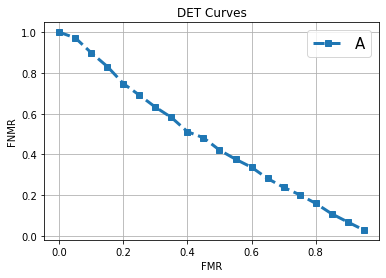

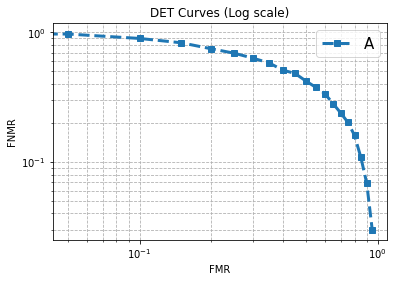

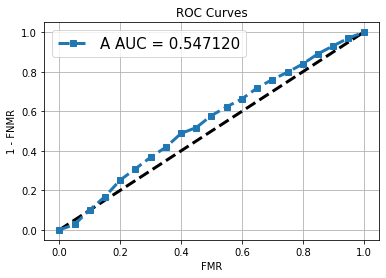

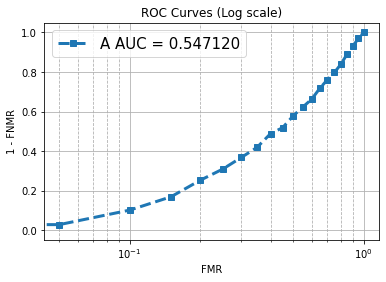

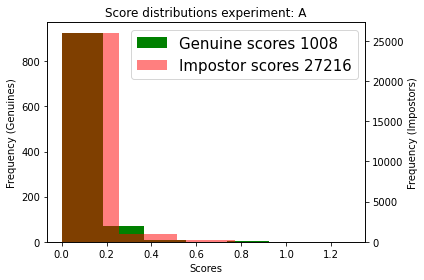

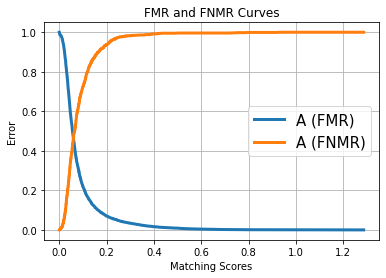

In [12]:
stat = get_eer_stats(genuine, imposter)
generate_eer_report([stat], ['A'], 'sift2_report.html')
plot_eer_stats([stat], ['A'],save_plots=False,bins=5)

In [13]:
def plot_mk(stats, ids, hformat=False, bins=50,
                      lgf_size=15, save_plots=True, dpi=None,
                      save_path='', ext='.png'):

    for i, st in enumerate(stats):
        # Plotting score distributions
        title = 'Score distributions experiment: ' + ids[i]
        fig, ax1 = plt.subplots()

        ax1.grid(False)
        ax1.set_xlabel('Scores')
        ax1.set_title(title)
        ax1.set_ylabel('Frequency (Genuines)')
        # ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()
        ax2.set_ylabel('Frequency (Impostors)')

        if hformat:
            # Obtaining histogram
            m = max(st.gen_scores)
            x = np.arange(m)
            ghist = np.histogram(st.gen_scores, bins=np.arange(m + 1))[0]

            ax1.plot(x, ghist, color='g',
                     label='Genuine scores %d' % len(st.gen_scores))

            x = np.arange(len(st.imp_scores))
            ax2.plot(x, st.imp_scores, color='r',
                     label='Impostor scores %d' % sum(st.imp_scores))
        else:
            ax1.hist(st.gen_scores, bins=bins, color='g',
                     label='Genuine scores %d' % len(st.gen_scores))
            ax2.hist(st.imp_scores, bins=bins, alpha=0.5, color='r',
                     label='Impostor scores %d' % len(st.imp_scores))

        fig.legend(prop=FontProperties(size=lgf_size), bbox_to_anchor=(1, 1),
                   bbox_transform=ax1.transAxes)
        fig.tight_layout()

        if save_plots:
            fig_name = 'Distributions (%s)' % ids[i] + ext
            fig.savefig(join(save_path, fig_name), dpi=dpi)
            plt.close('all')
        else:
            plt.show()

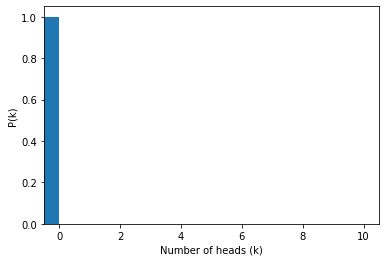

In [14]:
b = np.bincount(genuine,minlength=10)
p = b / float(b.sum())

plt.bar(np.arange(len(b)) - 0.5, p, width=1)
plt.xlim(-0.5, 10 + 0.5)
plt.xlabel("Number of heads (k)")
plt.ylabel("P(k)")

plt.show()

In [24]:
count = 0
total = 0
for i in range(length):
    total+=1
    if(float(id3[i]) >= 0.021277):
        count+=1

In [25]:
print("crr ="+str(count/total))

crr =0.9067460317460317


In [26]:
count = 0
total = 0
for i in range(length):
    total+=1
    if(float(id3[i]) >= 0.059603):
        count+=1

In [27]:
print("crr ="+str(count/total))

crr =0.46616354875283444
